## 1. Biblioteki

In [1]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
%matplotlib inline
import os
import talos as ta
from talos.model.early_stopper import early_stopper

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import mean_absolute_error
%load_ext tensorboard


from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import TensorBoard
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler

import seaborn as sns

from sklearn.model_selection import train_test_split


Using TensorFlow backend.



## 2. Dane

In [2]:
train_df=pd.read_csv('D:/STUDIA/ROK_II/Projekt/Dane_jalowka_i_krowa_train.csv')
test_df=pd.read_csv('D:/STUDIA/ROK_II/Projekt/Dane_jalowka_i_krowa_test.csv')
val_df=pd.read_csv('D:/STUDIA/ROK_II/Projekt/Dane_jalowka_i_krowa_val.csv')

train_df.columns = ['id','Województwo', 'Data urodzenia', 'IE', 'Dokł. IE', 'PF', 'PI-PROD', 'PI-POKR', 'Prc', 'Psm', 'Pnr', 'Pw','PI-PLOD', 'CRj', 'CRk', 'PP', 'OMC', 'WH-KSOM', 'WH-DLUG', 'IP', 'kg ml', 'kg tł', '% tł', 'kg bi', '% bi', 'rc', 'sm', 'nr', 'w', 'og','kategoria']
test_df.columns = ['id','Województwo', 'Data urodzenia', 'IE', 'Dokł. IE', 'PF', 'PI-PROD', 'PI-POKR', 'Prc', 'Psm', 'Pnr', 'Pw','PI-PLOD', 'CRj', 'CRk', 'PP', 'OMC', 'WH-KSOM', 'WH-DLUG', 'IP', 'kg ml', 'kg tł', '% tł', 'kg bi', '% bi', 'rc', 'sm', 'nr', 'w', 'og','kategoria']
val_df.columns = ['id','Województwo', 'Data urodzenia', 'IE', 'Dokł. IE', 'PF', 'PI-PROD', 'PI-POKR', 'Prc', 'Psm', 'Pnr', 'Pw','PI-PLOD', 'CRj', 'CRk', 'PP', 'OMC', 'WH-KSOM', 'WH-DLUG', 'IP', 'kg ml', 'kg tł', '% tł', 'kg bi', '% bi', 'rc', 'sm', 'nr', 'w', 'og','kategoria']

caly_df = pd.concat([train_df, test_df, val_df])
caly_df['Województwo']=caly_df['Województwo'].astype('category')
caly_df['Data urodzenia']=caly_df['Data urodzenia'].astype('category')

del caly_df["id"]
del caly_df["PF"]
del caly_df["IE"]
del caly_df["Dokł. IE"]
del caly_df['kategoria']

caly_df.shape

(1881, 26)

In [3]:
caly_df.head()

Województwo Data urodzenia  PI-PROD  PI-POKR  Prc  Psm  Pnr   Pw  \
0       WIELKOPOLSKIE           2020      137      127  121  113  106  128   
1  KUJAWSKO-POMORSKIE           2018      126      123  109  113  103  128   
2           POMORSKIE           2020      126      120  110  107  102  124   
3  KUJAWSKO-POMORSKIE           2020      133      111  104  110   99  114   
4  ZACHODNIOPOMORSKIE           2020      125      115   91   95  101  124   

   PI-PLOD  CRj  ...  kg ml  kg tł  % tł  kg bi  % bi     rc     sm     nr  \
0      109  107  ...   1370    577     2    452     1  115.0  114.0  109.0   
1      114  114  ...   1209    358   -16    354    -4  115.0  113.0  104.0   
2      113  112  ...    982    368    -4    350     4  104.0  103.0  102.0   
3      114  113  ...   1080    546    12    410     7  106.0  106.0  101.0   
4      134  129  ...    516    501    36    289    15  102.0  102.0  118.0   

       w     og  
0  127.0  123.0  
1  123.0  123.0  
2  122.0  117.0  
3  112.0  112.0  
4  123.0  109.0  

[5 rows x 26 columns]

In [4]:
caly_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1881 entries, 0 to 188
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Województwo     1881 non-null   category
 1   Data urodzenia  1881 non-null   category
 2   PI-PROD         1881 non-null   int64   
 3   PI-POKR         1881 non-null   int64   
 4   Prc             1881 non-null   int64   
 5   Psm             1881 non-null   int64   
 6   Pnr             1881 non-null   int64   
 7   Pw              1881 non-null   int64   
 8   PI-PLOD         1881 non-null   int64   
 9   CRj             1881 non-null   int64   
 10  CRk             1881 non-null   int64   
 11  PP              1881 non-null   int64   
 12  OMC             1881 non-null   int64   
 13  WH-KSOM         1881 non-null   int64   
 14  WH-DLUG         1881 non-null   int64   
 15  IP              1881 non-null   int64   
 16  kg ml           1881 non-null   int64   
 17  kg tł          

## 3. Usuwam mniejszości zmiennych kategorycznych

In [5]:
caly_df['Województwo'].value_counts()

WIELKOPOLSKIE          579
KUJAWSKO-POMORSKIE     298
OPOLSKIE               227
ZACHODNIOPOMORSKIE     212
PODLASKIE              175
MAZOWIECKIE            106
POMORSKIE               94
LUBUSKIE                47
ŁÓDZKIE                 41
DOLNOŚLĄSKIE            32
WARMIŃSKO-MAZURSKIE     23
ŚLĄSKIE                 17
ŚWIĘTOKRZYSKIE          13
MAŁOPOLSKIE             12
LUBELSKIE                4
PODKARPACKIE             1
Name: Województwo, dtype: int64

In [6]:
caly_df=caly_df[caly_df['Województwo']!='PODKARPACKIE']
caly_df=caly_df[caly_df['Województwo']!='LUBELSKIE']

In [7]:
caly_df['Województwo'].value_counts()

WIELKOPOLSKIE          579
KUJAWSKO-POMORSKIE     298
OPOLSKIE               227
ZACHODNIOPOMORSKIE     212
PODLASKIE              175
MAZOWIECKIE            106
POMORSKIE               94
LUBUSKIE                47
ŁÓDZKIE                 41
DOLNOŚLĄSKIE            32
WARMIŃSKO-MAZURSKIE     23
ŚLĄSKIE                 17
ŚWIĘTOKRZYSKIE          13
MAŁOPOLSKIE             12
LUBELSKIE                0
PODKARPACKIE             0
Name: Województwo, dtype: int64

In [8]:
caly_df['Data urodzenia'].value_counts()

2020    1066
2019     396
2018     275
2017      68
2021      47
2016      23
2015       1
Name: Data urodzenia, dtype: int64

In [9]:
caly_df=caly_df[caly_df['Data urodzenia']!=2015]

In [10]:
caly_df['Data urodzenia'].value_counts()

2020    1066
2019     396
2018     275
2017      68
2021      47
2016      23
2015       0
Name: Data urodzenia, dtype: int64

In [11]:
caly_df.shape

(1875, 26)

## 4. Zakodowuje zmienne kategoryczne

In [12]:
a=pd.get_dummies(caly_df['Województwo'])
b=pd.get_dummies(caly_df['Data urodzenia'])
caly_df= pd.concat([caly_df,a,b], axis=1)
del caly_df['Województwo']
del caly_df['Data urodzenia']

## 5. Klasyfikuje wartosci IE

(array([  2.,   0.,   2.,   9.,  11.,  12.,  29.,  25.,  22.,  71., 121.,
         61., 166., 174., 106., 234., 190.,  98., 148., 122.,  53.,  78.,
         58.,  20.,  33.,  13.,   9.,   5.,   1.,   2.]),
 array([ 82.        ,  83.66666667,  85.33333333,  87.        ,
         88.66666667,  90.33333333,  92.        ,  93.66666667,
         95.33333333,  97.        ,  98.66666667, 100.33333333,
        102.        , 103.66666667, 105.33333333, 107.        ,
        108.66666667, 110.33333333, 112.        , 113.66666667,
        115.33333333, 117.        , 118.66666667, 120.33333333,
        122.        , 123.66666667, 125.33333333, 127.        ,
        128.66666667, 130.33333333, 132.        ]),
 <BarContainer object of 30 artists>)

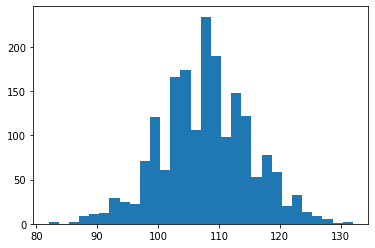

In [13]:
plt.hist(caly_df["OMC"],bins=30)

In [15]:
caly_df["OMC"].describe()

count    1875.000000
mean      107.665067
std         7.413236
min        82.000000
25%       103.000000
50%       107.000000
75%       112.000000
max       132.000000
Name: OMC, dtype: float64

In [16]:
caly_df.loc[(caly_df["OMC"]<=103), "Klasa"] = "Małe"
caly_df.loc[(103<caly_df["OMC"]) & (caly_df["OMC"]<=107), "Klasa"] = "Średnie"
caly_df.loc[(107<caly_df["OMC"]) & (caly_df["OMC"]<=112), "Klasa"] = "Wysokie"
caly_df.loc[caly_df["OMC"]>112, "Klasa"] = "Ekstrimum"

(array([415.,   0.,   0., 531.,   0.,   0., 465.,   0.,   0., 464.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

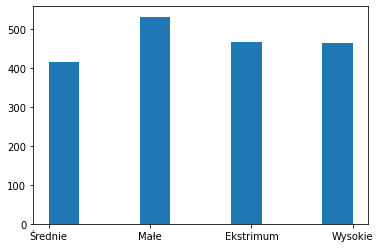

In [17]:
plt.hist(caly_df["Klasa"])

In [18]:
caly_df["Klasa"].value_counts()

Małe         531
Ekstrimum    465
Wysokie      464
Średnie      415
Name: Klasa, dtype: int64

In [19]:
list(caly_df)

['PI-PROD',
 'PI-POKR',
 'Prc',
 'Psm',
 'Pnr',
 'Pw',
 'PI-PLOD',
 'CRj',
 'CRk',
 'PP',
 'OMC',
 'WH-KSOM',
 'WH-DLUG',
 'IP',
 'kg ml',
 'kg tł',
 '% tł',
 'kg bi',
 '% bi',
 'rc',
 'sm',
 'nr',
 'w',
 'og',
 'DOLNOŚLĄSKIE',
 'KUJAWSKO-POMORSKIE',
 'LUBELSKIE',
 'LUBUSKIE',
 'MAZOWIECKIE',
 'MAŁOPOLSKIE',
 'OPOLSKIE',
 'PODKARPACKIE',
 'PODLASKIE',
 'POMORSKIE',
 'WARMIŃSKO-MAZURSKIE',
 'WIELKOPOLSKIE',
 'ZACHODNIOPOMORSKIE',
 'ŁÓDZKIE',
 'ŚLĄSKIE',
 'ŚWIĘTOKRZYSKIE',
 2015,
 2016,
 2017,
 2018,
 2019,
 2020,
 2021,
 'Klasa']

In [20]:
train_df, test_df = train_test_split(caly_df, test_size=0.2, random_state=42,stratify=caly_df['Klasa'])
#test_df, val_df = train_test_split(test_df, test_size=0.5, random_state=42,stratify=test_df['Klasa'])

del train_df['Klasa']
del test_df['Klasa']
#del val_df['Klasa']


train_label=train_df['OMC']
test_label=test_df['OMC']
#val_label=val_df['IE']

del train_df['OMC']
del test_df['OMC']
#del val_df['IE']


In [21]:
list(train_df)

['PI-PROD',
 'PI-POKR',
 'Prc',
 'Psm',
 'Pnr',
 'Pw',
 'PI-PLOD',
 'CRj',
 'CRk',
 'PP',
 'WH-KSOM',
 'WH-DLUG',
 'IP',
 'kg ml',
 'kg tł',
 '% tł',
 'kg bi',
 '% bi',
 'rc',
 'sm',
 'nr',
 'w',
 'og',
 'DOLNOŚLĄSKIE',
 'KUJAWSKO-POMORSKIE',
 'LUBELSKIE',
 'LUBUSKIE',
 'MAZOWIECKIE',
 'MAŁOPOLSKIE',
 'OPOLSKIE',
 'PODKARPACKIE',
 'PODLASKIE',
 'POMORSKIE',
 'WARMIŃSKO-MAZURSKIE',
 'WIELKOPOLSKIE',
 'ZACHODNIOPOMORSKIE',
 'ŁÓDZKIE',
 'ŚLĄSKIE',
 'ŚWIĘTOKRZYSKIE',
 2015,
 2016,
 2017,
 2018,
 2019,
 2020,
 2021]

In [22]:
len(list(train_df))

46

## 1.2 Standaryzacja

In [24]:
train_df.iloc[:,:23]

PI-PROD  PI-POKR  Prc  Psm  Pnr   Pw  PI-PLOD  CRj  CRk   PP  ...  \
1119      133      115  105  107  111  113      104  105  103   96  ...   
1093      125      117  115  104   98  123      120  118  120   99  ...   
613       123      119  101  108  103  124      116  114  116  102  ...   
3         131      113   98  100  103  117      115  113  116  102  ...   
816       121      112  105   94  103  116      120  117  122   99  ...   
...       ...      ...  ...  ...  ...  ...      ...  ...  ...  ...  ...   
110       129      113   90  100  100  121      120  116  121  105  ...   
608       126      118  108  108  110  116      113  107  113  117  ...   
273       125      111   96  108  107  111      109  108  107  104  ...   
1478      128      109  108  111  104  106      115  114  119   93  ...   
1250      126      109   88   98  102  114      111  111  111   99  ...   

      kg ml  kg tł  % tł  kg bi  % bi     rc     sm     nr      w     og  
1119   1325    474    -8    429     0  107.0  109.0  117.0  111.0  114.0  
1093    478    523    41    288    16  106.0  101.0  106.0  120.0  111.0  
613    1091    418    -3    287    -8  107.0  107.0  112.0  125.0  118.0  
3       902    516    17    378    10  105.0  103.0  110.0  118.0  109.0  
816    1040    379    -5    270    -8   90.0   93.0  100.0  117.0  107.0  
...     ...    ...   ...    ...   ...    ...    ...    ...    ...    ...  
110     843    602    30    316     5  101.0  100.0  114.0  121.0  111.0  
608     783    374     6    348    11  108.0  107.0  117.0  115.0  113.0  
273     983    398     0    321     0  107.0  106.0  116.0  115.0  111.0  
1478    888    491    15    339     6  108.0  108.0  105.0  108.0  111.0  
1250   1369    314   -28    380    -7   99.0   98.0  113.0  115.0  105.0  

[1500 rows x 23 columns]

In [25]:
scaler = StandardScaler()
train_df.iloc[:,:23]=scaler.fit_transform(train_df.iloc[:,:23])
test_df.iloc[:,:23]=scaler.fit_transform(test_df.iloc[:,:23])
#val_df.iloc[:,14:]=scaler.fit_transform(val_df.iloc[:,14:])

In [28]:
train_df.iloc[:,20:23]

nr         w        og
1119  0.680709 -1.138843 -0.140075
1093 -0.819652  0.104636 -0.584915
613  -0.001273  0.795458  0.453044
3    -0.274066 -0.171692 -0.881474
816  -1.638030 -0.309857 -1.178034
...        ...       ...       ...
110   0.271520  0.242801 -0.584915
608   0.680709 -0.586185 -0.288355
273   0.544313 -0.586185 -0.584915
1478 -0.956048 -1.553336 -0.584915
1250  0.135123 -0.586185 -1.474594

[1500 rows x 3 columns]

In [29]:
train_df.shape

(1500, 46)

In [30]:
test_df.shape

(375, 46)

In [31]:
train_df = np.array(train_df)
test_df = np.array(test_df)

In [32]:
train_df

array([[ 0.93447873, -0.3516274 , -0.26760885, ...,  1.        ,
         0.        ,  0.        ],
       [-0.31999546, -0.07017537,  0.99231982, ...,  1.        ,
         0.        ,  0.        ],
       [-0.63361401,  0.21127666, -0.77158032, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-0.31999546, -0.91453145, -1.40154465, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.15043236, -1.19598348,  0.11036975, ...,  1.        ,
         0.        ,  0.        ],
       [-0.16318618, -1.19598348, -2.40948759, ...,  0.        ,
         1.        ,  0.        ]])

In [33]:
train_label = np.array(train_label)
test_label = np.array(test_label)

In [34]:
train_label

array([ 97, 104, 103, ..., 104, 101, 102], dtype=int64)

In [35]:
METRICS=['mae']

# 2 Moduł TALOS

Zamiast dobierać wszystkie hiperparametry na nowo, sprawdzę czy siec preferuje inne w waskim zakresie

## 2.1 Słownik parametrów do wypróbowania

In [39]:
p = {'first_neuron':[160], #
     'hidden_neuron':[50],#
     'hidden_layers':[0,1,2,3],  #
     'batch_size': [32,64], #
     'optimizer': ['adam'],# do zrobienia potem
     'kernel_initializer': ['normal'], # do zrobienia potem
     'epochs': [20000], # never touch it
     'dropout': [0],  # po dopasowaniu znowu nie bedzie potrzebne
     'activation_layer':['relu'], # do zrobienia potem
     'batc_normalization':[False], # do zrobienia potem
     'last_activation': ['linear']} #never touch it
#     'optimizer': ['rmsprop','adam','adadelta','adamax','nadam','adagrad'],
#     'kernel_initializer': ['orthogonal','identity','zeros','ones','uniform'],
#    'activation_layer':['sigmoid','tanh','selu','elu','relu'],

## 2.2 Tworzę funkcję do tworzenia instancji modelu keras

In [40]:
def numerai_model(x_train, y_train, x_val, y_val, params):
    print(params)

    model = Sequential()
    
    ## initial layer
    model.add(Dense(params['first_neuron'], input_dim=x_train.shape[1],
                    activation='relu',
                    kernel_initializer = params['kernel_initializer'] ))
    if params['batc_normalization']==True:
        model.add(BatchNormalization())
    model.add(Dropout(params['dropout']))
    
    ## hidden layers
    for i in range(params['hidden_layers']):
        print (f"adding layer {i+1}")
        model.add(Dense(params['hidden_neuron'], activation='relu',
                    kernel_initializer=params['kernel_initializer']))
        if params['batc_normalization']==True:
            model.add(BatchNormalization())
        model.add(Dropout(params['dropout']))
    
    
    ## final layer
    model.add(Dense(1, activation=params['last_activation'],
                    kernel_initializer=params['kernel_initializer']))
    
    model.compile(loss='mean_absolute_error', 
                  optimizer=params['optimizer'])
    
    history = model.fit(x_train, y_train, 
                        validation_data=[x_val, y_val],
                        batch_size=params['batch_size'],
                        epochs=params['epochs'],
                        callbacks = [early_stopper(params['epochs'], patience=10,monitor='val_loss')] #,ta.live(),
                        )

    return history, model

## 2.3 Przeprowadzam skan, używając parametrów i funkcji wyżej


In [41]:
t = ta.Scan(x=train_df, y=train_label,
            x_val=test_df, y_val=test_label,
            model=numerai_model,
            params=p,
            experiment_name='Predykcja OMC')


  0%|                                                                                            | 0/8 [00:00<?, ?it/s]

{'activation_layer': 'relu', 'batc_normalization': False, 'batch_size': 32, 'dropout': 0, 'epochs': 20000, 'first_neuron': 160, 'hidden_layers': 0, 'hidden_neuron': 50, 'kernel_initializer': 'normal', 'last_activation': 'linear', 'optimizer': 'adam'}
Train on 1500 samples, validate on 375 samples
Epoch 1/20000
1500/1500 [==============================] - 0s 208us/sample - loss: 106.8229 - val_loss: 105.8434
Epoch 2/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 103.0423 - val_loss: 99.7178
Epoch 3/20000
1500/1500 [==============================] - 0s 33us/sample - loss: 93.7855 - val_loss: 86.8890
Epoch 4/20000
1500/1500 [==============================] - 0s 31us/sample - loss: 77.2506 - val_loss: 66.4259
Epoch 5/20000
1500/1500 [==============================] - 0s 32us/sample - loss: 54.4635 - val_loss: 42.5441
Epoch 6/20000
1500/1500 [==============================] - 0s 32us/sample - loss: 35.1278 - val_loss: 30.2000
Epoch 7/20000
1500/1500 [=============

Epoch 148/20000
1500/1500 [==============================] - 0s 31us/sample - loss: 0.7134 - val_loss: 1.3815
Epoch 149/20000
1500/1500 [==============================] - 0s 31us/sample - loss: 0.7139 - val_loss: 1.3161
Epoch 150/20000
1500/1500 [==============================] - 0s 32us/sample - loss: 0.6934 - val_loss: 1.3134
Epoch 151/20000
1500/1500 [==============================] - 0s 31us/sample - loss: 0.7153 - val_loss: 1.3641
Epoch 152/20000
1500/1500 [==============================] - 0s 31us/sample - loss: 0.7034 - val_loss: 1.3349
Epoch 153/20000
1500/1500 [==============================] - 0s 31us/sample - loss: 0.6996 - val_loss: 1.3944
Epoch 154/20000
1500/1500 [==============================] - 0s 31us/sample - loss: 0.7022 - val_loss: 1.3314
Epoch 155/20000
1500/1500 [==============================] - 0s 31us/sample - loss: 0.7415 - val_loss: 1.4044
Epoch 156/20000
1500/1500 [==============================] - 0s 31us/sample - loss: 0.7151 - val_loss: 1.3642
Epoch 157/

1500/1500 [==============================] - 0s 32us/sample - loss: 0.5190 - val_loss: 1.3149
Epoch 297/20000
1500/1500 [==============================] - 0s 31us/sample - loss: 0.5087 - val_loss: 1.2489
Epoch 298/20000
1500/1500 [==============================] - 0s 31us/sample - loss: 0.4924 - val_loss: 1.2690
Epoch 299/20000
1500/1500 [==============================] - 0s 32us/sample - loss: 0.4903 - val_loss: 1.2806
Epoch 300/20000
1500/1500 [==============================] - 0s 32us/sample - loss: 0.5154 - val_loss: 1.2585
Epoch 301/20000
1500/1500 [==============================] - 0s 31us/sample - loss: 0.4951 - val_loss: 1.2507
Epoch 302/20000
1500/1500 [==============================] - 0s 31us/sample - loss: 0.5106 - val_loss: 1.3053
Epoch 303/20000
1500/1500 [==============================] - 0s 31us/sample - loss: 0.5091 - val_loss: 1.3310
Epoch 304/20000
1500/1500 [==============================] - 0s 32us/sample - loss: 0.5503 - val_loss: 1.2792
Epoch 305/20000
1500/1500 

1500/1500 [==============================] - 0s 31us/sample - loss: 0.4089 - val_loss: 1.3088
Epoch 445/20000
1500/1500 [==============================] - 0s 32us/sample - loss: 0.4167 - val_loss: 1.2215
Epoch 446/20000
1500/1500 [==============================] - 0s 31us/sample - loss: 0.3919 - val_loss: 1.2261
Epoch 447/20000
1500/1500 [==============================] - 0s 32us/sample - loss: 0.4137 - val_loss: 1.2475
Epoch 448/20000
1500/1500 [==============================] - 0s 32us/sample - loss: 0.4022 - val_loss: 1.2388
Epoch 449/20000
1500/1500 [==============================] - 0s 31us/sample - loss: 0.3936 - val_loss: 1.2747
Epoch 450/20000
1500/1500 [==============================] - 0s 31us/sample - loss: 0.3932 - val_loss: 1.3004
Epoch 451/20000
1500/1500 [==============================] - 0s 31us/sample - loss: 0.4372 - val_loss: 1.2283
Epoch 452/20000
1500/1500 [==============================] - 0s 31us/sample - loss: 0.4044 - val_loss: 1.2475
Epoch 453/20000
1500/1500 

1500/1500 [==============================] - 0s 31us/sample - loss: 0.3519 - val_loss: 1.2439
Epoch 593/20000
1500/1500 [==============================] - 0s 31us/sample - loss: 0.3286 - val_loss: 1.2596
Epoch 594/20000
1500/1500 [==============================] - 0s 31us/sample - loss: 0.3373 - val_loss: 1.2895
Epoch 595/20000
1500/1500 [==============================] - 0s 32us/sample - loss: 0.3585 - val_loss: 1.2849
Epoch 596/20000
1500/1500 [==============================] - 0s 32us/sample - loss: 0.3731 - val_loss: 1.2537
Epoch 597/20000
1500/1500 [==============================] - 0s 31us/sample - loss: 0.3455 - val_loss: 1.2651
Epoch 598/20000
1500/1500 [==============================] - 0s 32us/sample - loss: 0.3449 - val_loss: 1.2285
Epoch 599/20000
1500/1500 [==============================] - 0s 31us/sample - loss: 0.3539 - val_loss: 1.1924
Epoch 600/20000
1500/1500 [==============================] - 0s 31us/sample - loss: 0.3469 - val_loss: 1.2436
Epoch 601/20000
1500/1500 

1500/1500 [==============================] - 0s 31us/sample - loss: 0.3308 - val_loss: 1.3536
Epoch 741/20000
1500/1500 [==============================] - 0s 31us/sample - loss: 0.3593 - val_loss: 1.2736
Epoch 742/20000
1500/1500 [==============================] - 0s 31us/sample - loss: 0.3196 - val_loss: 1.3058
Epoch 743/20000
1500/1500 [==============================] - 0s 32us/sample - loss: 0.3267 - val_loss: 1.2804
Epoch 744/20000
1500/1500 [==============================] - 0s 31us/sample - loss: 0.3066 - val_loss: 1.2644
Epoch 745/20000
1500/1500 [==============================] - 0s 32us/sample - loss: 0.2855 - val_loss: 1.2799
Epoch 746/20000
1500/1500 [==============================] - 0s 32us/sample - loss: 0.3032 - val_loss: 1.2743
Epoch 747/20000
1500/1500 [==============================] - 0s 31us/sample - loss: 0.2979 - val_loss: 1.2373
Epoch 748/20000
1500/1500 [==============================] - 0s 33us/sample - loss: 0.3024 - val_loss: 1.2187
Epoch 749/20000
1500/1500 

1500/1500 [==============================] - 0s 33us/sample - loss: 0.2714 - val_loss: 1.2699
Epoch 889/20000
1500/1500 [==============================] - 0s 33us/sample - loss: 0.2807 - val_loss: 1.2555
Epoch 890/20000
1500/1500 [==============================] - 0s 32us/sample - loss: 0.2597 - val_loss: 1.2268
Epoch 891/20000
1500/1500 [==============================] - 0s 31us/sample - loss: 0.3073 - val_loss: 1.2403
Epoch 892/20000
1500/1500 [==============================] - 0s 32us/sample - loss: 0.2772 - val_loss: 1.2289
Epoch 893/20000
1500/1500 [==============================] - 0s 32us/sample - loss: 0.2540 - val_loss: 1.2937
Epoch 894/20000
1500/1500 [==============================] - 0s 33us/sample - loss: 0.2896 - val_loss: 1.2479
Epoch 895/20000
1500/1500 [==============================] - 0s 31us/sample - loss: 0.2928 - val_loss: 1.2110
Epoch 896/20000
1500/1500 [==============================] - 0s 31us/sample - loss: 0.2913 - val_loss: 1.2684
Epoch 897/20000
1500/1500 

1500/1500 [==============================] - 0s 33us/sample - loss: 0.2780 - val_loss: 1.2683
Epoch 1037/20000
1500/1500 [==============================] - 0s 32us/sample - loss: 0.2712 - val_loss: 1.2801
Epoch 1038/20000
1500/1500 [==============================] - 0s 31us/sample - loss: 0.2278 - val_loss: 1.2613
Epoch 1039/20000
1500/1500 [==============================] - 0s 32us/sample - loss: 0.2439 - val_loss: 1.2440
Epoch 1040/20000
1500/1500 [==============================] - 0s 31us/sample - loss: 0.2713 - val_loss: 1.2342
Epoch 1041/20000
1500/1500 [==============================] - 0s 31us/sample - loss: 0.2768 - val_loss: 1.2236
Epoch 1042/20000
1500/1500 [==============================] - 0s 31us/sample - loss: 0.2487 - val_loss: 1.2472
Epoch 1043/20000
1500/1500 [==============================] - 0s 33us/sample - loss: 0.2240 - val_loss: 1.2078
Epoch 1044/20000
1500/1500 [==============================] - 0s 32us/sample - loss: 0.2343 - val_loss: 1.2344
Epoch 1045/20000
1

Epoch 1110/20000
1500/1500 [==============================] - 0s 33us/sample - loss: 0.2265 - val_loss: 1.2846
Epoch 1111/20000
1500/1500 [==============================] - 0s 32us/sample - loss: 0.2303 - val_loss: 1.2592
Epoch 1112/20000
1500/1500 [==============================] - 0s 32us/sample - loss: 0.2173 - val_loss: 1.2441
Epoch 1113/20000
1500/1500 [==============================] - 0s 32us/sample - loss: 0.2328 - val_loss: 1.2938
Epoch 1114/20000
1500/1500 [==============================] - 0s 31us/sample - loss: 0.2110 - val_loss: 1.2438
Epoch 1115/20000
1500/1500 [==============================] - 0s 31us/sample - loss: 0.2187 - val_loss: 1.2586
Epoch 1116/20000
1500/1500 [==============================] - 0s 31us/sample - loss: 0.2495 - val_loss: 1.2734
Epoch 1117/20000
1500/1500 [==============================] - 0s 31us/sample - loss: 0.2162 - val_loss: 1.2265
Epoch 1118/20000
1500/1500 [==============================] - 0s 31us/sample - loss: 0.2380 - val_loss: 1.3014
E

Epoch 1184/20000
1500/1500 [==============================] - 0s 32us/sample - loss: 0.2377 - val_loss: 1.2607
Epoch 1185/20000
1500/1500 [==============================] - 0s 33us/sample - loss: 0.2155 - val_loss: 1.3062
Epoch 1186/20000
1500/1500 [==============================] - 0s 33us/sample - loss: 0.2256 - val_loss: 1.2610
Epoch 1187/20000
1500/1500 [==============================] - 0s 32us/sample - loss: 0.2325 - val_loss: 1.3120
Epoch 1188/20000
1500/1500 [==============================] - 0s 33us/sample - loss: 0.2581 - val_loss: 1.3082
Epoch 1189/20000
1500/1500 [==============================] - 0s 32us/sample - loss: 0.2337 - val_loss: 1.2805
Epoch 1190/20000
1500/1500 [==============================] - 0s 32us/sample - loss: 0.2430 - val_loss: 1.2814
Epoch 1191/20000
1500/1500 [==============================] - 0s 31us/sample - loss: 0.2360 - val_loss: 1.3170
Epoch 1192/20000
1500/1500 [==============================] - 0s 31us/sample - loss: 0.2166 - val_loss: 1.3058
E

Epoch 1258/20000
1500/1500 [==============================] - 0s 33us/sample - loss: 0.2343 - val_loss: 1.3036
Epoch 1259/20000
1500/1500 [==============================] - 0s 33us/sample - loss: 0.2093 - val_loss: 1.3115
Epoch 1260/20000
1500/1500 [==============================] - 0s 31us/sample - loss: 0.2347 - val_loss: 1.2904
Epoch 1261/20000
1500/1500 [==============================] - 0s 32us/sample - loss: 0.2107 - val_loss: 1.2960
Epoch 1262/20000
1500/1500 [==============================] - 0s 33us/sample - loss: 0.2171 - val_loss: 1.2408
Epoch 1263/20000
1500/1500 [==============================] - 0s 31us/sample - loss: 0.2232 - val_loss: 1.3337
Epoch 1264/20000
1500/1500 [==============================] - 0s 31us/sample - loss: 0.2211 - val_loss: 1.2525
Epoch 1265/20000
1500/1500 [==============================] - 0s 31us/sample - loss: 0.1969 - val_loss: 1.3112
Epoch 1266/20000
1500/1500 [==============================] - 0s 31us/sample - loss: 0.1934 - val_loss: 1.3011
E

Epoch 1332/20000
1500/1500 [==============================] - 0s 33us/sample - loss: 0.2104 - val_loss: 1.2417
Epoch 1333/20000
1500/1500 [==============================] - 0s 33us/sample - loss: 0.2468 - val_loss: 1.2778
Epoch 1334/20000
1500/1500 [==============================] - 0s 33us/sample - loss: 0.2019 - val_loss: 1.2786
Epoch 1335/20000
1500/1500 [==============================] - 0s 30us/sample - loss: 0.2153 - val_loss: 1.3111
Epoch 1336/20000
1500/1500 [==============================] - 0s 31us/sample - loss: 0.2360 - val_loss: 1.2803
Epoch 1337/20000
1500/1500 [==============================] - 0s 31us/sample - loss: 0.2433 - val_loss: 1.2904
Epoch 1338/20000
1500/1500 [==============================] - 0s 31us/sample - loss: 0.1980 - val_loss: 1.2770
Epoch 1339/20000
1500/1500 [==============================] - 0s 31us/sample - loss: 0.2095 - val_loss: 1.3014
Epoch 1340/20000
1500/1500 [==============================] - 0s 32us/sample - loss: 0.1983 - val_loss: 1.3156
E

Epoch 1406/20000
1500/1500 [==============================] - 0s 32us/sample - loss: 0.2106 - val_loss: 1.2688
Epoch 1407/20000
1500/1500 [==============================] - 0s 31us/sample - loss: 0.2337 - val_loss: 1.2850
Epoch 1408/20000
1500/1500 [==============================] - 0s 31us/sample - loss: 0.2144 - val_loss: 1.3067
Epoch 1409/20000
1500/1500 [==============================] - 0s 31us/sample - loss: 0.1975 - val_loss: 1.3212
Epoch 1410/20000
1500/1500 [==============================] - 0s 31us/sample - loss: 0.2129 - val_loss: 1.2760
Epoch 1411/20000
1500/1500 [==============================] - 0s 31us/sample - loss: 0.1952 - val_loss: 1.3012
Epoch 1412/20000
1500/1500 [==============================] - 0s 31us/sample - loss: 0.1793 - val_loss: 1.3179
Epoch 1413/20000
1500/1500 [==============================] - 0s 33us/sample - loss: 0.2105 - val_loss: 1.3080
Epoch 1414/20000
1500/1500 [==============================] - 0s 31us/sample - loss: 0.2114 - val_loss: 1.2778
E

Epoch 1480/20000
1500/1500 [==============================] - 0s 33us/sample - loss: 0.1997 - val_loss: 1.3472
Epoch 1481/20000
1500/1500 [==============================] - 0s 31us/sample - loss: 0.2222 - val_loss: 1.2864
Epoch 1482/20000
1500/1500 [==============================] - 0s 32us/sample - loss: 0.2063 - val_loss: 1.2769
Epoch 1483/20000
1500/1500 [==============================] - 0s 31us/sample - loss: 0.1997 - val_loss: 1.2914
Epoch 1484/20000
1500/1500 [==============================] - 0s 31us/sample - loss: 0.2121 - val_loss: 1.2446
Epoch 1485/20000
1500/1500 [==============================] - 0s 31us/sample - loss: 0.1925 - val_loss: 1.3054
Epoch 1486/20000
1500/1500 [==============================] - 0s 32us/sample - loss: 0.1931 - val_loss: 1.2928
Epoch 1487/20000
1500/1500 [==============================] - 0s 31us/sample - loss: 0.1881 - val_loss: 1.3288
Epoch 1488/20000
1500/1500 [==============================] - 0s 31us/sample - loss: 0.1779 - val_loss: 1.2940
E

Epoch 1554/20000
1500/1500 [==============================] - 0s 31us/sample - loss: 0.1954 - val_loss: 1.2934
Epoch 1555/20000
1500/1500 [==============================] - 0s 31us/sample - loss: 0.1897 - val_loss: 1.2687
Epoch 1556/20000
1500/1500 [==============================] - 0s 31us/sample - loss: 0.2009 - val_loss: 1.2897
Epoch 1557/20000
1500/1500 [==============================] - 0s 31us/sample - loss: 0.1914 - val_loss: 1.2786
Epoch 1558/20000
1500/1500 [==============================] - 0s 33us/sample - loss: 0.1854 - val_loss: 1.3019
Epoch 1559/20000
1500/1500 [==============================] - 0s 33us/sample - loss: 0.1983 - val_loss: 1.3115
Epoch 1560/20000
1500/1500 [==============================] - 0s 32us/sample - loss: 0.1830 - val_loss: 1.2639
Epoch 1561/20000
1500/1500 [==============================] - 0s 32us/sample - loss: 0.1977 - val_loss: 1.3228
Epoch 1562/20000
1500/1500 [==============================] - 0s 32us/sample - loss: 0.2180 - val_loss: 1.2641
E

Epoch 1628/20000
1500/1500 [==============================] - 0s 32us/sample - loss: 0.1737 - val_loss: 1.2961
Epoch 1629/20000
1500/1500 [==============================] - 0s 31us/sample - loss: 0.1824 - val_loss: 1.2854
Epoch 1630/20000
1500/1500 [==============================] - 0s 31us/sample - loss: 0.1869 - val_loss: 1.3489
Epoch 1631/20000
1500/1500 [==============================] - 0s 31us/sample - loss: 0.1899 - val_loss: 1.3674
Epoch 1632/20000
1500/1500 [==============================] - 0s 31us/sample - loss: 0.1951 - val_loss: 1.2953
Epoch 1633/20000
1500/1500 [==============================] - 0s 31us/sample - loss: 0.1834 - val_loss: 1.3369
Epoch 1634/20000
1500/1500 [==============================] - 0s 33us/sample - loss: 0.2065 - val_loss: 1.3202
Epoch 1635/20000
1500/1500 [==============================] - 0s 31us/sample - loss: 0.1783 - val_loss: 1.2975
Epoch 1636/20000
1500/1500 [==============================] - 0s 32us/sample - loss: 0.1869 - val_loss: 1.2990
E

Epoch 1702/20000
1500/1500 [==============================] - 0s 33us/sample - loss: 0.1684 - val_loss: 1.3213
Epoch 1703/20000
1500/1500 [==============================] - 0s 31us/sample - loss: 0.1779 - val_loss: 1.2750
Epoch 1704/20000
1500/1500 [==============================] - 0s 32us/sample - loss: 0.1696 - val_loss: 1.3141
Epoch 1705/20000
1500/1500 [==============================] - 0s 31us/sample - loss: 0.1836 - val_loss: 1.3017
Epoch 1706/20000
1500/1500 [==============================] - 0s 32us/sample - loss: 0.1845 - val_loss: 1.2828
Epoch 1707/20000
1500/1500 [==============================] - 0s 32us/sample - loss: 0.2002 - val_loss: 1.2877
Epoch 1708/20000
1500/1500 [==============================] - 0s 32us/sample - loss: 0.1823 - val_loss: 1.3004
Epoch 1709/20000
1500/1500 [==============================] - 0s 31us/sample - loss: 0.1768 - val_loss: 1.2954
Epoch 1710/20000
1500/1500 [==============================] - 0s 33us/sample - loss: 0.1866 - val_loss: 1.3540
E

Epoch 1776/20000
1500/1500 [==============================] - 0s 32us/sample - loss: 0.2073 - val_loss: 1.2660
Epoch 1777/20000
1500/1500 [==============================] - 0s 31us/sample - loss: 0.1705 - val_loss: 1.3053
Epoch 1778/20000
1500/1500 [==============================] - 0s 32us/sample - loss: 0.2001 - val_loss: 1.3689
Epoch 1779/20000
1500/1500 [==============================] - 0s 31us/sample - loss: 0.1976 - val_loss: 1.2967
Epoch 1780/20000
1500/1500 [==============================] - 0s 30us/sample - loss: 0.1887 - val_loss: 1.3025
Epoch 1781/20000
1500/1500 [==============================] - 0s 30us/sample - loss: 0.1705 - val_loss: 1.3184
Epoch 1782/20000
1500/1500 [==============================] - 0s 32us/sample - loss: 0.1906 - val_loss: 1.3240
Epoch 1783/20000
1500/1500 [==============================] - 0s 31us/sample - loss: 0.1950 - val_loss: 1.3402
Epoch 1784/20000
1500/1500 [==============================] - 0s 33us/sample - loss: 0.1627 - val_loss: 1.3118
E

Epoch 1850/20000
1500/1500 [==============================] - 0s 32us/sample - loss: 0.1940 - val_loss: 1.3501
Epoch 1851/20000
1500/1500 [==============================] - 0s 31us/sample - loss: 0.1935 - val_loss: 1.3233
Epoch 1852/20000
1500/1500 [==============================] - 0s 31us/sample - loss: 0.1855 - val_loss: 1.3132
Epoch 1853/20000
1500/1500 [==============================] - 0s 32us/sample - loss: 0.1663 - val_loss: 1.3210
Epoch 1854/20000
1500/1500 [==============================] - 0s 31us/sample - loss: 0.1723 - val_loss: 1.2932
Epoch 1855/20000
1500/1500 [==============================] - 0s 31us/sample - loss: 0.1781 - val_loss: 1.3166
Epoch 1856/20000
1500/1500 [==============================] - 0s 32us/sample - loss: 0.1639 - val_loss: 1.3189
Epoch 1857/20000
1500/1500 [==============================] - 0s 33us/sample - loss: 0.1817 - val_loss: 1.3091
Epoch 1858/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 0.1978 - val_loss: 1.3078
E

Epoch 1924/20000
1500/1500 [==============================] - 0s 32us/sample - loss: 0.1660 - val_loss: 1.3195
Epoch 1925/20000
1500/1500 [==============================] - 0s 32us/sample - loss: 0.2115 - val_loss: 1.3158
Epoch 1926/20000
1500/1500 [==============================] - 0s 32us/sample - loss: 0.1742 - val_loss: 1.2868
Epoch 1927/20000
1500/1500 [==============================] - 0s 31us/sample - loss: 0.1619 - val_loss: 1.3708
Epoch 1928/20000
1500/1500 [==============================] - 0s 31us/sample - loss: 0.1742 - val_loss: 1.2791
Epoch 1929/20000
1500/1500 [==============================] - 0s 30us/sample - loss: 0.1586 - val_loss: 1.3047
Epoch 1930/20000
1500/1500 [==============================] - 0s 33us/sample - loss: 0.1508 - val_loss: 1.3333
Epoch 1931/20000
1500/1500 [==============================] - 0s 32us/sample - loss: 0.1959 - val_loss: 1.3064
Epoch 1932/20000
1500/1500 [==============================] - 0s 33us/sample - loss: 0.1835 - val_loss: 1.3063
E

Epoch 1998/20000
1500/1500 [==============================] - 0s 32us/sample - loss: 0.1725 - val_loss: 1.3226
Epoch 1999/20000
1500/1500 [==============================] - 0s 31us/sample - loss: 0.1768 - val_loss: 1.3010
Epoch 2000/20000
1500/1500 [==============================] - 0s 31us/sample - loss: 0.1853 - val_loss: 1.3472
Epoch 2001/20000
1500/1500 [==============================] - 0s 32us/sample - loss: 0.1755 - val_loss: 1.3061
Epoch 2002/20000
1500/1500 [==============================] - 0s 32us/sample - loss: 0.1581 - val_loss: 1.3649
Epoch 2003/20000
1500/1500 [==============================] - 0s 32us/sample - loss: 0.1992 - val_loss: 1.3025
Epoch 2004/20000
1500/1500 [==============================] - 0s 32us/sample - loss: 0.1948 - val_loss: 1.3068
Epoch 2005/20000
1500/1500 [==============================] - 0s 31us/sample - loss: 0.1986 - val_loss: 1.2975
Epoch 2006/20000
1500/1500 [==============================] - 0s 31us/sample - loss: 0.1848 - val_loss: 1.2481
E

Epoch 2072/20000
1500/1500 [==============================] - 0s 31us/sample - loss: 0.1624 - val_loss: 1.2963
Epoch 2073/20000
1500/1500 [==============================] - 0s 31us/sample - loss: 0.1642 - val_loss: 1.3140
Epoch 2074/20000
1500/1500 [==============================] - 0s 32us/sample - loss: 0.1568 - val_loss: 1.2979
Epoch 2075/20000
1500/1500 [==============================] - 0s 31us/sample - loss: 0.1466 - val_loss: 1.3422
Epoch 2076/20000
1500/1500 [==============================] - 0s 31us/sample - loss: 0.1640 - val_loss: 1.2977
Epoch 2077/20000
1500/1500 [==============================] - 0s 31us/sample - loss: 0.1689 - val_loss: 1.3314
Epoch 2078/20000
1500/1500 [==============================] - 0s 32us/sample - loss: 0.1961 - val_loss: 1.3507
Epoch 2079/20000
1500/1500 [==============================] - 0s 32us/sample - loss: 0.2113 - val_loss: 1.2921
Epoch 2080/20000
1500/1500 [==============================] - 0s 32us/sample - loss: 0.1786 - val_loss: 1.3058
E

Epoch 2146/20000
1500/1500 [==============================] - 0s 33us/sample - loss: 0.1720 - val_loss: 1.3059
Epoch 2147/20000
1500/1500 [==============================] - 0s 32us/sample - loss: 0.1867 - val_loss: 1.3007
Epoch 2148/20000
1500/1500 [==============================] - 0s 32us/sample - loss: 0.1809 - val_loss: 1.3200
Epoch 2149/20000
1500/1500 [==============================] - 0s 31us/sample - loss: 0.1626 - val_loss: 1.3877
Epoch 2150/20000
1500/1500 [==============================] - 0s 31us/sample - loss: 0.1886 - val_loss: 1.3332
Epoch 2151/20000
1500/1500 [==============================] - 0s 31us/sample - loss: 0.1564 - val_loss: 1.3495
Epoch 2152/20000
1500/1500 [==============================] - 0s 31us/sample - loss: 0.1665 - val_loss: 1.3198
Epoch 2153/20000
1500/1500 [==============================] - 0s 31us/sample - loss: 0.2122 - val_loss: 1.2972
Epoch 2154/20000
1500/1500 [==============================] - 0s 32us/sample - loss: 0.1674 - val_loss: 1.3120
E

Epoch 2220/20000
1500/1500 [==============================] - 0s 33us/sample - loss: 0.1790 - val_loss: 1.3105
Epoch 2221/20000
1500/1500 [==============================] - 0s 31us/sample - loss: 0.1910 - val_loss: 1.3469
Epoch 2222/20000
1500/1500 [==============================] - 0s 31us/sample - loss: 0.1775 - val_loss: 1.2997
Epoch 2223/20000
1500/1500 [==============================] - 0s 31us/sample - loss: 0.1874 - val_loss: 1.3431
Epoch 2224/20000
1500/1500 [==============================] - 0s 31us/sample - loss: 0.1514 - val_loss: 1.3272
Epoch 2225/20000
1500/1500 [==============================] - 0s 31us/sample - loss: 0.1564 - val_loss: 1.2994
Epoch 2226/20000
1500/1500 [==============================] - 0s 31us/sample - loss: 0.1586 - val_loss: 1.2906
Epoch 2227/20000
1500/1500 [==============================] - 0s 32us/sample - loss: 0.1671 - val_loss: 1.2690
Epoch 2228/20000
1500/1500 [==============================] - 0s 31us/sample - loss: 0.1579 - val_loss: 1.3072
E

Epoch 2294/20000
1500/1500 [==============================] - 0s 32us/sample - loss: 0.1594 - val_loss: 1.3317
Epoch 2295/20000
1500/1500 [==============================] - 0s 31us/sample - loss: 0.1592 - val_loss: 1.3070
Epoch 2296/20000
1500/1500 [==============================] - 0s 31us/sample - loss: 0.2036 - val_loss: 1.3367
Epoch 2297/20000
1500/1500 [==============================] - 0s 32us/sample - loss: 0.1593 - val_loss: 1.3053
Epoch 2298/20000
1500/1500 [==============================] - 0s 31us/sample - loss: 0.1560 - val_loss: 1.3276
Epoch 2299/20000
1500/1500 [==============================] - 0s 31us/sample - loss: 0.1605 - val_loss: 1.3008
Epoch 2300/20000
1500/1500 [==============================] - 0s 32us/sample - loss: 0.1906 - val_loss: 1.3469
Epoch 2301/20000
1500/1500 [==============================] - 0s 31us/sample - loss: 0.1546 - val_loss: 1.3334
Epoch 2302/20000
1500/1500 [==============================] - 0s 32us/sample - loss: 0.1717 - val_loss: 1.3313
E

Epoch 2368/20000
1500/1500 [==============================] - 0s 33us/sample - loss: 0.1735 - val_loss: 1.3445
Epoch 2369/20000
1500/1500 [==============================] - 0s 33us/sample - loss: 0.1869 - val_loss: 1.3318
Epoch 2370/20000
1500/1500 [==============================] - 0s 31us/sample - loss: 0.1643 - val_loss: 1.3357
Epoch 2371/20000
1500/1500 [==============================] - 0s 32us/sample - loss: 0.1655 - val_loss: 1.3421
Epoch 2372/20000
1500/1500 [==============================] - 0s 31us/sample - loss: 0.1732 - val_loss: 1.3338
Epoch 2373/20000
1500/1500 [==============================] - 0s 31us/sample - loss: 0.1895 - val_loss: 1.3577
Epoch 2374/20000
1500/1500 [==============================] - 0s 31us/sample - loss: 0.1728 - val_loss: 1.3704
Epoch 2375/20000
1500/1500 [==============================] - 0s 31us/sample - loss: 0.1679 - val_loss: 1.3094
Epoch 2376/20000
1500/1500 [==============================] - 0s 31us/sample - loss: 0.1538 - val_loss: 1.2992
E


 12%|██████████▍                                                                        | 1/8 [01:56<13:32, 116.06s/it]

{'activation_layer': 'relu', 'batc_normalization': False, 'batch_size': 32, 'dropout': 0, 'epochs': 20000, 'first_neuron': 160, 'hidden_layers': 1, 'hidden_neuron': 50, 'kernel_initializer': 'normal', 'last_activation': 'linear', 'optimizer': 'adam'}
adding layer 1
Train on 1500 samples, validate on 375 samples
Epoch 1/20000
1500/1500 [==============================] - 0s 229us/sample - loss: 106.2106 - val_loss: 102.7355
Epoch 2/20000
1500/1500 [==============================] - 0s 37us/sample - loss: 85.5711 - val_loss: 54.5902
Epoch 3/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 29.8163 - val_loss: 23.2398
Epoch 4/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 18.6902 - val_loss: 16.1845
Epoch 5/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 12.4568 - val_loss: 10.0474
Epoch 6/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 8.0734 - val_loss: 6.7298
Epoch 7/20000
1500/1500 [=

Epoch 148/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 1.0256 - val_loss: 1.2913
Epoch 149/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 1.0249 - val_loss: 1.3329
Epoch 150/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 1.0508 - val_loss: 1.6140
Epoch 151/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 1.0734 - val_loss: 1.3089
Epoch 152/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 1.0811 - val_loss: 1.3802
Epoch 153/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 0.9961 - val_loss: 1.2959
Epoch 154/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 1.0171 - val_loss: 1.3418
Epoch 155/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 1.0336 - val_loss: 1.3578
Epoch 156/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 1.1225 - val_loss: 1.4018
Epoch 157/

1500/1500 [==============================] - 0s 36us/sample - loss: 0.8984 - val_loss: 1.2673
Epoch 297/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 0.8998 - val_loss: 1.4239
Epoch 298/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 0.9639 - val_loss: 1.3341
Epoch 299/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 0.9491 - val_loss: 1.4715
Epoch 300/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 0.9786 - val_loss: 1.3219
Epoch 301/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 0.8824 - val_loss: 1.2979
Epoch 302/20000
1500/1500 [==============================] - 0s 33us/sample - loss: 0.9757 - val_loss: 1.3727
Epoch 303/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 0.9749 - val_loss: 1.3129
Epoch 304/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 0.9585 - val_loss: 1.2315
Epoch 305/20000
1500/1500 

1500/1500 [==============================] - 0s 35us/sample - loss: 0.8402 - val_loss: 1.2709
Epoch 445/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 0.8420 - val_loss: 1.3582
Epoch 446/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 0.8850 - val_loss: 1.2609
Epoch 447/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 0.8443 - val_loss: 1.3836
Epoch 448/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 0.9075 - val_loss: 1.2647
Epoch 449/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 0.8146 - val_loss: 1.3430
Epoch 450/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 0.8940 - val_loss: 1.6103
Epoch 451/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 0.9484 - val_loss: 1.3606
Epoch 452/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 0.9197 - val_loss: 1.3519
Epoch 453/20000
1500/1500 

1500/1500 [==============================] - 0s 35us/sample - loss: 0.7921 - val_loss: 1.2583
Epoch 593/20000
1500/1500 [==============================] - 0s 37us/sample - loss: 0.8067 - val_loss: 1.3059
Epoch 594/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 0.8567 - val_loss: 1.2755
Epoch 595/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 0.7687 - val_loss: 1.2529
Epoch 596/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 0.8141 - val_loss: 1.2468
Epoch 597/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 0.7613 - val_loss: 1.2752
Epoch 598/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 0.7700 - val_loss: 1.3542
Epoch 599/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 0.8385 - val_loss: 1.2898
Epoch 600/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 0.8406 - val_loss: 1.4080
Epoch 601/20000
1500/1500 

1500/1500 [==============================] - 0s 35us/sample - loss: 0.7616 - val_loss: 1.2916
Epoch 741/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 0.7903 - val_loss: 1.3483
Epoch 742/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 0.7996 - val_loss: 1.3312
Epoch 743/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 0.7676 - val_loss: 1.2240
Epoch 744/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 0.7682 - val_loss: 1.3405
Epoch 745/20000
1500/1500 [==============================] - 0s 37us/sample - loss: 0.8105 - val_loss: 1.2896
Epoch 746/20000
1500/1500 [==============================] - 0s 37us/sample - loss: 0.7804 - val_loss: 1.4306
Epoch 747/20000
1500/1500 [==============================] - 0s 36us/sample - loss: 0.7758 - val_loss: 1.2611
Epoch 748/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 0.7191 - val_loss: 1.2846
Epoch 749/20000
1500/1500 

1500/1500 [==============================] - 0s 34us/sample - loss: 0.7852 - val_loss: 1.3554
Epoch 889/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 0.7401 - val_loss: 1.3076
Epoch 890/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 0.9417 - val_loss: 1.2743
Epoch 891/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 0.6922 - val_loss: 1.2773
Epoch 892/20000
1500/1500 [==============================] - 0s 33us/sample - loss: 0.7153 - val_loss: 1.3588
Epoch 893/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 0.7415 - val_loss: 1.2949
Epoch 894/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 0.7148 - val_loss: 1.3404
Epoch 895/20000
1500/1500 [==============================] - 0s 33us/sample - loss: 0.6890 - val_loss: 1.3196
Epoch 896/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 0.6918 - val_loss: 1.3986
Epoch 897/20000
1500/1500 

1500/1500 [==============================] - 0s 34us/sample - loss: 0.7030 - val_loss: 1.3191
Epoch 1037/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 0.7213 - val_loss: 1.3121
Epoch 1038/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 0.6843 - val_loss: 1.3450
Epoch 1039/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 0.6790 - val_loss: 1.3289
Epoch 1040/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 0.6779 - val_loss: 1.3228
Epoch 1041/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 0.7766 - val_loss: 1.2824
Epoch 1042/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 0.7050 - val_loss: 1.2700
Epoch 1043/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 0.7396 - val_loss: 1.4206
Epoch 1044/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 0.6660 - val_loss: 1.3692
Epoch 1045/20000
1

Epoch 1110/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 0.6436 - val_loss: 1.3587
Epoch 1111/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 0.6669 - val_loss: 1.4061
Epoch 1112/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 0.6340 - val_loss: 1.3160
Epoch 1113/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 0.6317 - val_loss: 1.3501
Epoch 1114/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 0.6319 - val_loss: 1.3338
Epoch 1115/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 0.6664 - val_loss: 1.3161
Epoch 1116/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 0.6959 - val_loss: 1.3446
Epoch 1117/20000
1500/1500 [==============================] - 0s 33us/sample - loss: 0.6501 - val_loss: 1.3644
Epoch 1118/20000
1500/1500 [==============================] - 0s 33us/sample - loss: 0.6885 - val_loss: 1.4109
E

Epoch 1184/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 0.6378 - val_loss: 1.3890
Epoch 1185/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 0.6828 - val_loss: 1.3938
Epoch 1186/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 0.7349 - val_loss: 1.2651
Epoch 1187/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 0.6269 - val_loss: 1.3914
Epoch 1188/20000
1500/1500 [==============================] - 0s 33us/sample - loss: 0.6233 - val_loss: 1.3934
Epoch 1189/20000
1500/1500 [==============================] - 0s 33us/sample - loss: 0.6451 - val_loss: 1.3529
Epoch 1190/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 0.6612 - val_loss: 1.3518
Epoch 1191/20000
1500/1500 [==============================] - 0s 33us/sample - loss: 0.6454 - val_loss: 1.2887
Epoch 1192/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 0.6419 - val_loss: 1.3525
E

Epoch 1258/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 0.6372 - val_loss: 1.3608
Epoch 1259/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 0.5882 - val_loss: 1.3425
Epoch 1260/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 0.6195 - val_loss: 1.2788
Epoch 1261/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 0.6312 - val_loss: 1.3504
Epoch 1262/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 0.6375 - val_loss: 1.3093
Epoch 1263/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 0.6119 - val_loss: 1.3605
Epoch 1264/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 0.6109 - val_loss: 1.3003
Epoch 1265/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 0.6103 - val_loss: 1.5064
Epoch 1266/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 0.6450 - val_loss: 1.4136
E

Epoch 1332/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 0.6414 - val_loss: 1.3258
Epoch 1333/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 0.6455 - val_loss: 1.4368
Epoch 1334/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 0.5814 - val_loss: 1.3016
Epoch 1335/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 0.5798 - val_loss: 1.3585
Epoch 1336/20000
1500/1500 [==============================] - 0s 36us/sample - loss: 0.5557 - val_loss: 1.2959
Epoch 1337/20000
1500/1500 [==============================] - 0s 33us/sample - loss: 0.5580 - val_loss: 1.3537
Epoch 1338/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 0.5591 - val_loss: 1.4518
Epoch 1339/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 0.5892 - val_loss: 1.3401
Epoch 1340/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 0.5504 - val_loss: 1.3808
E

Epoch 1406/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 0.5775 - val_loss: 1.3284
Epoch 1407/20000
1500/1500 [==============================] - 0s 33us/sample - loss: 0.5300 - val_loss: 1.3473
Epoch 1408/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 0.5256 - val_loss: 1.3302
Epoch 1409/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 0.5446 - val_loss: 1.2731
Epoch 1410/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 0.5843 - val_loss: 1.5779
Epoch 1411/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 0.5791 - val_loss: 1.2614
Epoch 1412/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 0.5578 - val_loss: 1.3293
Epoch 1413/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 0.5125 - val_loss: 1.2522
Epoch 1414/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 0.5441 - val_loss: 1.2150
E

Epoch 1480/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 0.4799 - val_loss: 1.3478
Epoch 1481/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 0.4953 - val_loss: 1.3157
Epoch 1482/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 0.4973 - val_loss: 1.3818
Epoch 1483/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 0.5582 - val_loss: 1.2853
Epoch 1484/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 0.4876 - val_loss: 1.3207
Epoch 1485/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 0.4994 - val_loss: 1.2627
Epoch 1486/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 0.5707 - val_loss: 1.3037
Epoch 1487/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 0.5043 - val_loss: 1.3921
Epoch 1488/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 0.5034 - val_loss: 1.3371
E

Epoch 1554/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 0.4347 - val_loss: 1.2833
Epoch 1555/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 0.5041 - val_loss: 1.2379
Epoch 1556/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 0.4973 - val_loss: 1.2549
Epoch 1557/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 0.4962 - val_loss: 1.2654
Epoch 1558/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 0.4817 - val_loss: 1.2838
Epoch 1559/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 0.4999 - val_loss: 1.3724
Epoch 1560/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 0.4677 - val_loss: 1.3446
Epoch 1561/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 0.4689 - val_loss: 1.2923
Epoch 1562/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 0.4575 - val_loss: 1.2950
E

Epoch 1628/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 0.4378 - val_loss: 1.3565
Epoch 1629/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 0.4236 - val_loss: 1.3091
Epoch 1630/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 0.5246 - val_loss: 1.2839
Epoch 1631/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 0.4351 - val_loss: 1.2485
Epoch 1632/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 0.4582 - val_loss: 1.2687
Epoch 1633/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 0.4192 - val_loss: 1.2688
Epoch 1634/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 0.4268 - val_loss: 1.2721
Epoch 1635/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 0.3921 - val_loss: 1.2445
Epoch 1636/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 0.4244 - val_loss: 1.3716
E

Epoch 1702/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 0.4288 - val_loss: 1.2895
Epoch 1703/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 0.4226 - val_loss: 1.3757
Epoch 1704/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 0.3800 - val_loss: 1.3739
Epoch 1705/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 0.4362 - val_loss: 1.2389
Epoch 1706/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 0.4090 - val_loss: 1.3437
Epoch 1707/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 0.4691 - val_loss: 1.2679
Epoch 1708/20000
1500/1500 [==============================] - 0s 36us/sample - loss: 0.4110 - val_loss: 1.3401
Epoch 1709/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 0.3724 - val_loss: 1.2983
Epoch 1710/20000
1500/1500 [==============================] - 0s 36us/sample - loss: 0.4265 - val_loss: 1.3202
E

Epoch 1776/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 0.3879 - val_loss: 1.2921
Epoch 1777/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 0.3886 - val_loss: 1.2615
Epoch 1778/20000
1500/1500 [==============================] - 0s 36us/sample - loss: 0.3466 - val_loss: 1.2734
Epoch 1779/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 0.3470 - val_loss: 1.2722
Epoch 1780/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 0.3311 - val_loss: 1.2250
Epoch 1781/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 0.3752 - val_loss: 1.3487
Epoch 1782/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 0.3971 - val_loss: 1.2617
Epoch 1783/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 0.4196 - val_loss: 1.3147
Epoch 1784/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 0.3786 - val_loss: 1.2913
E

Epoch 1850/20000
1500/1500 [==============================] - 0s 36us/sample - loss: 0.2918 - val_loss: 1.2434
Epoch 1851/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 0.3535 - val_loss: 1.2149
Epoch 1852/20000
1500/1500 [==============================] - 0s 33us/sample - loss: 0.3333 - val_loss: 1.2558
Epoch 1853/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 0.3383 - val_loss: 1.2684
Epoch 1854/20000
1500/1500 [==============================] - 0s 37us/sample - loss: 0.3597 - val_loss: 1.3786
Epoch 1855/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 0.3917 - val_loss: 1.2471
Epoch 1856/20000
1500/1500 [==============================] - 0s 33us/sample - loss: 0.3530 - val_loss: 1.1941
Epoch 1857/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 0.3268 - val_loss: 1.2410
Epoch 1858/20000
1500/1500 [==============================] - 0s 33us/sample - loss: 0.3363 - val_loss: 1.2702
E

Epoch 1924/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 0.2833 - val_loss: 1.2242
Epoch 1925/20000
1500/1500 [==============================] - 0s 33us/sample - loss: 0.2929 - val_loss: 1.2429
Epoch 1926/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 0.3191 - val_loss: 1.2581
Epoch 1927/20000
1500/1500 [==============================] - 0s 37us/sample - loss: 0.4124 - val_loss: 1.2365
Epoch 1928/20000
1500/1500 [==============================] - 0s 36us/sample - loss: 0.3647 - val_loss: 1.3862
Epoch 1929/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 0.3468 - val_loss: 1.2559
Epoch 1930/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 0.3051 - val_loss: 1.1965
Epoch 1931/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 0.3430 - val_loss: 1.3821
Epoch 1932/20000
1500/1500 [==============================] - 0s 33us/sample - loss: 0.3364 - val_loss: 1.2019
E

Epoch 1998/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 0.3691 - val_loss: 1.3300
Epoch 1999/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 0.3354 - val_loss: 1.2856
Epoch 2000/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 0.3140 - val_loss: 1.2433
Epoch 2001/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 0.3306 - val_loss: 1.2053
Epoch 2002/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 0.3608 - val_loss: 1.2477
Epoch 2003/20000
1500/1500 [==============================] - 0s 37us/sample - loss: 0.3315 - val_loss: 1.2660
Epoch 2004/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 0.3244 - val_loss: 1.1779
Epoch 2005/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 0.3082 - val_loss: 1.2546
Epoch 2006/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 0.2876 - val_loss: 1.2010
E

Epoch 2072/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 0.3009 - val_loss: 1.2566
Epoch 2073/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 0.3120 - val_loss: 1.2483
Epoch 2074/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 0.3150 - val_loss: 1.2214
Epoch 2075/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 0.3761 - val_loss: 1.1702
Epoch 2076/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 0.3996 - val_loss: 1.2661
Epoch 2077/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 0.3666 - val_loss: 1.2693
Epoch 2078/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 0.3346 - val_loss: 1.2684
Epoch 2079/20000
1500/1500 [==============================] - 0s 36us/sample - loss: 0.3449 - val_loss: 1.1838
Epoch 2080/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 0.3564 - val_loss: 1.3059
E

Epoch 2146/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 0.2609 - val_loss: 1.1754
Epoch 2147/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 0.2876 - val_loss: 1.2567
Epoch 2148/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 0.2749 - val_loss: 1.2262
Epoch 2149/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 0.2744 - val_loss: 1.2059
Epoch 2150/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 0.3206 - val_loss: 1.2415
Epoch 2151/20000
1500/1500 [==============================] - 0s 33us/sample - loss: 0.2877 - val_loss: 1.3192
Epoch 2152/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 0.2645 - val_loss: 1.1781
Epoch 2153/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 0.2731 - val_loss: 1.2283
Epoch 2154/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 0.3190 - val_loss: 1.2972
E

Epoch 2220/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 0.3549 - val_loss: 1.2864
Epoch 2221/20000
1500/1500 [==============================] - 0s 33us/sample - loss: 0.2740 - val_loss: 1.2809
Epoch 2222/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 0.2950 - val_loss: 1.2252
Epoch 2223/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 0.2860 - val_loss: 1.3256
Epoch 2224/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 0.3379 - val_loss: 1.2682
Epoch 2225/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 0.2846 - val_loss: 1.2308
Epoch 2226/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 0.3288 - val_loss: 1.2339
Epoch 2227/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 0.2837 - val_loss: 1.2062
Epoch 2228/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 0.2652 - val_loss: 1.1670
E

Epoch 2294/20000
1500/1500 [==============================] - 0s 36us/sample - loss: 0.3308 - val_loss: 1.1908
Epoch 2295/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 0.2970 - val_loss: 1.2025
Epoch 2296/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 0.2886 - val_loss: 1.2074
Epoch 2297/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 0.2964 - val_loss: 1.1773
Epoch 2298/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 0.2720 - val_loss: 1.2509
Epoch 2299/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 0.2876 - val_loss: 1.4063
Epoch 2300/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 0.3334 - val_loss: 1.1797
Epoch 2301/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 0.2385 - val_loss: 1.2343
Epoch 2302/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 0.2321 - val_loss: 1.1924
E

Epoch 2368/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 0.2659 - val_loss: 1.2070
Epoch 2369/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 0.2885 - val_loss: 1.2557
Epoch 2370/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 0.3163 - val_loss: 1.1971
Epoch 2371/20000
1500/1500 [==============================] - 0s 33us/sample - loss: 0.2966 - val_loss: 1.2756
Epoch 2372/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 0.3158 - val_loss: 1.3221
Epoch 2373/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 0.2719 - val_loss: 1.2567
Epoch 2374/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 0.2690 - val_loss: 1.3387
Epoch 2375/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 0.2621 - val_loss: 1.2265
Epoch 2376/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 0.2791 - val_loss: 1.2426
E

Epoch 2442/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 0.2786 - val_loss: 1.2045
Epoch 2443/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 0.2758 - val_loss: 1.2210
Epoch 2444/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 0.2477 - val_loss: 1.1752
Epoch 2445/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 0.3075 - val_loss: 1.2943
Epoch 2446/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 0.2971 - val_loss: 1.3033
Epoch 2447/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 0.3663 - val_loss: 1.3084
Epoch 2448/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 0.2525 - val_loss: 1.2727
Epoch 2449/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 0.2697 - val_loss: 1.1663
Epoch 2450/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 0.3014 - val_loss: 1.2543
E

Epoch 2516/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 0.2702 - val_loss: 1.1445
Epoch 2517/20000
1500/1500 [==============================] - 0s 33us/sample - loss: 0.2606 - val_loss: 1.1678
Epoch 2518/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 0.2679 - val_loss: 1.1682
Epoch 2519/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 0.3353 - val_loss: 1.1965
Epoch 2520/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 0.2657 - val_loss: 1.2910
Epoch 2521/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 0.2627 - val_loss: 1.3107
Epoch 2522/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 0.2469 - val_loss: 1.2154
Epoch 2523/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 0.2801 - val_loss: 1.1935
Epoch 2524/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 0.3139 - val_loss: 1.1587
E

Epoch 2590/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 0.2996 - val_loss: 1.1565
Epoch 2591/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 0.2508 - val_loss: 1.1707
Epoch 2592/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 0.3161 - val_loss: 1.3779
Epoch 2593/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 0.3462 - val_loss: 1.2579
Epoch 2594/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 0.3139 - val_loss: 1.2949
Epoch 2595/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 0.2781 - val_loss: 1.1908
Epoch 2596/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 0.2724 - val_loss: 1.1944
Epoch 2597/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 0.2587 - val_loss: 1.2474
Epoch 2598/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 0.2863 - val_loss: 1.2939
E

Epoch 2664/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 0.2468 - val_loss: 1.2116
Epoch 2665/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 0.2609 - val_loss: 1.1970
Epoch 2666/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 0.2910 - val_loss: 1.2680
Epoch 2667/20000
1500/1500 [==============================] - 0s 33us/sample - loss: 0.2556 - val_loss: 1.2452
Epoch 2668/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 0.2654 - val_loss: 1.2089
Epoch 2669/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 0.2980 - val_loss: 1.2745
Epoch 2670/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 0.2962 - val_loss: 1.2125
Epoch 2671/20000
1500/1500 [==============================] - 0s 36us/sample - loss: 0.2672 - val_loss: 1.2979
Epoch 2672/20000
1500/1500 [==============================] - 0s 37us/sample - loss: 0.2782 - val_loss: 1.1844
E

Epoch 2738/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 0.3862 - val_loss: 1.2141
Epoch 2739/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 0.2414 - val_loss: 1.2090
Epoch 2740/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 0.2593 - val_loss: 1.4488
Epoch 2741/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 0.2626 - val_loss: 1.2800
Epoch 2742/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 0.2830 - val_loss: 1.2689
Epoch 2743/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 0.2385 - val_loss: 1.2586
Epoch 2744/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 0.3400 - val_loss: 1.2155
Epoch 2745/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 0.2893 - val_loss: 1.2194
Epoch 2746/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 0.2791 - val_loss: 1.3038
E

Epoch 2812/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 0.2215 - val_loss: 1.2624
Epoch 2813/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 0.3098 - val_loss: 1.2815
Epoch 2814/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 0.2516 - val_loss: 1.1795
Epoch 2815/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 0.2301 - val_loss: 1.2353
Epoch 2816/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 0.2333 - val_loss: 1.2945
Epoch 2817/20000
1500/1500 [==============================] - 0s 33us/sample - loss: 0.2266 - val_loss: 1.2128
Epoch 2818/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 0.2299 - val_loss: 1.3067
Epoch 2819/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 0.2731 - val_loss: 1.2559
Epoch 2820/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 0.2580 - val_loss: 1.3377
E

Epoch 2886/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 0.2208 - val_loss: 1.1691
Epoch 2887/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 0.2551 - val_loss: 1.2405
Epoch 2888/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 0.2955 - val_loss: 1.1965
Epoch 2889/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 0.2377 - val_loss: 1.2114
Epoch 2890/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 0.2559 - val_loss: 1.1889
Epoch 2891/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 0.2493 - val_loss: 1.3118
Epoch 2892/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 0.2524 - val_loss: 1.2128
Epoch 2893/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 0.2542 - val_loss: 1.2529
Epoch 2894/20000
1500/1500 [==============================] - 0s 33us/sample - loss: 0.2421 - val_loss: 1.2527
E

Epoch 2960/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 0.2662 - val_loss: 1.2066
Epoch 2961/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 0.2480 - val_loss: 1.2085
Epoch 2962/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 0.2337 - val_loss: 1.2456
Epoch 2963/20000
1500/1500 [==============================] - 0s 33us/sample - loss: 0.2525 - val_loss: 1.2784
Epoch 2964/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 0.2259 - val_loss: 1.2025
Epoch 2965/20000
1500/1500 [==============================] - 0s 33us/sample - loss: 0.2180 - val_loss: 1.2726
Epoch 2966/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 0.2724 - val_loss: 1.2080
Epoch 2967/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 0.2304 - val_loss: 1.2415
Epoch 2968/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 0.2430 - val_loss: 1.2507
E

Epoch 3034/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 0.2124 - val_loss: 1.1968
Epoch 3035/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 0.2072 - val_loss: 1.2346
Epoch 3036/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 0.2577 - val_loss: 1.1771
Epoch 3037/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 0.2536 - val_loss: 1.2575
Epoch 3038/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 0.2289 - val_loss: 1.2570
Epoch 3039/20000
1500/1500 [==============================] - 0s 33us/sample - loss: 0.2411 - val_loss: 1.2859
Epoch 3040/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 0.2848 - val_loss: 1.2007
Epoch 3041/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 0.2673 - val_loss: 1.1648
Epoch 3042/20000
1500/1500 [==============================] - 0s 33us/sample - loss: 0.2490 - val_loss: 1.2285
E

Epoch 3108/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 0.2162 - val_loss: 1.1956
Epoch 3109/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 0.2255 - val_loss: 1.1795
Epoch 3110/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 0.2764 - val_loss: 1.2396
Epoch 3111/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 0.2702 - val_loss: 1.2214
Epoch 3112/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 0.2459 - val_loss: 1.2215
Epoch 3113/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 0.2183 - val_loss: 1.2258
Epoch 3114/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 0.2213 - val_loss: 1.2550
Epoch 3115/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 0.2724 - val_loss: 1.3022
Epoch 3116/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 0.2308 - val_loss: 1.2934
E

Epoch 3182/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 0.2560 - val_loss: 1.2499
Epoch 3183/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 0.2422 - val_loss: 1.2418
Epoch 3184/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 0.2123 - val_loss: 1.2184
Epoch 3185/20000
1500/1500 [==============================] - 0s 36us/sample - loss: 0.2249 - val_loss: 1.2338
Epoch 3186/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 0.2663 - val_loss: 1.2304
Epoch 3187/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 0.3184 - val_loss: 1.2226
Epoch 3188/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 0.2362 - val_loss: 1.1940
Epoch 3189/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 0.2558 - val_loss: 1.2221
Epoch 3190/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 0.2294 - val_loss: 1.2065
E

Epoch 3256/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 0.2548 - val_loss: 1.2102
Epoch 3257/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 0.2697 - val_loss: 1.2332
Epoch 3258/20000
1500/1500 [==============================] - 0s 37us/sample - loss: 0.1910 - val_loss: 1.2028
Epoch 3259/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 0.2152 - val_loss: 1.2332
Epoch 3260/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 0.2631 - val_loss: 1.1980
Epoch 3261/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 0.2110 - val_loss: 1.1981
Epoch 3262/20000
1500/1500 [==============================] - 0s 32us/sample - loss: 0.2284 - val_loss: 1.2783
Epoch 3263/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 0.2213 - val_loss: 1.2590
Epoch 3264/20000
1500/1500 [==============================] - 0s 33us/sample - loss: 0.2470 - val_loss: 1.2628
E

Epoch 3330/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 0.2295 - val_loss: 1.3536
Epoch 3331/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 0.2370 - val_loss: 1.2219
Epoch 3332/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 0.2553 - val_loss: 1.2363
Epoch 3333/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 0.2445 - val_loss: 1.2808
Epoch 3334/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 0.2536 - val_loss: 1.1841
Epoch 3335/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 0.2448 - val_loss: 1.2237
Epoch 3336/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 0.2467 - val_loss: 1.3381
Epoch 3337/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 0.2600 - val_loss: 1.1888
Epoch 3338/20000
1500/1500 [==============================] - 0s 37us/sample - loss: 0.2278 - val_loss: 1.2179
E

Epoch 3404/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 0.2225 - val_loss: 1.2372
Epoch 3405/20000
1500/1500 [==============================] - 0s 37us/sample - loss: 0.2347 - val_loss: 1.3228
Epoch 3406/20000
1500/1500 [==============================] - 0s 37us/sample - loss: 0.3423 - val_loss: 1.1962
Epoch 3407/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 0.2117 - val_loss: 1.2251
Epoch 3408/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 0.2258 - val_loss: 1.2474
Epoch 3409/20000
1500/1500 [==============================] - 0s 33us/sample - loss: 0.1891 - val_loss: 1.2047
Epoch 3410/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 0.2193 - val_loss: 1.2128
Epoch 3411/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 0.1829 - val_loss: 1.2183
Epoch 3412/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 0.1886 - val_loss: 1.2065
E

Epoch 3478/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 0.2570 - val_loss: 1.2404
Epoch 3479/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 0.2886 - val_loss: 1.2496
Epoch 3480/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 0.2703 - val_loss: 1.1972
Epoch 3481/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 0.2536 - val_loss: 1.1825
Epoch 3482/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 0.2139 - val_loss: 1.2216
Epoch 3483/20000
1500/1500 [==============================] - 0s 33us/sample - loss: 0.2548 - val_loss: 1.2260
Epoch 3484/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 0.2300 - val_loss: 1.2229
Epoch 3485/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 0.2129 - val_loss: 1.2234
Epoch 3486/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 0.2348 - val_loss: 1.1481
E

Epoch 3552/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 0.2617 - val_loss: 1.2597
Epoch 3553/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 0.2804 - val_loss: 1.1902
Epoch 3554/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 0.1988 - val_loss: 1.2736
Epoch 3555/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 0.2075 - val_loss: 1.2176
Epoch 3556/20000
1500/1500 [==============================] - 0s 36us/sample - loss: 0.1905 - val_loss: 1.1933
Epoch 3557/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 0.1905 - val_loss: 1.2061
Epoch 3558/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 0.2512 - val_loss: 1.2102
Epoch 3559/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 0.2062 - val_loss: 1.2672
Epoch 3560/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 0.1869 - val_loss: 1.1869
E

Epoch 3626/20000
1500/1500 [==============================] - 0s 33us/sample - loss: 0.3213 - val_loss: 1.2377
Epoch 3627/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 0.2379 - val_loss: 1.2110
Epoch 3628/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 0.2670 - val_loss: 1.2963
Epoch 3629/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 0.2382 - val_loss: 1.2015
Epoch 3630/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 0.1994 - val_loss: 1.2185
Epoch 3631/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 0.2393 - val_loss: 1.1845
Epoch 3632/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 0.2061 - val_loss: 1.2753
Epoch 3633/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 0.2033 - val_loss: 1.2374
Epoch 3634/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 0.2627 - val_loss: 1.3136
E

Epoch 3700/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 0.2861 - val_loss: 1.2724
Epoch 3701/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 0.2643 - val_loss: 1.3668
Epoch 3702/20000
1500/1500 [==============================] - 0s 33us/sample - loss: 0.2216 - val_loss: 1.2112
Epoch 3703/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 0.2248 - val_loss: 1.1932
Epoch 3704/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 0.2916 - val_loss: 1.2490
Epoch 3705/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 0.2027 - val_loss: 1.3290
Epoch 3706/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 0.1930 - val_loss: 1.2399
Epoch 3707/20000
1500/1500 [==============================] - 0s 33us/sample - loss: 0.2170 - val_loss: 1.1753
Epoch 3708/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 0.1779 - val_loss: 1.3031
E

Epoch 3774/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 0.2047 - val_loss: 1.2236
Epoch 3775/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 0.2130 - val_loss: 1.3788
Epoch 3776/20000
1500/1500 [==============================] - 0s 36us/sample - loss: 0.2610 - val_loss: 1.1999
Epoch 3777/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 0.2067 - val_loss: 1.3133
Epoch 3778/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 0.2050 - val_loss: 1.2083
Epoch 3779/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 0.2486 - val_loss: 1.2971
Epoch 3780/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 0.2092 - val_loss: 1.2218
Epoch 3781/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 0.2133 - val_loss: 1.2240
Epoch 3782/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 0.2098 - val_loss: 1.2293
E

Epoch 3848/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 0.3257 - val_loss: 1.3575
Epoch 3849/20000
1500/1500 [==============================] - 0s 33us/sample - loss: 0.2343 - val_loss: 1.2107
Epoch 3850/20000
1500/1500 [==============================] - 0s 33us/sample - loss: 0.2132 - val_loss: 1.2341
Epoch 3851/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 0.2152 - val_loss: 1.2512
Epoch 3852/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 0.2142 - val_loss: 1.1730
Epoch 3853/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 0.1686 - val_loss: 1.2591
Epoch 3854/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 0.2190 - val_loss: 1.1809
Epoch 3855/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 0.2955 - val_loss: 1.2164
Epoch 3856/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 0.2382 - val_loss: 1.2039
E

Epoch 3922/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 0.2542 - val_loss: 1.2006
Epoch 3923/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 0.2253 - val_loss: 1.2098
Epoch 3924/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 0.2443 - val_loss: 1.2478
Epoch 3925/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 0.1959 - val_loss: 1.1873
Epoch 3926/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 0.2455 - val_loss: 1.2595
Epoch 3927/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 0.2503 - val_loss: 1.2341
Epoch 3928/20000
1500/1500 [==============================] - 0s 33us/sample - loss: 0.1697 - val_loss: 1.2044
Epoch 3929/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 0.2306 - val_loss: 1.2342
Epoch 3930/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 0.2505 - val_loss: 1.2216
E

Epoch 3996/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 0.2028 - val_loss: 1.1969
Epoch 3997/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 0.1872 - val_loss: 1.2089
Epoch 3998/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 0.2394 - val_loss: 1.2095
Epoch 3999/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 0.1945 - val_loss: 1.2254
Epoch 4000/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 0.1940 - val_loss: 1.1743
Epoch 4001/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 0.1956 - val_loss: 1.2140
Epoch 4002/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 0.2502 - val_loss: 1.1975
Epoch 4003/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 0.2396 - val_loss: 1.2063
Epoch 4004/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 0.1957 - val_loss: 1.2234
E

Epoch 4070/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 0.1736 - val_loss: 1.2215
Epoch 4071/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 0.1831 - val_loss: 1.2026
Epoch 4072/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 0.2068 - val_loss: 1.2261
Epoch 4073/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 0.2034 - val_loss: 1.2481
Epoch 4074/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 0.2238 - val_loss: 1.2730
Epoch 4075/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 0.2174 - val_loss: 1.2148
Epoch 4076/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 0.1806 - val_loss: 1.2032
Epoch 4077/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 0.2266 - val_loss: 1.2368
Epoch 4078/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 0.1967 - val_loss: 1.2352
E

Epoch 4144/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 0.1753 - val_loss: 1.2184
Epoch 4145/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 0.1717 - val_loss: 1.2596
Epoch 4146/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 0.2321 - val_loss: 1.3008
Epoch 4147/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 0.2685 - val_loss: 1.2574
Epoch 4148/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 0.2301 - val_loss: 1.2746
Epoch 4149/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 0.2795 - val_loss: 1.2285
Epoch 4150/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 0.2371 - val_loss: 1.3215
Epoch 4151/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 0.1753 - val_loss: 1.1783
Epoch 4152/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 0.2058 - val_loss: 1.3208
E

Epoch 4218/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 0.1821 - val_loss: 1.3313
Epoch 4219/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 0.2531 - val_loss: 1.2074
Epoch 4220/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 0.2782 - val_loss: 1.2239
Epoch 4221/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 0.2561 - val_loss: 1.2693
Epoch 4222/20000
1500/1500 [==============================] - 0s 33us/sample - loss: 0.2874 - val_loss: 1.3578
Epoch 4223/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 0.2018 - val_loss: 1.2726
Epoch 4224/20000
1500/1500 [==============================] - 0s 33us/sample - loss: 0.2333 - val_loss: 1.2936
Epoch 4225/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 0.2080 - val_loss: 1.2173
Epoch 4226/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 0.2275 - val_loss: 1.2522
E

Epoch 4292/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 0.2352 - val_loss: 1.2750
Epoch 4293/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 0.2156 - val_loss: 1.4010
Epoch 4294/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 0.2200 - val_loss: 1.2854
Epoch 4295/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 0.1831 - val_loss: 1.4165
Epoch 4296/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 0.2248 - val_loss: 1.2916
Epoch 4297/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 0.2836 - val_loss: 1.1880
Epoch 4298/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 0.2935 - val_loss: 1.2641
Epoch 4299/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 0.2552 - val_loss: 1.2971
Epoch 4300/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 0.1904 - val_loss: 1.3429
E

Epoch 4366/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 0.2379 - val_loss: 1.1876
Epoch 4367/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 0.2103 - val_loss: 1.2306
Epoch 4368/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 0.2201 - val_loss: 1.2338
Epoch 4369/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 0.2069 - val_loss: 1.2056
Epoch 4370/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 0.1748 - val_loss: 1.2018
Epoch 4371/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 0.2237 - val_loss: 1.2837
Epoch 4372/20000
1500/1500 [==============================] - 0s 33us/sample - loss: 0.2025 - val_loss: 1.1959
Epoch 4373/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 0.2121 - val_loss: 1.2560
Epoch 4374/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 0.1981 - val_loss: 1.3104
E

Epoch 4440/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 0.1907 - val_loss: 1.2637
Epoch 4441/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 0.2062 - val_loss: 1.2455
Epoch 4442/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 0.2104 - val_loss: 1.3146
Epoch 4443/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 0.2293 - val_loss: 1.2038
Epoch 4444/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 0.2408 - val_loss: 1.2013
Epoch 4445/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 0.2938 - val_loss: 1.2326
Epoch 4446/20000
1500/1500 [==============================] - 0s 36us/sample - loss: 0.2129 - val_loss: 1.2921
Epoch 4447/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 0.1854 - val_loss: 1.1988
Epoch 4448/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 0.2445 - val_loss: 1.2276
E

Epoch 4514/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 0.2258 - val_loss: 1.2633
Epoch 4515/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 0.2064 - val_loss: 1.2042
Epoch 4516/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 0.1898 - val_loss: 1.2568
Epoch 4517/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 0.1996 - val_loss: 1.1661
Epoch 4518/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 0.2175 - val_loss: 1.2233
Epoch 4519/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 0.1988 - val_loss: 1.2443
Epoch 4520/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 0.1826 - val_loss: 1.2239
Epoch 4521/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 0.1909 - val_loss: 1.1806
Epoch 4522/20000
1500/1500 [==============================] - 0s 36us/sample - loss: 0.2134 - val_loss: 1.3532
E

Epoch 4588/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 0.2018 - val_loss: 1.1960
Epoch 4589/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 0.1937 - val_loss: 1.2558
Epoch 4590/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 0.1810 - val_loss: 1.2570
Epoch 4591/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 0.1744 - val_loss: 1.2726
Epoch 4592/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 0.2140 - val_loss: 1.1846
Epoch 4593/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 0.1914 - val_loss: 1.2966
Epoch 4594/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 0.2206 - val_loss: 1.3195
Epoch 4595/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 0.2223 - val_loss: 1.1795
Epoch 4596/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 0.2214 - val_loss: 1.1943
E

Epoch 4662/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 0.1777 - val_loss: 1.3277
Epoch 4663/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 0.2133 - val_loss: 1.2395
Epoch 4664/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 0.1614 - val_loss: 1.2158
Epoch 4665/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 0.2142 - val_loss: 1.1926
Epoch 4666/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 0.1897 - val_loss: 1.2453
Epoch 4667/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 0.1806 - val_loss: 1.2106
Epoch 4668/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 0.2409 - val_loss: 1.2872
Epoch 4669/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 0.1871 - val_loss: 1.2015
Epoch 4670/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 0.2074 - val_loss: 1.2019
E

Epoch 4736/20000
1500/1500 [==============================] - 0s 36us/sample - loss: 0.2492 - val_loss: 1.2131
Epoch 4737/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 0.1980 - val_loss: 1.1743
Epoch 4738/20000
1500/1500 [==============================] - 0s 33us/sample - loss: 0.1760 - val_loss: 1.2436
Epoch 4739/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 0.2094 - val_loss: 1.2032
Epoch 4740/20000
1500/1500 [==============================] - 0s 33us/sample - loss: 0.2014 - val_loss: 1.2153
Epoch 4741/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 0.2663 - val_loss: 1.2140
Epoch 4742/20000
1500/1500 [==============================] - 0s 33us/sample - loss: 0.1568 - val_loss: 1.2460
Epoch 4743/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 0.1920 - val_loss: 1.2356
Epoch 4744/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 0.2125 - val_loss: 1.2367
E

Epoch 4810/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 0.2246 - val_loss: 1.2229
Epoch 4811/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 0.1867 - val_loss: 1.2688
Epoch 4812/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 0.2423 - val_loss: 1.2745
Epoch 4813/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 0.1828 - val_loss: 1.1655
Epoch 4814/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 0.2140 - val_loss: 1.2880
Epoch 4815/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 0.2041 - val_loss: 1.2593
Epoch 4816/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 0.2102 - val_loss: 1.3356
Epoch 4817/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 0.1922 - val_loss: 1.2813
Epoch 4818/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 0.2313 - val_loss: 1.1783
E

Epoch 4884/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 0.1866 - val_loss: 1.2579
Epoch 4885/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 0.2079 - val_loss: 1.2157
Epoch 4886/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 0.2153 - val_loss: 1.2146
Epoch 4887/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 0.2516 - val_loss: 1.2619
Epoch 4888/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 0.2227 - val_loss: 1.3171
Epoch 4889/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 0.2142 - val_loss: 1.1746
Epoch 4890/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 0.2498 - val_loss: 1.2287
Epoch 4891/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 0.1897 - val_loss: 1.2068
Epoch 4892/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 0.1953 - val_loss: 1.3390
E

Epoch 4958/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 0.1722 - val_loss: 1.1805
Epoch 4959/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 0.1782 - val_loss: 1.2345
Epoch 4960/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 0.1752 - val_loss: 1.2696
Epoch 4961/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 0.1838 - val_loss: 1.1907
Epoch 4962/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 0.1649 - val_loss: 1.2319
Epoch 4963/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 0.1944 - val_loss: 1.2193
Epoch 4964/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 0.1969 - val_loss: 1.1753
Epoch 4965/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 0.2170 - val_loss: 1.2188
Epoch 4966/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 0.1824 - val_loss: 1.2158
E

Epoch 5032/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 0.1957 - val_loss: 1.2187
Epoch 5033/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 0.2275 - val_loss: 1.2090
Epoch 5034/20000
1500/1500 [==============================] - 0s 33us/sample - loss: 0.2368 - val_loss: 1.3797
Epoch 5035/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 0.2314 - val_loss: 1.2943
Epoch 5036/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 0.2311 - val_loss: 1.3009
Epoch 5037/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 0.2397 - val_loss: 1.2465
Epoch 5038/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 0.2334 - val_loss: 1.2911
Epoch 5039/20000
1500/1500 [==============================] - 0s 33us/sample - loss: 0.2281 - val_loss: 1.2764
Epoch 5040/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 0.1839 - val_loss: 1.2748
E


 25%|████████████████████▊                                                              | 2/8 [06:21<20:24, 204.07s/it]

{'activation_layer': 'relu', 'batc_normalization': False, 'batch_size': 32, 'dropout': 0, 'epochs': 20000, 'first_neuron': 160, 'hidden_layers': 2, 'hidden_neuron': 50, 'kernel_initializer': 'normal', 'last_activation': 'linear', 'optimizer': 'adam'}
adding layer 1
adding layer 2
Train on 1500 samples, validate on 375 samples
Epoch 1/20000
1500/1500 [==============================] - 0s 253us/sample - loss: 104.6035 - val_loss: 92.5939
Epoch 2/20000
1500/1500 [==============================] - 0s 39us/sample - loss: 45.0566 - val_loss: 22.0704
Epoch 3/20000
1500/1500 [==============================] - 0s 38us/sample - loss: 15.8676 - val_loss: 11.6041
Epoch 4/20000
1500/1500 [==============================] - 0s 37us/sample - loss: 8.8665 - val_loss: 6.8558
Epoch 5/20000
1500/1500 [==============================] - 0s 38us/sample - loss: 5.6195 - val_loss: 4.8033
Epoch 6/20000
1500/1500 [==============================] - 0s 38us/sample - loss: 3.6081 - val_loss: 3.4445
Epoch 7/20000
15

Epoch 148/20000
1500/1500 [==============================] - 0s 37us/sample - loss: 1.0224 - val_loss: 1.3747
Epoch 149/20000
1500/1500 [==============================] - 0s 39us/sample - loss: 0.9391 - val_loss: 1.2575
Epoch 150/20000
1500/1500 [==============================] - 0s 37us/sample - loss: 0.9620 - val_loss: 1.2842
Epoch 151/20000
1500/1500 [==============================] - 0s 37us/sample - loss: 1.0363 - val_loss: 1.5253
Epoch 152/20000
1500/1500 [==============================] - 0s 37us/sample - loss: 1.0793 - val_loss: 1.4178
Epoch 153/20000
1500/1500 [==============================] - 0s 37us/sample - loss: 1.1067 - val_loss: 1.6200
Epoch 154/20000
1500/1500 [==============================] - 0s 37us/sample - loss: 1.0589 - val_loss: 1.3935
Epoch 155/20000
1500/1500 [==============================] - 0s 39us/sample - loss: 1.0035 - val_loss: 1.3575
Epoch 156/20000
1500/1500 [==============================] - 0s 37us/sample - loss: 1.0763 - val_loss: 1.3039
Epoch 157/

1500/1500 [==============================] - 0s 37us/sample - loss: 1.0245 - val_loss: 1.3758
Epoch 297/20000
1500/1500 [==============================] - 0s 37us/sample - loss: 0.9796 - val_loss: 1.2507
Epoch 298/20000
1500/1500 [==============================] - 0s 38us/sample - loss: 0.8197 - val_loss: 1.3612
Epoch 299/20000
1500/1500 [==============================] - 0s 37us/sample - loss: 0.9287 - val_loss: 1.4836
Epoch 300/20000
1500/1500 [==============================] - 0s 37us/sample - loss: 0.8427 - val_loss: 1.3358
Epoch 301/20000
1500/1500 [==============================] - 0s 37us/sample - loss: 0.7995 - val_loss: 1.3112
Epoch 302/20000
1500/1500 [==============================] - 0s 38us/sample - loss: 0.8567 - val_loss: 1.4232
Epoch 303/20000
1500/1500 [==============================] - 0s 38us/sample - loss: 0.9246 - val_loss: 1.3027
Epoch 304/20000
1500/1500 [==============================] - 0s 38us/sample - loss: 0.8398 - val_loss: 1.2964
Epoch 305/20000
1500/1500 

1500/1500 [==============================] - 0s 37us/sample - loss: 0.7938 - val_loss: 1.3611
Epoch 445/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 0.7415 - val_loss: 1.4336
Epoch 446/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 0.7591 - val_loss: 1.2892
Epoch 447/20000
1500/1500 [==============================] - 0s 36us/sample - loss: 0.7311 - val_loss: 1.3188
Epoch 448/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 0.7489 - val_loss: 1.2839
Epoch 449/20000
1500/1500 [==============================] - 0s 36us/sample - loss: 0.7928 - val_loss: 2.0407
Epoch 450/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 0.8316 - val_loss: 1.4228
Epoch 451/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 0.7770 - val_loss: 1.3514
Epoch 452/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 0.8463 - val_loss: 1.4039
Epoch 453/20000
1500/1500 

1500/1500 [==============================] - 0s 37us/sample - loss: 0.7436 - val_loss: 1.3843
Epoch 593/20000
1500/1500 [==============================] - 0s 37us/sample - loss: 0.7393 - val_loss: 1.5007
Epoch 594/20000
1500/1500 [==============================] - 0s 37us/sample - loss: 0.6354 - val_loss: 1.2730
Epoch 595/20000
1500/1500 [==============================] - 0s 37us/sample - loss: 0.6972 - val_loss: 1.8230
Epoch 596/20000
1500/1500 [==============================] - 0s 37us/sample - loss: 0.7778 - val_loss: 1.3552
Epoch 597/20000
1500/1500 [==============================] - 0s 37us/sample - loss: 0.7626 - val_loss: 1.4283
Epoch 598/20000
1500/1500 [==============================] - 0s 37us/sample - loss: 0.6987 - val_loss: 1.4144
Epoch 599/20000
1500/1500 [==============================] - 0s 38us/sample - loss: 0.6735 - val_loss: 1.3112
Epoch 600/20000
1500/1500 [==============================] - 0s 37us/sample - loss: 0.6783 - val_loss: 1.3206
Epoch 601/20000
1500/1500 

1500/1500 [==============================] - 0s 36us/sample - loss: 0.6260 - val_loss: 1.3368
Epoch 741/20000
1500/1500 [==============================] - 0s 37us/sample - loss: 0.6857 - val_loss: 1.4788
Epoch 742/20000
1500/1500 [==============================] - 0s 38us/sample - loss: 0.7123 - val_loss: 1.4331
Epoch 743/20000
1500/1500 [==============================] - 0s 37us/sample - loss: 0.6378 - val_loss: 1.7414
Epoch 744/20000
1500/1500 [==============================] - 0s 37us/sample - loss: 0.7821 - val_loss: 1.5710
Epoch 745/20000
1500/1500 [==============================] - 0s 38us/sample - loss: 0.7853 - val_loss: 1.4793
Epoch 746/20000
1500/1500 [==============================] - 0s 37us/sample - loss: 0.7546 - val_loss: 1.3079
Epoch 747/20000
1500/1500 [==============================] - 0s 37us/sample - loss: 0.6280 - val_loss: 1.3309
Epoch 748/20000
1500/1500 [==============================] - 0s 37us/sample - loss: 0.6683 - val_loss: 1.2985
Epoch 749/20000
1500/1500 

1500/1500 [==============================] - 0s 37us/sample - loss: 0.5727 - val_loss: 1.4125
Epoch 889/20000
1500/1500 [==============================] - 0s 37us/sample - loss: 0.6830 - val_loss: 1.3136
Epoch 890/20000
1500/1500 [==============================] - 0s 37us/sample - loss: 0.6155 - val_loss: 1.3658
Epoch 891/20000
1500/1500 [==============================] - 0s 39us/sample - loss: 0.5218 - val_loss: 1.2735
Epoch 892/20000
1500/1500 [==============================] - 0s 36us/sample - loss: 0.5484 - val_loss: 1.2938
Epoch 893/20000
1500/1500 [==============================] - 0s 37us/sample - loss: 0.6198 - val_loss: 1.3423
Epoch 894/20000
1500/1500 [==============================] - 0s 37us/sample - loss: 0.5559 - val_loss: 1.5377
Epoch 895/20000
1500/1500 [==============================] - 0s 37us/sample - loss: 0.5974 - val_loss: 1.3537
Epoch 896/20000
1500/1500 [==============================] - 0s 38us/sample - loss: 0.5892 - val_loss: 1.2692
Epoch 897/20000
1500/1500 

1500/1500 [==============================] - 0s 37us/sample - loss: 0.5252 - val_loss: 1.3382
Epoch 1037/20000
1500/1500 [==============================] - 0s 38us/sample - loss: 0.5179 - val_loss: 1.3406
Epoch 1038/20000
1500/1500 [==============================] - 0s 37us/sample - loss: 0.5477 - val_loss: 1.3082
Epoch 1039/20000
1500/1500 [==============================] - 0s 37us/sample - loss: 0.6256 - val_loss: 1.4460
Epoch 1040/20000
1500/1500 [==============================] - 0s 37us/sample - loss: 0.4992 - val_loss: 1.2818
Epoch 1041/20000
1500/1500 [==============================] - 0s 38us/sample - loss: 0.6087 - val_loss: 1.3440
Epoch 1042/20000
1500/1500 [==============================] - 0s 37us/sample - loss: 0.6033 - val_loss: 1.4848
Epoch 1043/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 0.6138 - val_loss: 1.6498
Epoch 1044/20000
1500/1500 [==============================] - 0s 36us/sample - loss: 0.6781 - val_loss: 1.3237
Epoch 1045/20000
1

Epoch 1110/20000
1500/1500 [==============================] - 0s 37us/sample - loss: 0.6484 - val_loss: 1.4240
Epoch 1111/20000
1500/1500 [==============================] - 0s 39us/sample - loss: 0.5227 - val_loss: 1.3501
Epoch 1112/20000
1500/1500 [==============================] - 0s 39us/sample - loss: 0.5961 - val_loss: 1.4614
Epoch 1113/20000
1500/1500 [==============================] - 0s 37us/sample - loss: 0.5124 - val_loss: 1.3755
Epoch 1114/20000
1500/1500 [==============================] - 0s 37us/sample - loss: 0.5736 - val_loss: 1.3606
Epoch 1115/20000
1500/1500 [==============================] - 0s 37us/sample - loss: 0.4670 - val_loss: 1.4133
Epoch 1116/20000
1500/1500 [==============================] - 0s 37us/sample - loss: 0.6062 - val_loss: 1.4533
Epoch 1117/20000
1500/1500 [==============================] - 0s 37us/sample - loss: 0.5260 - val_loss: 1.4936
Epoch 1118/20000
1500/1500 [==============================] - 0s 38us/sample - loss: 0.4885 - val_loss: 1.5552
E

Epoch 1184/20000
1500/1500 [==============================] - 0s 39us/sample - loss: 0.5408 - val_loss: 1.2976
Epoch 1185/20000
1500/1500 [==============================] - 0s 38us/sample - loss: 0.4610 - val_loss: 1.3414
Epoch 1186/20000
1500/1500 [==============================] - 0s 39us/sample - loss: 0.4280 - val_loss: 1.3170
Epoch 1187/20000
1500/1500 [==============================] - 0s 37us/sample - loss: 0.4702 - val_loss: 1.3704
Epoch 1188/20000
1500/1500 [==============================] - 0s 37us/sample - loss: 0.4393 - val_loss: 1.3552
Epoch 1189/20000
1500/1500 [==============================] - 0s 39us/sample - loss: 0.4745 - val_loss: 1.4636
Epoch 1190/20000
1500/1500 [==============================] - 0s 37us/sample - loss: 0.5645 - val_loss: 1.3211
Epoch 1191/20000
1500/1500 [==============================] - 0s 37us/sample - loss: 0.5901 - val_loss: 1.3705
Epoch 1192/20000
1500/1500 [==============================] - 0s 37us/sample - loss: 0.4200 - val_loss: 1.2861
E

Epoch 1258/20000
1500/1500 [==============================] - 0s 37us/sample - loss: 0.4427 - val_loss: 1.2564
Epoch 1259/20000
1500/1500 [==============================] - 0s 39us/sample - loss: 0.4949 - val_loss: 1.2538
Epoch 1260/20000
1500/1500 [==============================] - 0s 37us/sample - loss: 0.5232 - val_loss: 1.3832
Epoch 1261/20000
1500/1500 [==============================] - 0s 37us/sample - loss: 0.4906 - val_loss: 1.2320
Epoch 1262/20000
1500/1500 [==============================] - 0s 37us/sample - loss: 0.6066 - val_loss: 1.4725
Epoch 1263/20000
1500/1500 [==============================] - 0s 37us/sample - loss: 0.5386 - val_loss: 1.3107
Epoch 1264/20000
1500/1500 [==============================] - 0s 37us/sample - loss: 0.4900 - val_loss: 1.3583
Epoch 1265/20000
1500/1500 [==============================] - 0s 36us/sample - loss: 0.5178 - val_loss: 1.4503
Epoch 1266/20000
1500/1500 [==============================] - 0s 38us/sample - loss: 0.4117 - val_loss: 1.3202
E

Epoch 1332/20000
1500/1500 [==============================] - 0s 38us/sample - loss: 0.4181 - val_loss: 1.2590
Epoch 1333/20000
1500/1500 [==============================] - 0s 36us/sample - loss: 0.3868 - val_loss: 1.5564
Epoch 1334/20000
1500/1500 [==============================] - 0s 37us/sample - loss: 0.5044 - val_loss: 1.7017
Epoch 1335/20000
1500/1500 [==============================] - 0s 39us/sample - loss: 0.5016 - val_loss: 1.4552
Epoch 1336/20000
1500/1500 [==============================] - 0s 38us/sample - loss: 0.4383 - val_loss: 1.3804
Epoch 1337/20000
1500/1500 [==============================] - 0s 37us/sample - loss: 0.4285 - val_loss: 1.3768
Epoch 1338/20000
1500/1500 [==============================] - 0s 39us/sample - loss: 0.4920 - val_loss: 1.2611
Epoch 1339/20000
1500/1500 [==============================] - 0s 38us/sample - loss: 0.4480 - val_loss: 1.3855
Epoch 1340/20000
1500/1500 [==============================] - 0s 38us/sample - loss: 0.4391 - val_loss: 1.3217
E

Epoch 1406/20000
1500/1500 [==============================] - 0s 37us/sample - loss: 0.5689 - val_loss: 1.4088
Epoch 1407/20000
1500/1500 [==============================] - 0s 37us/sample - loss: 0.4125 - val_loss: 1.2230
Epoch 1408/20000
1500/1500 [==============================] - 0s 37us/sample - loss: 0.5267 - val_loss: 1.6100
Epoch 1409/20000
1500/1500 [==============================] - 0s 39us/sample - loss: 0.6778 - val_loss: 1.5045
Epoch 1410/20000
1500/1500 [==============================] - 0s 38us/sample - loss: 0.3739 - val_loss: 1.3017
Epoch 1411/20000
1500/1500 [==============================] - 0s 39us/sample - loss: 0.3976 - val_loss: 1.3102
Epoch 1412/20000
1500/1500 [==============================] - 0s 37us/sample - loss: 0.4477 - val_loss: 1.3016
Epoch 1413/20000
1500/1500 [==============================] - 0s 39us/sample - loss: 0.5642 - val_loss: 1.3966
Epoch 1414/20000
1500/1500 [==============================] - 0s 37us/sample - loss: 0.5639 - val_loss: 1.3232
E

Epoch 1480/20000
1500/1500 [==============================] - 0s 37us/sample - loss: 0.4289 - val_loss: 1.2997
Epoch 1481/20000
1500/1500 [==============================] - 0s 37us/sample - loss: 0.4976 - val_loss: 1.4053
Epoch 1482/20000
1500/1500 [==============================] - 0s 37us/sample - loss: 0.4493 - val_loss: 1.3431
Epoch 1483/20000
1500/1500 [==============================] - 0s 37us/sample - loss: 0.4089 - val_loss: 1.2628
Epoch 1484/20000
1500/1500 [==============================] - 0s 37us/sample - loss: 0.5339 - val_loss: 1.4652
Epoch 1485/20000
1500/1500 [==============================] - 0s 38us/sample - loss: 0.4764 - val_loss: 1.4836
Epoch 1486/20000
1500/1500 [==============================] - 0s 38us/sample - loss: 0.3864 - val_loss: 1.3426
Epoch 1487/20000
1500/1500 [==============================] - 0s 39us/sample - loss: 0.3946 - val_loss: 1.2359
Epoch 1488/20000
1500/1500 [==============================] - 0s 36us/sample - loss: 0.4820 - val_loss: 1.3791
E

Epoch 1554/20000
1500/1500 [==============================] - 0s 38us/sample - loss: 0.4138 - val_loss: 1.3084
Epoch 1555/20000
1500/1500 [==============================] - 0s 37us/sample - loss: 0.4348 - val_loss: 1.2284
Epoch 1556/20000
1500/1500 [==============================] - 0s 37us/sample - loss: 0.3840 - val_loss: 1.2647
Epoch 1557/20000
1500/1500 [==============================] - 0s 38us/sample - loss: 0.4392 - val_loss: 1.3095
Epoch 1558/20000
1500/1500 [==============================] - 0s 37us/sample - loss: 0.3383 - val_loss: 1.2467
Epoch 1559/20000
1500/1500 [==============================] - 0s 38us/sample - loss: 0.4105 - val_loss: 1.3500
Epoch 1560/20000
1500/1500 [==============================] - 0s 37us/sample - loss: 0.5169 - val_loss: 1.2794
Epoch 1561/20000
1500/1500 [==============================] - 0s 37us/sample - loss: 0.4229 - val_loss: 1.3643
Epoch 1562/20000
1500/1500 [==============================] - 0s 37us/sample - loss: 0.4306 - val_loss: 1.3384
E

Epoch 1628/20000
1500/1500 [==============================] - 0s 38us/sample - loss: 0.3582 - val_loss: 1.3774
Epoch 1629/20000
1500/1500 [==============================] - 0s 37us/sample - loss: 0.4281 - val_loss: 1.2674
Epoch 1630/20000
1500/1500 [==============================] - 0s 39us/sample - loss: 0.3635 - val_loss: 1.2891
Epoch 1631/20000
1500/1500 [==============================] - 0s 37us/sample - loss: 0.4328 - val_loss: 1.3500
Epoch 1632/20000
1500/1500 [==============================] - 0s 37us/sample - loss: 0.5006 - val_loss: 1.3538
Epoch 1633/20000
1500/1500 [==============================] - 0s 37us/sample - loss: 0.3238 - val_loss: 1.2528
Epoch 1634/20000
1500/1500 [==============================] - 0s 37us/sample - loss: 0.4768 - val_loss: 1.3061
Epoch 1635/20000
1500/1500 [==============================] - 0s 38us/sample - loss: 0.4110 - val_loss: 1.3143
Epoch 1636/20000
1500/1500 [==============================] - 0s 36us/sample - loss: 0.3279 - val_loss: 1.4936
E

Epoch 1702/20000
1500/1500 [==============================] - 0s 38us/sample - loss: 0.3172 - val_loss: 1.2434
Epoch 1703/20000
1500/1500 [==============================] - 0s 37us/sample - loss: 0.4081 - val_loss: 1.2495
Epoch 1704/20000
1500/1500 [==============================] - 0s 38us/sample - loss: 0.3146 - val_loss: 1.2824
Epoch 1705/20000
1500/1500 [==============================] - 0s 38us/sample - loss: 0.3521 - val_loss: 1.4641
Epoch 1706/20000
1500/1500 [==============================] - 0s 37us/sample - loss: 0.4604 - val_loss: 1.4088
Epoch 1707/20000
1500/1500 [==============================] - 0s 39us/sample - loss: 0.3553 - val_loss: 1.5460
Epoch 1708/20000
1500/1500 [==============================] - 0s 38us/sample - loss: 0.4497 - val_loss: 1.3034
Epoch 1709/20000
1500/1500 [==============================] - 0s 39us/sample - loss: 0.4172 - val_loss: 1.4118
Epoch 1710/20000
1500/1500 [==============================] - 0s 38us/sample - loss: 0.4553 - val_loss: 1.3312
E

Epoch 1776/20000
1500/1500 [==============================] - 0s 38us/sample - loss: 0.4469 - val_loss: 1.3848
Epoch 1777/20000
1500/1500 [==============================] - 0s 39us/sample - loss: 0.4450 - val_loss: 1.2316
Epoch 1778/20000
1500/1500 [==============================] - 0s 39us/sample - loss: 0.3944 - val_loss: 1.3860
Epoch 1779/20000
1500/1500 [==============================] - 0s 38us/sample - loss: 0.3632 - val_loss: 1.2478
Epoch 1780/20000
1500/1500 [==============================] - 0s 38us/sample - loss: 0.3330 - val_loss: 1.2501
Epoch 1781/20000
1500/1500 [==============================] - 0s 37us/sample - loss: 0.3032 - val_loss: 1.3243
Epoch 1782/20000
1500/1500 [==============================] - 0s 38us/sample - loss: 0.3362 - val_loss: 1.3580
Epoch 1783/20000
1500/1500 [==============================] - 0s 39us/sample - loss: 0.3340 - val_loss: 1.3952
Epoch 1784/20000
1500/1500 [==============================] - 0s 37us/sample - loss: 0.3018 - val_loss: 1.2490
E

Epoch 1850/20000
1500/1500 [==============================] - 0s 37us/sample - loss: 0.3246 - val_loss: 1.3341
Epoch 1851/20000
1500/1500 [==============================] - 0s 37us/sample - loss: 0.3996 - val_loss: 1.3362
Epoch 1852/20000
1500/1500 [==============================] - 0s 37us/sample - loss: 0.3966 - val_loss: 1.2886
Epoch 1853/20000
1500/1500 [==============================] - 0s 37us/sample - loss: 0.3309 - val_loss: 1.2630
Epoch 1854/20000
1500/1500 [==============================] - 0s 36us/sample - loss: 0.4498 - val_loss: 1.3801
Epoch 1855/20000
1500/1500 [==============================] - 0s 37us/sample - loss: 0.3388 - val_loss: 1.2473
Epoch 1856/20000
1500/1500 [==============================] - 0s 37us/sample - loss: 0.3403 - val_loss: 1.4019
Epoch 1857/20000
1500/1500 [==============================] - 0s 39us/sample - loss: 0.3911 - val_loss: 1.3277
Epoch 1858/20000
1500/1500 [==============================] - 0s 38us/sample - loss: 0.3790 - val_loss: 1.4144
E

Epoch 1924/20000
1500/1500 [==============================] - 0s 39us/sample - loss: 0.3325 - val_loss: 1.3473
Epoch 1925/20000
1500/1500 [==============================] - 0s 36us/sample - loss: 0.3750 - val_loss: 1.2642
Epoch 1926/20000
1500/1500 [==============================] - 0s 36us/sample - loss: 0.3764 - val_loss: 1.3912
Epoch 1927/20000
1500/1500 [==============================] - 0s 37us/sample - loss: 0.3005 - val_loss: 1.3161
Epoch 1928/20000
1500/1500 [==============================] - 0s 37us/sample - loss: 0.3703 - val_loss: 1.3837
Epoch 1929/20000
1500/1500 [==============================] - 0s 39us/sample - loss: 0.4229 - val_loss: 1.4260
Epoch 1930/20000
1500/1500 [==============================] - 0s 37us/sample - loss: 0.3840 - val_loss: 1.3338
Epoch 1931/20000
1500/1500 [==============================] - 0s 38us/sample - loss: 0.3508 - val_loss: 1.2380
Epoch 1932/20000
1500/1500 [==============================] - 0s 37us/sample - loss: 0.3484 - val_loss: 1.4470
E

Epoch 1998/20000
1500/1500 [==============================] - 0s 38us/sample - loss: 0.3891 - val_loss: 1.3087
Epoch 1999/20000
1500/1500 [==============================] - 0s 37us/sample - loss: 0.3661 - val_loss: 1.3125
Epoch 2000/20000
1500/1500 [==============================] - 0s 38us/sample - loss: 0.3461 - val_loss: 1.3018
Epoch 2001/20000
1500/1500 [==============================] - 0s 37us/sample - loss: 0.3449 - val_loss: 1.3123
Epoch 2002/20000
1500/1500 [==============================] - 0s 38us/sample - loss: 0.3023 - val_loss: 1.2081
Epoch 2003/20000
1500/1500 [==============================] - 0s 37us/sample - loss: 0.3075 - val_loss: 1.3187
Epoch 2004/20000
1500/1500 [==============================] - 0s 38us/sample - loss: 0.2946 - val_loss: 1.2800
Epoch 2005/20000
1500/1500 [==============================] - 0s 39us/sample - loss: 0.3828 - val_loss: 1.3790
Epoch 2006/20000
1500/1500 [==============================] - 0s 37us/sample - loss: 0.3243 - val_loss: 1.4122
E

Epoch 2072/20000
1500/1500 [==============================] - 0s 37us/sample - loss: 0.3524 - val_loss: 1.3378
Epoch 2073/20000
1500/1500 [==============================] - 0s 37us/sample - loss: 0.3429 - val_loss: 1.2547
Epoch 2074/20000
1500/1500 [==============================] - 0s 37us/sample - loss: 0.3379 - val_loss: 1.3719
Epoch 2075/20000
1500/1500 [==============================] - 0s 37us/sample - loss: 0.3829 - val_loss: 1.2744
Epoch 2076/20000
1500/1500 [==============================] - 0s 36us/sample - loss: 0.3449 - val_loss: 1.2272
Epoch 2077/20000
1500/1500 [==============================] - 0s 38us/sample - loss: 0.2932 - val_loss: 1.2540
Epoch 2078/20000
1500/1500 [==============================] - 0s 37us/sample - loss: 0.4098 - val_loss: 1.2621
Epoch 2079/20000
1500/1500 [==============================] - 0s 37us/sample - loss: 0.4585 - val_loss: 1.3131
Epoch 2080/20000
1500/1500 [==============================] - 0s 37us/sample - loss: 0.2745 - val_loss: 1.3323
E

Epoch 2146/20000
1500/1500 [==============================] - 0s 38us/sample - loss: 0.3130 - val_loss: 1.3565
Epoch 2147/20000
1500/1500 [==============================] - 0s 37us/sample - loss: 0.5192 - val_loss: 1.2459
Epoch 2148/20000
1500/1500 [==============================] - 0s 38us/sample - loss: 0.3937 - val_loss: 1.2867
Epoch 2149/20000
1500/1500 [==============================] - 0s 38us/sample - loss: 0.3389 - val_loss: 1.3379
Epoch 2150/20000
1500/1500 [==============================] - 0s 37us/sample - loss: 0.3221 - val_loss: 1.2894
Epoch 2151/20000
1500/1500 [==============================] - 0s 37us/sample - loss: 0.3225 - val_loss: 1.2991
Epoch 2152/20000
1500/1500 [==============================] - 0s 37us/sample - loss: 0.3153 - val_loss: 1.3122
Epoch 2153/20000
1500/1500 [==============================] - 0s 39us/sample - loss: 0.3474 - val_loss: 1.4565
Epoch 2154/20000
1500/1500 [==============================] - 0s 38us/sample - loss: 0.3375 - val_loss: 1.3038
E

Epoch 2220/20000
1500/1500 [==============================] - 0s 38us/sample - loss: 0.3479 - val_loss: 1.3231
Epoch 2221/20000
1500/1500 [==============================] - 0s 37us/sample - loss: 0.2975 - val_loss: 1.2990
Epoch 2222/20000
1500/1500 [==============================] - 0s 37us/sample - loss: 0.4369 - val_loss: 1.5127
Epoch 2223/20000
1500/1500 [==============================] - 0s 37us/sample - loss: 0.4954 - val_loss: 1.4605
Epoch 2224/20000
1500/1500 [==============================] - 0s 37us/sample - loss: 0.3035 - val_loss: 1.3871
Epoch 2225/20000
1500/1500 [==============================] - 0s 38us/sample - loss: 0.3666 - val_loss: 1.2209
Epoch 2226/20000
1500/1500 [==============================] - 0s 37us/sample - loss: 0.3529 - val_loss: 1.4085
Epoch 2227/20000
1500/1500 [==============================] - 0s 39us/sample - loss: 0.5005 - val_loss: 1.4414
Epoch 2228/20000
1500/1500 [==============================] - 0s 37us/sample - loss: 0.3570 - val_loss: 1.3749
E

Epoch 2294/20000
1500/1500 [==============================] - 0s 37us/sample - loss: 0.3732 - val_loss: 1.2782
Epoch 2295/20000
1500/1500 [==============================] - 0s 38us/sample - loss: 0.3573 - val_loss: 1.2497
Epoch 2296/20000
1500/1500 [==============================] - 0s 38us/sample - loss: 0.3088 - val_loss: 1.3154
Epoch 2297/20000
1500/1500 [==============================] - 0s 39us/sample - loss: 0.3518 - val_loss: 1.5689
Epoch 2298/20000
1500/1500 [==============================] - 0s 37us/sample - loss: 0.4011 - val_loss: 1.3077
Epoch 2299/20000
1500/1500 [==============================] - 0s 38us/sample - loss: 0.3146 - val_loss: 1.2745
Epoch 2300/20000
1500/1500 [==============================] - 0s 38us/sample - loss: 0.2939 - val_loss: 1.3481
Epoch 2301/20000
1500/1500 [==============================] - 0s 37us/sample - loss: 0.3292 - val_loss: 1.2782
Epoch 2302/20000
1500/1500 [==============================] - 0s 38us/sample - loss: 0.3700 - val_loss: 1.2966
E

Epoch 2368/20000
1500/1500 [==============================] - 0s 37us/sample - loss: 0.3575 - val_loss: 1.2892
Epoch 2369/20000
1500/1500 [==============================] - 0s 37us/sample - loss: 0.2959 - val_loss: 1.3038
Epoch 2370/20000
1500/1500 [==============================] - 0s 37us/sample - loss: 0.2968 - val_loss: 1.3611
Epoch 2371/20000
1500/1500 [==============================] - 0s 37us/sample - loss: 0.4338 - val_loss: 1.3516
Epoch 2372/20000
1500/1500 [==============================] - 0s 37us/sample - loss: 0.4222 - val_loss: 1.3569
Epoch 2373/20000
1500/1500 [==============================] - 0s 37us/sample - loss: 0.2684 - val_loss: 1.3253
Epoch 2374/20000
1500/1500 [==============================] - 0s 39us/sample - loss: 0.2953 - val_loss: 1.3183
Epoch 2375/20000
1500/1500 [==============================] - 0s 38us/sample - loss: 0.2990 - val_loss: 1.4236
Epoch 2376/20000
1500/1500 [==============================] - 0s 36us/sample - loss: 0.3304 - val_loss: 1.2792
E

Epoch 2442/20000
1500/1500 [==============================] - 0s 38us/sample - loss: 0.3056 - val_loss: 1.2973
Epoch 2443/20000
1500/1500 [==============================] - 0s 41us/sample - loss: 0.3575 - val_loss: 1.2601
Epoch 2444/20000
1500/1500 [==============================] - 0s 38us/sample - loss: 0.4055 - val_loss: 1.2843
Epoch 2445/20000
1500/1500 [==============================] - 0s 37us/sample - loss: 0.3055 - val_loss: 1.2594
Epoch 2446/20000
1500/1500 [==============================] - 0s 37us/sample - loss: 0.2632 - val_loss: 1.4114
Epoch 2447/20000
1500/1500 [==============================] - 0s 37us/sample - loss: 0.3243 - val_loss: 1.2333
Epoch 2448/20000
1500/1500 [==============================] - 0s 36us/sample - loss: 0.3816 - val_loss: 1.2907
Epoch 2449/20000
1500/1500 [==============================] - 0s 38us/sample - loss: 0.3095 - val_loss: 1.4288
Epoch 2450/20000
1500/1500 [==============================] - 0s 37us/sample - loss: 0.2953 - val_loss: 1.3317
E

Epoch 2516/20000
1500/1500 [==============================] - 0s 37us/sample - loss: 0.2808 - val_loss: 1.2690
Epoch 2517/20000
1500/1500 [==============================] - 0s 37us/sample - loss: 0.2964 - val_loss: 1.3804
Epoch 2518/20000
1500/1500 [==============================] - 0s 37us/sample - loss: 0.3653 - val_loss: 1.3027
Epoch 2519/20000
1500/1500 [==============================] - 0s 37us/sample - loss: 0.3110 - val_loss: 1.2700
Epoch 2520/20000
1500/1500 [==============================] - 0s 37us/sample - loss: 0.3323 - val_loss: 1.2659
Epoch 2521/20000
1500/1500 [==============================] - 0s 37us/sample - loss: 0.2905 - val_loss: 1.3050
Epoch 2522/20000
1500/1500 [==============================] - 0s 37us/sample - loss: 0.2707 - val_loss: 1.2531
Epoch 2523/20000
1500/1500 [==============================] - 0s 39us/sample - loss: 0.2477 - val_loss: 1.3637
Epoch 2524/20000
1500/1500 [==============================] - 0s 37us/sample - loss: 0.2976 - val_loss: 1.3250
E

Epoch 2590/20000
1500/1500 [==============================] - 0s 37us/sample - loss: 0.2728 - val_loss: 1.3650
Epoch 2591/20000
1500/1500 [==============================] - 0s 37us/sample - loss: 0.3234 - val_loss: 1.3320
Epoch 2592/20000
1500/1500 [==============================] - 0s 37us/sample - loss: 0.3065 - val_loss: 1.4820
Epoch 2593/20000
1500/1500 [==============================] - 0s 38us/sample - loss: 0.3201 - val_loss: 1.3610
Epoch 2594/20000
1500/1500 [==============================] - 0s 39us/sample - loss: 0.2370 - val_loss: 1.3180
Epoch 2595/20000
1500/1500 [==============================] - 0s 39us/sample - loss: 0.2735 - val_loss: 1.3034
Epoch 2596/20000
1500/1500 [==============================] - 0s 37us/sample - loss: 0.3635 - val_loss: 1.3824
Epoch 2597/20000
1500/1500 [==============================] - 0s 38us/sample - loss: 0.3356 - val_loss: 1.2793
Epoch 2598/20000
1500/1500 [==============================] - 0s 37us/sample - loss: 0.3148 - val_loss: 1.3484
E

Epoch 2664/20000
1500/1500 [==============================] - 0s 38us/sample - loss: 0.2196 - val_loss: 1.3110
Epoch 2665/20000
1500/1500 [==============================] - 0s 38us/sample - loss: 0.3091 - val_loss: 1.3292
Epoch 2666/20000
1500/1500 [==============================] - 0s 38us/sample - loss: 0.2584 - val_loss: 1.4854
Epoch 2667/20000
1500/1500 [==============================] - 0s 36us/sample - loss: 0.2857 - val_loss: 1.2463
Epoch 2668/20000
1500/1500 [==============================] - 0s 37us/sample - loss: 0.3386 - val_loss: 1.3076
Epoch 2669/20000
1500/1500 [==============================] - 0s 37us/sample - loss: 0.2875 - val_loss: 1.2519
Epoch 2670/20000
1500/1500 [==============================] - 0s 37us/sample - loss: 0.2745 - val_loss: 1.2495
Epoch 2671/20000
1500/1500 [==============================] - 0s 37us/sample - loss: 0.2967 - val_loss: 1.3712
Epoch 2672/20000
1500/1500 [==============================] - 0s 37us/sample - loss: 0.3199 - val_loss: 1.4765
E

Epoch 2738/20000
1500/1500 [==============================] - 0s 38us/sample - loss: 0.3341 - val_loss: 1.3255
Epoch 2739/20000
1500/1500 [==============================] - 0s 38us/sample - loss: 0.3204 - val_loss: 1.2979
Epoch 2740/20000
1500/1500 [==============================] - 0s 37us/sample - loss: 0.2608 - val_loss: 1.3318
Epoch 2741/20000
1500/1500 [==============================] - 0s 39us/sample - loss: 0.3127 - val_loss: 1.3803
Epoch 2742/20000
1500/1500 [==============================] - 0s 37us/sample - loss: 0.3454 - val_loss: 1.3468
Epoch 2743/20000
1500/1500 [==============================] - 0s 38us/sample - loss: 0.2066 - val_loss: 1.2436
Epoch 2744/20000
1500/1500 [==============================] - 0s 37us/sample - loss: 0.3298 - val_loss: 1.5318
Epoch 2745/20000
1500/1500 [==============================] - 0s 38us/sample - loss: 0.3067 - val_loss: 1.2721
Epoch 2746/20000
1500/1500 [==============================] - 0s 37us/sample - loss: 0.2750 - val_loss: 1.2859
E

Epoch 2812/20000
1500/1500 [==============================] - 0s 37us/sample - loss: 0.2830 - val_loss: 1.3965
Epoch 2813/20000
1500/1500 [==============================] - 0s 37us/sample - loss: 0.4012 - val_loss: 1.3759
Epoch 2814/20000
1500/1500 [==============================] - 0s 37us/sample - loss: 0.3582 - val_loss: 1.5747
Epoch 2815/20000
1500/1500 [==============================] - 0s 37us/sample - loss: 0.3631 - val_loss: 1.2205
Epoch 2816/20000
1500/1500 [==============================] - 0s 37us/sample - loss: 0.2536 - val_loss: 1.3163
Epoch 2817/20000
1500/1500 [==============================] - 0s 38us/sample - loss: 0.3423 - val_loss: 1.3035
Epoch 2818/20000
1500/1500 [==============================] - 0s 36us/sample - loss: 0.3479 - val_loss: 1.2780
Epoch 2819/20000
1500/1500 [==============================] - 0s 37us/sample - loss: 0.2965 - val_loss: 1.3157
Epoch 2820/20000
1500/1500 [==============================] - 0s 36us/sample - loss: 0.2350 - val_loss: 1.3631
E

Epoch 2886/20000
1500/1500 [==============================] - 0s 37us/sample - loss: 0.2892 - val_loss: 1.3616
Epoch 2887/20000
1500/1500 [==============================] - 0s 38us/sample - loss: 0.2815 - val_loss: 1.3493
Epoch 2888/20000
1500/1500 [==============================] - 0s 38us/sample - loss: 0.3078 - val_loss: 1.2897
Epoch 2889/20000
1500/1500 [==============================] - 0s 37us/sample - loss: 0.3088 - val_loss: 1.2350
Epoch 2890/20000
1500/1500 [==============================] - 0s 41us/sample - loss: 0.3045 - val_loss: 1.2963
Epoch 2891/20000
1500/1500 [==============================] - 0s 38us/sample - loss: 0.4294 - val_loss: 1.3278
Epoch 2892/20000
1500/1500 [==============================] - 0s 37us/sample - loss: 0.4485 - val_loss: 1.2421
Epoch 2893/20000
1500/1500 [==============================] - 0s 39us/sample - loss: 0.3654 - val_loss: 1.3215
Epoch 2894/20000
1500/1500 [==============================] - 0s 37us/sample - loss: 0.3033 - val_loss: 1.3013
E

Epoch 2960/20000
1500/1500 [==============================] - 0s 37us/sample - loss: 0.3360 - val_loss: 1.2749
Epoch 2961/20000
1500/1500 [==============================] - 0s 37us/sample - loss: 0.3173 - val_loss: 1.3388
Epoch 2962/20000
1500/1500 [==============================] - 0s 38us/sample - loss: 0.3688 - val_loss: 1.3462
Epoch 2963/20000
1500/1500 [==============================] - 0s 38us/sample - loss: 0.3228 - val_loss: 1.3295
Epoch 2964/20000
1500/1500 [==============================] - 0s 38us/sample - loss: 0.3763 - val_loss: 1.3843
Epoch 2965/20000
1500/1500 [==============================] - 0s 37us/sample - loss: 0.2765 - val_loss: 1.2524
Epoch 2966/20000
1500/1500 [==============================] - 0s 37us/sample - loss: 0.2686 - val_loss: 1.3022
Epoch 2967/20000
1500/1500 [==============================] - 0s 38us/sample - loss: 0.2649 - val_loss: 1.3449
Epoch 2968/20000
1500/1500 [==============================] - 0s 38us/sample - loss: 0.3273 - val_loss: 1.2642
E

Epoch 3034/20000
1500/1500 [==============================] - 0s 38us/sample - loss: 0.3020 - val_loss: 1.4126
Epoch 3035/20000
1500/1500 [==============================] - 0s 37us/sample - loss: 0.2845 - val_loss: 1.2412
Epoch 3036/20000
1500/1500 [==============================] - 0s 36us/sample - loss: 0.3044 - val_loss: 1.2800
Epoch 3037/20000
1500/1500 [==============================] - 0s 38us/sample - loss: 0.2666 - val_loss: 1.3375
Epoch 3038/20000
1500/1500 [==============================] - 0s 37us/sample - loss: 0.2605 - val_loss: 1.2813
Epoch 3039/20000
1500/1500 [==============================] - 0s 38us/sample - loss: 0.2169 - val_loss: 1.2852
Epoch 3040/20000
1500/1500 [==============================] - 0s 40us/sample - loss: 0.3085 - val_loss: 1.3237
Epoch 3041/20000
1500/1500 [==============================] - 0s 38us/sample - loss: 0.2105 - val_loss: 1.2781
Epoch 3042/20000
1500/1500 [==============================] - 0s 36us/sample - loss: 0.2547 - val_loss: 1.3829
E

Epoch 3108/20000
1500/1500 [==============================] - 0s 38us/sample - loss: 0.2600 - val_loss: 1.3480
Epoch 3109/20000
1500/1500 [==============================] - 0s 38us/sample - loss: 0.2957 - val_loss: 1.2937
Epoch 3110/20000
1500/1500 [==============================] - 0s 39us/sample - loss: 0.3022 - val_loss: 1.2887
Epoch 3111/20000
1500/1500 [==============================] - 0s 39us/sample - loss: 0.2574 - val_loss: 1.4039
Epoch 3112/20000
1500/1500 [==============================] - 0s 37us/sample - loss: 0.3444 - val_loss: 1.4263
Epoch 3113/20000
1500/1500 [==============================] - 0s 39us/sample - loss: 0.2668 - val_loss: 1.2219
Epoch 3114/20000
1500/1500 [==============================] - 0s 37us/sample - loss: 0.3078 - val_loss: 1.4170
Epoch 3115/20000
1500/1500 [==============================] - 0s 39us/sample - loss: 0.2483 - val_loss: 1.2618
Epoch 3116/20000
1500/1500 [==============================] - 0s 40us/sample - loss: 0.2422 - val_loss: 1.3100
E

Epoch 3182/20000
1500/1500 [==============================] - 0s 37us/sample - loss: 0.3667 - val_loss: 1.3422
Epoch 3183/20000
1500/1500 [==============================] - 0s 37us/sample - loss: 0.3535 - val_loss: 1.3542
Epoch 3184/20000
1500/1500 [==============================] - 0s 37us/sample - loss: 0.2590 - val_loss: 1.3307
Epoch 3185/20000
1500/1500 [==============================] - 0s 37us/sample - loss: 0.2334 - val_loss: 1.3178
Epoch 3186/20000
1500/1500 [==============================] - 0s 37us/sample - loss: 0.2546 - val_loss: 1.2994
Epoch 3187/20000
1500/1500 [==============================] - 0s 37us/sample - loss: 0.2789 - val_loss: 1.3280
Epoch 3188/20000
1500/1500 [==============================] - 0s 37us/sample - loss: 0.3745 - val_loss: 1.3585
Epoch 3189/20000
1500/1500 [==============================] - 0s 38us/sample - loss: 0.2605 - val_loss: 1.3248
Epoch 3190/20000
1500/1500 [==============================] - 0s 37us/sample - loss: 0.2953 - val_loss: 1.3534
E

Epoch 3256/20000
1500/1500 [==============================] - 0s 38us/sample - loss: 0.2744 - val_loss: 1.2269
Epoch 3257/20000
1500/1500 [==============================] - 0s 37us/sample - loss: 0.2945 - val_loss: 1.3055
Epoch 3258/20000
1500/1500 [==============================] - 0s 38us/sample - loss: 0.3175 - val_loss: 1.3383
Epoch 3259/20000
1500/1500 [==============================] - 0s 38us/sample - loss: 0.3295 - val_loss: 1.2867
Epoch 3260/20000
1500/1500 [==============================] - 0s 37us/sample - loss: 0.2563 - val_loss: 1.5442
Epoch 3261/20000
1500/1500 [==============================] - 0s 38us/sample - loss: 0.4765 - val_loss: 1.6484
Epoch 3262/20000
1500/1500 [==============================] - 0s 37us/sample - loss: 0.3507 - val_loss: 1.2495
Epoch 3263/20000
1500/1500 [==============================] - 0s 38us/sample - loss: 0.3272 - val_loss: 1.2990
Epoch 3264/20000
1500/1500 [==============================] - 0s 36us/sample - loss: 0.2622 - val_loss: 1.2585
E

Epoch 3330/20000
1500/1500 [==============================] - 0s 39us/sample - loss: 0.2629 - val_loss: 1.3081
Epoch 3331/20000
1500/1500 [==============================] - 0s 38us/sample - loss: 0.2302 - val_loss: 1.2498
Epoch 3332/20000
1500/1500 [==============================] - 0s 37us/sample - loss: 0.2563 - val_loss: 1.2591
Epoch 3333/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 0.2969 - val_loss: 1.5299
Epoch 3334/20000
1500/1500 [==============================] - 0s 37us/sample - loss: 0.3569 - val_loss: 1.3910
Epoch 3335/20000
1500/1500 [==============================] - 0s 38us/sample - loss: 0.3560 - val_loss: 1.3585
Epoch 3336/20000
1500/1500 [==============================] - 0s 36us/sample - loss: 0.3834 - val_loss: 1.3194
Epoch 3337/20000
1500/1500 [==============================] - 0s 37us/sample - loss: 0.2899 - val_loss: 1.2277
Epoch 3338/20000
1500/1500 [==============================] - 0s 39us/sample - loss: 0.3279 - val_loss: 1.3732
E

Epoch 3404/20000
1500/1500 [==============================] - 0s 38us/sample - loss: 0.2720 - val_loss: 1.2958
Epoch 3405/20000
1500/1500 [==============================] - 0s 39us/sample - loss: 0.3143 - val_loss: 1.2616
Epoch 3406/20000
1500/1500 [==============================] - 0s 37us/sample - loss: 0.2924 - val_loss: 1.2652
Epoch 3407/20000
1500/1500 [==============================] - 0s 37us/sample - loss: 0.2965 - val_loss: 1.2789
Epoch 3408/20000
1500/1500 [==============================] - 0s 39us/sample - loss: 0.3072 - val_loss: 1.3142
Epoch 3409/20000
1500/1500 [==============================] - 0s 37us/sample - loss: 0.3025 - val_loss: 1.3288
Epoch 3410/20000
1500/1500 [==============================] - 0s 37us/sample - loss: 0.2920 - val_loss: 1.3667
Epoch 3411/20000
1500/1500 [==============================] - 0s 37us/sample - loss: 0.4355 - val_loss: 1.3173
Epoch 3412/20000
1500/1500 [==============================] - 0s 38us/sample - loss: 0.3680 - val_loss: 1.3507
E


 38%|███████████████████████████████▏                                                   | 3/8 [09:40<16:47, 201.47s/it]

{'activation_layer': 'relu', 'batc_normalization': False, 'batch_size': 32, 'dropout': 0, 'epochs': 20000, 'first_neuron': 160, 'hidden_layers': 3, 'hidden_neuron': 50, 'kernel_initializer': 'normal', 'last_activation': 'linear', 'optimizer': 'adam'}
adding layer 1
adding layer 2
adding layer 3
Train on 1500 samples, validate on 375 samples
Epoch 1/20000
1500/1500 [==============================] - 0s 278us/sample - loss: 103.6557 - val_loss: 81.2188
Epoch 2/20000
1500/1500 [==============================] - 0s 41us/sample - loss: 32.9966 - val_loss: 20.1200
Epoch 3/20000
1500/1500 [==============================] - 0s 40us/sample - loss: 13.6257 - val_loss: 10.7990
Epoch 4/20000
1500/1500 [==============================] - 0s 40us/sample - loss: 7.8950 - val_loss: 6.9528
Epoch 5/20000
1500/1500 [==============================] - 0s 40us/sample - loss: 5.1858 - val_loss: 4.4222
Epoch 6/20000
1500/1500 [==============================] - 0s 39us/sample - loss: 3.5795 - val_loss: 3.2841
E

1500/1500 [==============================] - 0s 39us/sample - loss: 1.2300 - val_loss: 1.2957
Epoch 74/20000
1500/1500 [==============================] - 0s 40us/sample - loss: 1.1721 - val_loss: 1.6986
Epoch 75/20000
1500/1500 [==============================] - 0s 39us/sample - loss: 1.2978 - val_loss: 1.4507
Epoch 76/20000
1500/1500 [==============================] - 0s 40us/sample - loss: 1.3949 - val_loss: 1.5510
Epoch 77/20000
1500/1500 [==============================] - 0s 40us/sample - loss: 1.2049 - val_loss: 1.4578
Epoch 78/20000
1500/1500 [==============================] - 0s 40us/sample - loss: 1.3994 - val_loss: 1.9012
Epoch 79/20000
1500/1500 [==============================] - 0s 40us/sample - loss: 1.2762 - val_loss: 1.6607
Epoch 80/20000
1500/1500 [==============================] - 0s 40us/sample - loss: 1.2696 - val_loss: 1.4225
Epoch 81/20000
1500/1500 [==============================] - 0s 39us/sample - loss: 1.2913 - val_loss: 1.4406
Epoch 82/20000
1500/1500 [========

Epoch 148/20000
1500/1500 [==============================] - 0s 40us/sample - loss: 0.9956 - val_loss: 1.4965
Epoch 149/20000
1500/1500 [==============================] - 0s 41us/sample - loss: 1.0786 - val_loss: 1.7283
Epoch 150/20000
1500/1500 [==============================] - 0s 39us/sample - loss: 1.1044 - val_loss: 1.4137
Epoch 151/20000
1500/1500 [==============================] - 0s 41us/sample - loss: 1.1154 - val_loss: 1.5163
Epoch 152/20000
1500/1500 [==============================] - 0s 41us/sample - loss: 1.1798 - val_loss: 1.5577
Epoch 153/20000
1500/1500 [==============================] - 0s 39us/sample - loss: 1.1047 - val_loss: 1.3517
Epoch 154/20000
1500/1500 [==============================] - 0s 40us/sample - loss: 1.1440 - val_loss: 1.8503
Epoch 155/20000
1500/1500 [==============================] - 0s 41us/sample - loss: 1.1688 - val_loss: 1.3343
Epoch 156/20000
1500/1500 [==============================] - 0s 40us/sample - loss: 1.0388 - val_loss: 1.4422
Epoch 157/

1500/1500 [==============================] - 0s 39us/sample - loss: 0.9558 - val_loss: 1.2176
Epoch 297/20000
1500/1500 [==============================] - 0s 40us/sample - loss: 0.8701 - val_loss: 1.6575
Epoch 298/20000
1500/1500 [==============================] - 0s 40us/sample - loss: 0.9213 - val_loss: 1.5195
Epoch 299/20000
1500/1500 [==============================] - 0s 39us/sample - loss: 0.8577 - val_loss: 1.5841
Epoch 300/20000
1500/1500 [==============================] - 0s 39us/sample - loss: 0.8754 - val_loss: 1.3915
Epoch 301/20000
1500/1500 [==============================] - 0s 40us/sample - loss: 0.8628 - val_loss: 1.3214
Epoch 302/20000
1500/1500 [==============================] - 0s 39us/sample - loss: 0.8806 - val_loss: 1.7927
Epoch 303/20000
1500/1500 [==============================] - 0s 40us/sample - loss: 0.9062 - val_loss: 1.2491
Epoch 304/20000
1500/1500 [==============================] - 0s 38us/sample - loss: 0.8619 - val_loss: 1.4706
Epoch 305/20000
1500/1500 

1500/1500 [==============================] - 0s 39us/sample - loss: 0.8670 - val_loss: 2.3202
Epoch 445/20000
1500/1500 [==============================] - 0s 41us/sample - loss: 0.9368 - val_loss: 1.4087
Epoch 446/20000
1500/1500 [==============================] - 0s 41us/sample - loss: 0.7879 - val_loss: 1.2867
Epoch 447/20000
1500/1500 [==============================] - 0s 41us/sample - loss: 0.8275 - val_loss: 1.3058
Epoch 448/20000
1500/1500 [==============================] - 0s 40us/sample - loss: 0.7774 - val_loss: 1.3900
Epoch 449/20000
1500/1500 [==============================] - 0s 40us/sample - loss: 0.6965 - val_loss: 1.2428
Epoch 450/20000
1500/1500 [==============================] - 0s 39us/sample - loss: 0.9684 - val_loss: 1.3807
Epoch 451/20000
1500/1500 [==============================] - 0s 41us/sample - loss: 0.7475 - val_loss: 1.3814
Epoch 452/20000
1500/1500 [==============================] - 0s 39us/sample - loss: 0.7704 - val_loss: 1.4467
Epoch 453/20000
1500/1500 

1500/1500 [==============================] - 0s 39us/sample - loss: 0.7752 - val_loss: 1.3764
Epoch 593/20000
1500/1500 [==============================] - 0s 39us/sample - loss: 0.7132 - val_loss: 1.2761
Epoch 594/20000
1500/1500 [==============================] - 0s 39us/sample - loss: 0.6642 - val_loss: 1.2211
Epoch 595/20000
1500/1500 [==============================] - 0s 41us/sample - loss: 0.6437 - val_loss: 1.4625
Epoch 596/20000
1500/1500 [==============================] - 0s 39us/sample - loss: 0.8332 - val_loss: 1.4218
Epoch 597/20000
1500/1500 [==============================] - 0s 40us/sample - loss: 0.6768 - val_loss: 1.4331
Epoch 598/20000
1500/1500 [==============================] - 0s 39us/sample - loss: 0.6017 - val_loss: 1.3727
Epoch 599/20000
1500/1500 [==============================] - 0s 39us/sample - loss: 0.7923 - val_loss: 1.3897
Epoch 600/20000
1500/1500 [==============================] - 0s 39us/sample - loss: 0.6353 - val_loss: 1.2492
Epoch 601/20000
1500/1500 

1500/1500 [==============================] - 0s 39us/sample - loss: 0.7193 - val_loss: 1.5101
Epoch 741/20000
1500/1500 [==============================] - 0s 39us/sample - loss: 0.5805 - val_loss: 1.3387
Epoch 742/20000
1500/1500 [==============================] - 0s 41us/sample - loss: 0.5801 - val_loss: 1.3074
Epoch 743/20000
1500/1500 [==============================] - 0s 41us/sample - loss: 0.5018 - val_loss: 1.3021
Epoch 744/20000
1500/1500 [==============================] - 0s 41us/sample - loss: 0.5671 - val_loss: 1.4355
Epoch 745/20000
1500/1500 [==============================] - 0s 41us/sample - loss: 0.6117 - val_loss: 1.3242
Epoch 746/20000
1500/1500 [==============================] - 0s 40us/sample - loss: 0.6929 - val_loss: 1.4083
Epoch 747/20000
1500/1500 [==============================] - 0s 39us/sample - loss: 0.6968 - val_loss: 1.4426
Epoch 748/20000
1500/1500 [==============================] - 0s 39us/sample - loss: 0.5774 - val_loss: 1.4448
Epoch 749/20000
1500/1500 

1500/1500 [==============================] - 0s 39us/sample - loss: 0.7403 - val_loss: 1.3479
Epoch 889/20000
1500/1500 [==============================] - 0s 39us/sample - loss: 0.5321 - val_loss: 1.3131
Epoch 890/20000
1500/1500 [==============================] - 0s 39us/sample - loss: 0.4872 - val_loss: 1.5868
Epoch 891/20000
1500/1500 [==============================] - 0s 39us/sample - loss: 0.6749 - val_loss: 1.4304
Epoch 892/20000
1500/1500 [==============================] - 0s 40us/sample - loss: 0.5004 - val_loss: 1.3624
Epoch 893/20000
1500/1500 [==============================] - 0s 40us/sample - loss: 0.5427 - val_loss: 1.4740
Epoch 894/20000
1500/1500 [==============================] - 0s 39us/sample - loss: 0.5911 - val_loss: 1.3674
Epoch 895/20000
1500/1500 [==============================] - 0s 40us/sample - loss: 0.6201 - val_loss: 1.5191
Epoch 896/20000
1500/1500 [==============================] - 0s 41us/sample - loss: 0.5104 - val_loss: 1.2520
Epoch 897/20000
1500/1500 

1500/1500 [==============================] - 0s 40us/sample - loss: 0.4240 - val_loss: 1.4514
Epoch 1037/20000
1500/1500 [==============================] - 0s 39us/sample - loss: 0.4157 - val_loss: 1.3854
Epoch 1038/20000
1500/1500 [==============================] - 0s 40us/sample - loss: 0.6120 - val_loss: 1.4019
Epoch 1039/20000
1500/1500 [==============================] - 0s 39us/sample - loss: 0.5181 - val_loss: 1.3538
Epoch 1040/20000
1500/1500 [==============================] - 0s 40us/sample - loss: 0.5221 - val_loss: 1.4954
Epoch 1041/20000
1500/1500 [==============================] - 0s 42us/sample - loss: 0.5184 - val_loss: 1.3232
Epoch 1042/20000
1500/1500 [==============================] - 0s 41us/sample - loss: 0.4957 - val_loss: 1.3401
Epoch 1043/20000
1500/1500 [==============================] - 0s 39us/sample - loss: 0.5015 - val_loss: 1.3969
Epoch 1044/20000
1500/1500 [==============================] - 0s 39us/sample - loss: 0.5592 - val_loss: 1.4417
Epoch 1045/20000
1

Epoch 1110/20000
1500/1500 [==============================] - 0s 37us/sample - loss: 0.4838 - val_loss: 1.4050
Epoch 1111/20000
1500/1500 [==============================] - 0s 37us/sample - loss: 0.4805 - val_loss: 1.5878
Epoch 1112/20000
1500/1500 [==============================] - 0s 38us/sample - loss: 0.5408 - val_loss: 1.3290
Epoch 1113/20000
1500/1500 [==============================] - 0s 37us/sample - loss: 0.4958 - val_loss: 1.5426
Epoch 1114/20000
1500/1500 [==============================] - 0s 37us/sample - loss: 0.4935 - val_loss: 1.4762
Epoch 1115/20000
1500/1500 [==============================] - 0s 37us/sample - loss: 0.5724 - val_loss: 1.3191
Epoch 1116/20000
1500/1500 [==============================] - 0s 37us/sample - loss: 0.4249 - val_loss: 1.3613
Epoch 1117/20000
1500/1500 [==============================] - 0s 37us/sample - loss: 0.5159 - val_loss: 1.4308
Epoch 1118/20000
1500/1500 [==============================] - 0s 38us/sample - loss: 0.6075 - val_loss: 1.3604
E

Epoch 1184/20000
1500/1500 [==============================] - 0s 41us/sample - loss: 0.4838 - val_loss: 1.3808
Epoch 1185/20000
1500/1500 [==============================] - 0s 38us/sample - loss: 0.4872 - val_loss: 1.2908
Epoch 1186/20000
1500/1500 [==============================] - 0s 39us/sample - loss: 0.4555 - val_loss: 1.3539
Epoch 1187/20000
1500/1500 [==============================] - 0s 40us/sample - loss: 0.5355 - val_loss: 1.4352
Epoch 1188/20000
1500/1500 [==============================] - 0s 40us/sample - loss: 0.4719 - val_loss: 1.3424
Epoch 1189/20000
1500/1500 [==============================] - 0s 39us/sample - loss: 0.5242 - val_loss: 1.5175
Epoch 1190/20000
1500/1500 [==============================] - 0s 40us/sample - loss: 0.4881 - val_loss: 1.4400
Epoch 1191/20000
1500/1500 [==============================] - 0s 40us/sample - loss: 0.6101 - val_loss: 1.3651
Epoch 1192/20000
1500/1500 [==============================] - 0s 39us/sample - loss: 0.5618 - val_loss: 1.3644
E

Epoch 1258/20000
1500/1500 [==============================] - 0s 41us/sample - loss: 0.5542 - val_loss: 1.3917
Epoch 1259/20000
1500/1500 [==============================] - 0s 40us/sample - loss: 0.4382 - val_loss: 1.4113
Epoch 1260/20000
1500/1500 [==============================] - 0s 39us/sample - loss: 0.4916 - val_loss: 1.2947
Epoch 1261/20000
1500/1500 [==============================] - 0s 40us/sample - loss: 0.4415 - val_loss: 1.3233
Epoch 1262/20000
1500/1500 [==============================] - 0s 40us/sample - loss: 0.5002 - val_loss: 1.3204
Epoch 1263/20000
1500/1500 [==============================] - 0s 41us/sample - loss: 0.4822 - val_loss: 1.3352
Epoch 1264/20000
1500/1500 [==============================] - 0s 39us/sample - loss: 0.3887 - val_loss: 1.3995
Epoch 1265/20000
1500/1500 [==============================] - 0s 39us/sample - loss: 0.4466 - val_loss: 1.3141
Epoch 1266/20000
1500/1500 [==============================] - 0s 39us/sample - loss: 0.6324 - val_loss: 1.5058
E

Epoch 1332/20000
1500/1500 [==============================] - 0s 38us/sample - loss: 0.4648 - val_loss: 1.4168
Epoch 1333/20000
1500/1500 [==============================] - 0s 39us/sample - loss: 0.5056 - val_loss: 1.4501
Epoch 1334/20000
1500/1500 [==============================] - 0s 41us/sample - loss: 0.5326 - val_loss: 1.5805
Epoch 1335/20000
1500/1500 [==============================] - 0s 40us/sample - loss: 0.4068 - val_loss: 1.3777
Epoch 1336/20000
1500/1500 [==============================] - 0s 39us/sample - loss: 0.4766 - val_loss: 1.4265
Epoch 1337/20000
1500/1500 [==============================] - 0s 39us/sample - loss: 0.5546 - val_loss: 1.3131
Epoch 1338/20000
1500/1500 [==============================] - 0s 41us/sample - loss: 0.3909 - val_loss: 1.3289
Epoch 1339/20000
1500/1500 [==============================] - 0s 40us/sample - loss: 0.3862 - val_loss: 1.3321
Epoch 1340/20000
1500/1500 [==============================] - 0s 41us/sample - loss: 0.4501 - val_loss: 1.3363
E

Epoch 1406/20000
1500/1500 [==============================] - 0s 43us/sample - loss: 0.5645 - val_loss: 1.6438
Epoch 1407/20000
1500/1500 [==============================] - 0s 39us/sample - loss: 0.6808 - val_loss: 1.5336
Epoch 1408/20000
1500/1500 [==============================] - 0s 39us/sample - loss: 0.4766 - val_loss: 1.3948
Epoch 1409/20000
1500/1500 [==============================] - 0s 39us/sample - loss: 0.4823 - val_loss: 1.4119
Epoch 1410/20000
1500/1500 [==============================] - 0s 41us/sample - loss: 0.5884 - val_loss: 1.4290
Epoch 1411/20000
1500/1500 [==============================] - 0s 41us/sample - loss: 0.4841 - val_loss: 1.6640
Epoch 1412/20000
1500/1500 [==============================] - 0s 39us/sample - loss: 0.4370 - val_loss: 1.4751
Epoch 1413/20000
1500/1500 [==============================] - 0s 39us/sample - loss: 0.3765 - val_loss: 1.4279
Epoch 1414/20000
1500/1500 [==============================] - 0s 39us/sample - loss: 0.4628 - val_loss: 1.4778
E

Epoch 1480/20000
1500/1500 [==============================] - 0s 39us/sample - loss: 0.4276 - val_loss: 1.3728
Epoch 1481/20000
1500/1500 [==============================] - 0s 41us/sample - loss: 0.4338 - val_loss: 1.6122
Epoch 1482/20000
1500/1500 [==============================] - 0s 39us/sample - loss: 0.4755 - val_loss: 1.3331
Epoch 1483/20000
1500/1500 [==============================] - 0s 40us/sample - loss: 0.6159 - val_loss: 1.5061
Epoch 1484/20000
1500/1500 [==============================] - 0s 41us/sample - loss: 0.5361 - val_loss: 1.3488
Epoch 1485/20000
1500/1500 [==============================] - 0s 40us/sample - loss: 0.3765 - val_loss: 1.3049
Epoch 1486/20000
1500/1500 [==============================] - 0s 41us/sample - loss: 0.3935 - val_loss: 1.3776
Epoch 1487/20000
1500/1500 [==============================] - 0s 40us/sample - loss: 0.4066 - val_loss: 1.4791
Epoch 1488/20000
1500/1500 [==============================] - 0s 40us/sample - loss: 0.3493 - val_loss: 1.3987
E

Epoch 1554/20000
1500/1500 [==============================] - 0s 39us/sample - loss: 0.5406 - val_loss: 1.2297
Epoch 1555/20000
1500/1500 [==============================] - 0s 39us/sample - loss: 0.5080 - val_loss: 1.2672
Epoch 1556/20000
1500/1500 [==============================] - 0s 39us/sample - loss: 0.4569 - val_loss: 1.2516
Epoch 1557/20000
1500/1500 [==============================] - 0s 39us/sample - loss: 0.4766 - val_loss: 1.3627
Epoch 1558/20000
1500/1500 [==============================] - 0s 43us/sample - loss: 0.5384 - val_loss: 1.3393
Epoch 1559/20000
1500/1500 [==============================] - 0s 40us/sample - loss: 0.4434 - val_loss: 1.3492
Epoch 1560/20000
1500/1500 [==============================] - 0s 40us/sample - loss: 0.3924 - val_loss: 1.3106
Epoch 1561/20000
1500/1500 [==============================] - 0s 40us/sample - loss: 0.4722 - val_loss: 1.5420
Epoch 1562/20000
1500/1500 [==============================] - 0s 39us/sample - loss: 0.5134 - val_loss: 1.2853
E

Epoch 1628/20000
1500/1500 [==============================] - 0s 39us/sample - loss: 0.4428 - val_loss: 1.2675
Epoch 1629/20000
1500/1500 [==============================] - 0s 40us/sample - loss: 0.4544 - val_loss: 1.2945
Epoch 1630/20000
1500/1500 [==============================] - 0s 41us/sample - loss: 0.4536 - val_loss: 1.3761
Epoch 1631/20000
1500/1500 [==============================] - 0s 39us/sample - loss: 0.4458 - val_loss: 1.3667
Epoch 1632/20000
1500/1500 [==============================] - 0s 39us/sample - loss: 0.5705 - val_loss: 1.3120
Epoch 1633/20000
1500/1500 [==============================] - 0s 39us/sample - loss: 0.3836 - val_loss: 1.3745
Epoch 1634/20000
1500/1500 [==============================] - 0s 40us/sample - loss: 0.3759 - val_loss: 1.4356
Epoch 1635/20000
1500/1500 [==============================] - 0s 39us/sample - loss: 0.3946 - val_loss: 1.2871
Epoch 1636/20000
1500/1500 [==============================] - 0s 39us/sample - loss: 0.4517 - val_loss: 1.3904
E

Epoch 1702/20000
1500/1500 [==============================] - 0s 40us/sample - loss: 0.4287 - val_loss: 1.5075
Epoch 1703/20000
1500/1500 [==============================] - 0s 41us/sample - loss: 0.4286 - val_loss: 1.3965
Epoch 1704/20000
1500/1500 [==============================] - 0s 42us/sample - loss: 0.4001 - val_loss: 1.3794
Epoch 1705/20000
1500/1500 [==============================] - 0s 41us/sample - loss: 0.3751 - val_loss: 1.3522
Epoch 1706/20000
1500/1500 [==============================] - 0s 39us/sample - loss: 0.4247 - val_loss: 1.4308
Epoch 1707/20000
1500/1500 [==============================] - 0s 40us/sample - loss: 0.5036 - val_loss: 1.4195
Epoch 1708/20000
1500/1500 [==============================] - 0s 39us/sample - loss: 0.5972 - val_loss: 1.5707
Epoch 1709/20000
1500/1500 [==============================] - 0s 41us/sample - loss: 0.3976 - val_loss: 1.3382
Epoch 1710/20000
1500/1500 [==============================] - 0s 41us/sample - loss: 0.4886 - val_loss: 1.4142
E

Epoch 1776/20000
1500/1500 [==============================] - 0s 40us/sample - loss: 0.4418 - val_loss: 1.4257
Epoch 1777/20000
1500/1500 [==============================] - 0s 39us/sample - loss: 0.4468 - val_loss: 1.2729
Epoch 1778/20000
1500/1500 [==============================] - 0s 41us/sample - loss: 0.3598 - val_loss: 1.2944
Epoch 1779/20000
1500/1500 [==============================] - 0s 41us/sample - loss: 0.4841 - val_loss: 1.3107
Epoch 1780/20000
1500/1500 [==============================] - 0s 39us/sample - loss: 0.4845 - val_loss: 1.2441
Epoch 1781/20000
1500/1500 [==============================] - 0s 40us/sample - loss: 0.3980 - val_loss: 1.4918
Epoch 1782/20000
1500/1500 [==============================] - 0s 40us/sample - loss: 0.3845 - val_loss: 1.2367
Epoch 1783/20000
1500/1500 [==============================] - 0s 40us/sample - loss: 0.4445 - val_loss: 1.3988
Epoch 1784/20000
1500/1500 [==============================] - 0s 41us/sample - loss: 0.3816 - val_loss: 1.4169
E

Epoch 1850/20000
1500/1500 [==============================] - 0s 40us/sample - loss: 0.3447 - val_loss: 1.2638
Epoch 1851/20000
1500/1500 [==============================] - 0s 39us/sample - loss: 0.4261 - val_loss: 1.2500
Epoch 1852/20000
1500/1500 [==============================] - 0s 40us/sample - loss: 0.4213 - val_loss: 1.3744
Epoch 1853/20000
1500/1500 [==============================] - 0s 39us/sample - loss: 0.4905 - val_loss: 1.4474
Epoch 1854/20000
1500/1500 [==============================] - 0s 39us/sample - loss: 0.3893 - val_loss: 1.4513
Epoch 1855/20000
1500/1500 [==============================] - 0s 40us/sample - loss: 0.4705 - val_loss: 1.2120
Epoch 1856/20000
1500/1500 [==============================] - 0s 39us/sample - loss: 0.3962 - val_loss: 1.3166
Epoch 1857/20000
1500/1500 [==============================] - 0s 40us/sample - loss: 0.3691 - val_loss: 1.2699
Epoch 1858/20000
1500/1500 [==============================] - 0s 39us/sample - loss: 0.4327 - val_loss: 1.3920
E

Epoch 1924/20000
1500/1500 [==============================] - 0s 40us/sample - loss: 0.3418 - val_loss: 1.2634
Epoch 1925/20000
1500/1500 [==============================] - 0s 39us/sample - loss: 0.3300 - val_loss: 1.4774
Epoch 1926/20000
1500/1500 [==============================] - 0s 39us/sample - loss: 0.3900 - val_loss: 1.2874
Epoch 1927/20000
1500/1500 [==============================] - 0s 39us/sample - loss: 0.4286 - val_loss: 1.5854
Epoch 1928/20000
1500/1500 [==============================] - 0s 39us/sample - loss: 0.4197 - val_loss: 1.3728
Epoch 1929/20000
1500/1500 [==============================] - 0s 41us/sample - loss: 0.3300 - val_loss: 1.2865
Epoch 1930/20000
1500/1500 [==============================] - 0s 39us/sample - loss: 0.5064 - val_loss: 1.5788
Epoch 1931/20000
1500/1500 [==============================] - 0s 39us/sample - loss: 0.4143 - val_loss: 1.3064
Epoch 1932/20000
1500/1500 [==============================] - 0s 39us/sample - loss: 0.4331 - val_loss: 1.6796
E

Epoch 1998/20000
1500/1500 [==============================] - 0s 41us/sample - loss: 0.3768 - val_loss: 1.3385
Epoch 1999/20000
1500/1500 [==============================] - 0s 41us/sample - loss: 0.5133 - val_loss: 1.3125
Epoch 2000/20000
1500/1500 [==============================] - 0s 41us/sample - loss: 0.4304 - val_loss: 1.3218
Epoch 2001/20000
1500/1500 [==============================] - 0s 41us/sample - loss: 0.4311 - val_loss: 1.4029
Epoch 2002/20000
1500/1500 [==============================] - 0s 41us/sample - loss: 0.3686 - val_loss: 1.4705
Epoch 2003/20000
1500/1500 [==============================] - 0s 40us/sample - loss: 0.3824 - val_loss: 1.3136
Epoch 2004/20000
1500/1500 [==============================] - 0s 39us/sample - loss: 0.4451 - val_loss: 1.3201
Epoch 2005/20000
1500/1500 [==============================] - 0s 43us/sample - loss: 0.4379 - val_loss: 1.2496
Epoch 2006/20000
1500/1500 [==============================] - 0s 39us/sample - loss: 0.3611 - val_loss: 1.3243
E

Epoch 2072/20000
1500/1500 [==============================] - 0s 39us/sample - loss: 0.3966 - val_loss: 1.4014
Epoch 2073/20000
1500/1500 [==============================] - 0s 40us/sample - loss: 0.2912 - val_loss: 1.2965
Epoch 2074/20000
1500/1500 [==============================] - 0s 38us/sample - loss: 0.3238 - val_loss: 1.3813
Epoch 2075/20000
1500/1500 [==============================] - 0s 39us/sample - loss: 0.2826 - val_loss: 1.3125
Epoch 2076/20000
1500/1500 [==============================] - 0s 39us/sample - loss: 0.4466 - val_loss: 1.5435
Epoch 2077/20000
1500/1500 [==============================] - 0s 39us/sample - loss: 0.5744 - val_loss: 1.3273
Epoch 2078/20000
1500/1500 [==============================] - 0s 39us/sample - loss: 0.3595 - val_loss: 1.4924
Epoch 2079/20000
1500/1500 [==============================] - 0s 39us/sample - loss: 0.3750 - val_loss: 1.2775
Epoch 2080/20000
1500/1500 [==============================] - 0s 39us/sample - loss: 0.3252 - val_loss: 1.2412
E

Epoch 2146/20000
1500/1500 [==============================] - 0s 39us/sample - loss: 0.5126 - val_loss: 1.2686
Epoch 2147/20000
1500/1500 [==============================] - 0s 39us/sample - loss: 0.4617 - val_loss: 1.3113
Epoch 2148/20000
1500/1500 [==============================] - 0s 39us/sample - loss: 0.5588 - val_loss: 1.2876
Epoch 2149/20000
1500/1500 [==============================] - 0s 41us/sample - loss: 0.3572 - val_loss: 1.3500
Epoch 2150/20000
1500/1500 [==============================] - 0s 40us/sample - loss: 0.4202 - val_loss: 1.3195
Epoch 2151/20000
1500/1500 [==============================] - 0s 39us/sample - loss: 0.4013 - val_loss: 1.3717
Epoch 2152/20000
1500/1500 [==============================] - 0s 41us/sample - loss: 0.4241 - val_loss: 1.4121
Epoch 2153/20000
1500/1500 [==============================] - 0s 40us/sample - loss: 0.4191 - val_loss: 1.5167
Epoch 2154/20000
1500/1500 [==============================] - 0s 40us/sample - loss: 0.4036 - val_loss: 1.3620
E

Epoch 2220/20000
1500/1500 [==============================] - 0s 39us/sample - loss: 0.4148 - val_loss: 1.2925
Epoch 2221/20000
1500/1500 [==============================] - 0s 41us/sample - loss: 0.3341 - val_loss: 1.3051
Epoch 2222/20000
1500/1500 [==============================] - 0s 41us/sample - loss: 0.4201 - val_loss: 1.3381
Epoch 2223/20000
1500/1500 [==============================] - 0s 39us/sample - loss: 0.3760 - val_loss: 1.2835
Epoch 2224/20000
1500/1500 [==============================] - 0s 39us/sample - loss: 0.4032 - val_loss: 1.4624
Epoch 2225/20000
1500/1500 [==============================] - 0s 41us/sample - loss: 0.5056 - val_loss: 1.4117
Epoch 2226/20000
1500/1500 [==============================] - 0s 39us/sample - loss: 0.3643 - val_loss: 1.2894
Epoch 2227/20000
1500/1500 [==============================] - 0s 39us/sample - loss: 0.3851 - val_loss: 1.2945
Epoch 2228/20000
1500/1500 [==============================] - 0s 40us/sample - loss: 0.4909 - val_loss: 1.4932
E

Epoch 2294/20000
1500/1500 [==============================] - 0s 40us/sample - loss: 0.3730 - val_loss: 1.3411
Epoch 2295/20000
1500/1500 [==============================] - 0s 40us/sample - loss: 0.4397 - val_loss: 1.4152
Epoch 2296/20000
1500/1500 [==============================] - 0s 40us/sample - loss: 0.5523 - val_loss: 1.3420
Epoch 2297/20000
1500/1500 [==============================] - 0s 40us/sample - loss: 0.3452 - val_loss: 1.3100
Epoch 2298/20000
1500/1500 [==============================] - 0s 39us/sample - loss: 0.3753 - val_loss: 1.3198
Epoch 2299/20000
1500/1500 [==============================] - 0s 38us/sample - loss: 0.3385 - val_loss: 1.2627
Epoch 2300/20000
1500/1500 [==============================] - 0s 40us/sample - loss: 0.4962 - val_loss: 1.3705
Epoch 2301/20000
1500/1500 [==============================] - 0s 43us/sample - loss: 0.4965 - val_loss: 1.5138
Epoch 2302/20000
1500/1500 [==============================] - 0s 39us/sample - loss: 0.3939 - val_loss: 1.3369
E


 50%|█████████████████████████████████████████▌                                         | 4/8 [12:00<11:49, 177.49s/it]

{'activation_layer': 'relu', 'batc_normalization': False, 'batch_size': 64, 'dropout': 0, 'epochs': 20000, 'first_neuron': 160, 'hidden_layers': 0, 'hidden_neuron': 50, 'kernel_initializer': 'normal', 'last_activation': 'linear', 'optimizer': 'adam'}
Train on 1500 samples, validate on 375 samples
Epoch 1/20000
1500/1500 [==============================] - 0s 191us/sample - loss: 107.1487 - val_loss: 106.9094
Epoch 2/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 105.9005 - val_loss: 105.2544
Epoch 3/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 103.6818 - val_loss: 102.3252
Epoch 4/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 99.9447 - val_loss: 97.6756
Epoch 5/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 94.3341 - val_loss: 90.9408
Epoch 6/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 86.5527 - val_loss: 81.9697
Epoch 7/20000
1500/1500 [==========

1500/1500 [==============================] - 0s 19us/sample - loss: 1.1654 - val_loss: 1.6423
Epoch 74/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1852 - val_loss: 1.5747
Epoch 75/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1585 - val_loss: 1.6500
Epoch 76/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1328 - val_loss: 1.5814
Epoch 77/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1347 - val_loss: 1.5278
Epoch 78/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1413 - val_loss: 1.5718
Epoch 79/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1009 - val_loss: 1.5177
Epoch 80/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.0908 - val_loss: 1.6098
Epoch 81/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1005 - val_loss: 1.5195
Epoch 82/20000
1500/1500 [========

Epoch 148/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 0.8573 - val_loss: 1.3269
Epoch 149/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.8493 - val_loss: 1.3353
Epoch 150/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.8418 - val_loss: 1.3230
Epoch 151/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 0.8362 - val_loss: 1.3680
Epoch 152/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 0.8302 - val_loss: 1.4163
Epoch 153/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 0.8598 - val_loss: 1.3437
Epoch 154/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 0.8559 - val_loss: 1.3947
Epoch 155/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 0.8545 - val_loss: 1.4059
Epoch 156/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 0.8501 - val_loss: 1.3544
Epoch 157/

1500/1500 [==============================] - 0s 19us/sample - loss: 0.6370 - val_loss: 1.2596
Epoch 297/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 0.6387 - val_loss: 1.2286
Epoch 298/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 0.6456 - val_loss: 1.2179
Epoch 299/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 0.6316 - val_loss: 1.2121
Epoch 300/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 0.6402 - val_loss: 1.2148
Epoch 301/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 0.6513 - val_loss: 1.2529
Epoch 302/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 0.6153 - val_loss: 1.2400
Epoch 303/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 0.6080 - val_loss: 1.2519
Epoch 304/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 0.6337 - val_loss: 1.2727
Epoch 305/20000
1500/1500 

1500/1500 [==============================] - 0s 20us/sample - loss: 0.5092 - val_loss: 1.2328
Epoch 445/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 0.5058 - val_loss: 1.2226
Epoch 446/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 0.4998 - val_loss: 1.2063
Epoch 447/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 0.5082 - val_loss: 1.2709
Epoch 448/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 0.5101 - val_loss: 1.2096
Epoch 449/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 0.5100 - val_loss: 1.2479
Epoch 450/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 0.5094 - val_loss: 1.1963
Epoch 451/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 0.5214 - val_loss: 1.2482
Epoch 452/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 0.5034 - val_loss: 1.2470
Epoch 453/20000
1500/1500 

1500/1500 [==============================] - 0s 19us/sample - loss: 0.4356 - val_loss: 1.2054
Epoch 593/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 0.4187 - val_loss: 1.2201
Epoch 594/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 0.4422 - val_loss: 1.2014
Epoch 595/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 0.4487 - val_loss: 1.2349
Epoch 596/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 0.4904 - val_loss: 1.2188
Epoch 597/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 0.4378 - val_loss: 1.2758
Epoch 598/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 0.4338 - val_loss: 1.2107
Epoch 599/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 0.4200 - val_loss: 1.2654
Epoch 600/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 0.4496 - val_loss: 1.1801
Epoch 601/20000
1500/1500 

1500/1500 [==============================] - 0s 18us/sample - loss: 0.3959 - val_loss: 1.2704
Epoch 741/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 0.4021 - val_loss: 1.2225
Epoch 742/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 0.3923 - val_loss: 1.2571
Epoch 743/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 0.3539 - val_loss: 1.2355
Epoch 744/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 0.3781 - val_loss: 1.2317
Epoch 745/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 0.3685 - val_loss: 1.2755
Epoch 746/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 0.3719 - val_loss: 1.2377
Epoch 747/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 0.3740 - val_loss: 1.2468
Epoch 748/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 0.3639 - val_loss: 1.2209
Epoch 749/20000
1500/1500 

1500/1500 [==============================] - 0s 19us/sample - loss: 0.3393 - val_loss: 1.2440
Epoch 889/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 0.3338 - val_loss: 1.2277
Epoch 890/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 0.3385 - val_loss: 1.2546
Epoch 891/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 0.3302 - val_loss: 1.2527
Epoch 892/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 0.3190 - val_loss: 1.2232
Epoch 893/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 0.3211 - val_loss: 1.2035
Epoch 894/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 0.3168 - val_loss: 1.2026
Epoch 895/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 0.3319 - val_loss: 1.2177
Epoch 896/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 0.3371 - val_loss: 1.2266
Epoch 897/20000
1500/1500 

1500/1500 [==============================] - 0s 20us/sample - loss: 0.3075 - val_loss: 1.2678
Epoch 1037/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 0.3008 - val_loss: 1.2365
Epoch 1038/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 0.3101 - val_loss: 1.2909
Epoch 1039/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 0.3028 - val_loss: 1.2473
Epoch 1040/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 0.3197 - val_loss: 1.2676
Epoch 1041/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 0.3168 - val_loss: 1.2285
Epoch 1042/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 0.3312 - val_loss: 1.2493
Epoch 1043/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 0.2908 - val_loss: 1.2633
Epoch 1044/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 0.3004 - val_loss: 1.2366
Epoch 1045/20000
1

Epoch 1110/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 0.2806 - val_loss: 1.2558
Epoch 1111/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 0.2928 - val_loss: 1.2411
Epoch 1112/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 0.2910 - val_loss: 1.2367
Epoch 1113/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 0.3057 - val_loss: 1.2512
Epoch 1114/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 0.3040 - val_loss: 1.2092
Epoch 1115/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 0.2948 - val_loss: 1.2156
Epoch 1116/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 0.3123 - val_loss: 1.2963
Epoch 1117/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 0.2977 - val_loss: 1.2746
Epoch 1118/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 0.2797 - val_loss: 1.2587
E

Epoch 1184/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 0.2673 - val_loss: 1.2766
Epoch 1185/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 0.2907 - val_loss: 1.2722
Epoch 1186/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 0.2790 - val_loss: 1.2538
Epoch 1187/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 0.2769 - val_loss: 1.2327
Epoch 1188/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 0.2793 - val_loss: 1.2480
Epoch 1189/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 0.2748 - val_loss: 1.2434
Epoch 1190/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 0.3008 - val_loss: 1.2292
Epoch 1191/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 0.2795 - val_loss: 1.2563
Epoch 1192/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 0.2695 - val_loss: 1.2441
E

Epoch 1258/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 0.2648 - val_loss: 1.2653
Epoch 1259/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 0.2556 - val_loss: 1.2247
Epoch 1260/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 0.2708 - val_loss: 1.2686
Epoch 1261/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 0.2455 - val_loss: 1.2780
Epoch 1262/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 0.2455 - val_loss: 1.2564
Epoch 1263/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 0.2618 - val_loss: 1.2321
Epoch 1264/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 0.2598 - val_loss: 1.2758
Epoch 1265/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 0.2570 - val_loss: 1.2677
Epoch 1266/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 0.2846 - val_loss: 1.2578
E

Epoch 1332/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 0.2874 - val_loss: 1.2687
Epoch 1333/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 0.2546 - val_loss: 1.2382
Epoch 1334/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 0.2614 - val_loss: 1.2752
Epoch 1335/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 0.2738 - val_loss: 1.2749
Epoch 1336/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 0.2612 - val_loss: 1.3086
Epoch 1337/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 0.2613 - val_loss: 1.2713
Epoch 1338/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 0.2463 - val_loss: 1.2228
Epoch 1339/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 0.2457 - val_loss: 1.2501
Epoch 1340/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 0.2626 - val_loss: 1.2360
E

Epoch 1406/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 0.2474 - val_loss: 1.3061
Epoch 1407/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 0.2676 - val_loss: 1.2979
Epoch 1408/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 0.2549 - val_loss: 1.3029
Epoch 1409/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 0.2733 - val_loss: 1.3192
Epoch 1410/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 0.2644 - val_loss: 1.3049
Epoch 1411/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 0.2494 - val_loss: 1.2493
Epoch 1412/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 0.2573 - val_loss: 1.2506
Epoch 1413/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 0.2467 - val_loss: 1.2889
Epoch 1414/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 0.2535 - val_loss: 1.2773
E

Epoch 1480/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.2460 - val_loss: 1.2797
Epoch 1481/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 0.2202 - val_loss: 1.2964
Epoch 1482/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 0.2520 - val_loss: 1.3038
Epoch 1483/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 0.2522 - val_loss: 1.2714
Epoch 1484/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 0.2287 - val_loss: 1.2567
Epoch 1485/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 0.2408 - val_loss: 1.3067
Epoch 1486/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 0.2386 - val_loss: 1.2531
Epoch 1487/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.2371 - val_loss: 1.2621
Epoch 1488/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 0.2351 - val_loss: 1.2711
E

Epoch 1554/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 0.2213 - val_loss: 1.2754
Epoch 1555/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 0.2307 - val_loss: 1.2896
Epoch 1556/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 0.2486 - val_loss: 1.2837
Epoch 1557/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 0.2202 - val_loss: 1.2939
Epoch 1558/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 0.2169 - val_loss: 1.2664
Epoch 1559/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 0.2183 - val_loss: 1.2928
Epoch 1560/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 0.2491 - val_loss: 1.2872
Epoch 1561/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 0.2418 - val_loss: 1.2969
Epoch 1562/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 0.2217 - val_loss: 1.2555
E

Epoch 1628/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 0.2163 - val_loss: 1.2756
Epoch 1629/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 0.2208 - val_loss: 1.2966
Epoch 1630/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 0.2108 - val_loss: 1.2612
Epoch 1631/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 0.2128 - val_loss: 1.2436
Epoch 1632/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 0.2041 - val_loss: 1.2837
Epoch 1633/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 0.2135 - val_loss: 1.2621
Epoch 1634/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 0.2458 - val_loss: 1.2726
Epoch 1635/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 0.2338 - val_loss: 1.2853
Epoch 1636/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 0.2292 - val_loss: 1.2797
E

Epoch 1702/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 0.2135 - val_loss: 1.2737
Epoch 1703/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 0.2381 - val_loss: 1.2999
Epoch 1704/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 0.2393 - val_loss: 1.2806
Epoch 1705/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 0.2237 - val_loss: 1.2843
Epoch 1706/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 0.2141 - val_loss: 1.2626
Epoch 1707/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 0.2075 - val_loss: 1.2593
Epoch 1708/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 0.2202 - val_loss: 1.2641
Epoch 1709/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 0.2178 - val_loss: 1.2504
Epoch 1710/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 0.2164 - val_loss: 1.2791
E

Epoch 1776/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 0.1894 - val_loss: 1.2874
Epoch 1777/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 0.2133 - val_loss: 1.2781
Epoch 1778/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 0.2045 - val_loss: 1.2943
Epoch 1779/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 0.2008 - val_loss: 1.2704
Epoch 1780/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 0.1970 - val_loss: 1.2636
Epoch 1781/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 0.2082 - val_loss: 1.2823
Epoch 1782/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 0.1968 - val_loss: 1.2755
Epoch 1783/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 0.2143 - val_loss: 1.2572
Epoch 1784/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 0.2173 - val_loss: 1.2446
E

Epoch 1850/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 0.2097 - val_loss: 1.2881
Epoch 1851/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 0.1940 - val_loss: 1.2735
Epoch 1852/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 0.1979 - val_loss: 1.2828
Epoch 1853/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 0.2120 - val_loss: 1.2976
Epoch 1854/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 0.2158 - val_loss: 1.3133
Epoch 1855/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 0.1952 - val_loss: 1.2710
Epoch 1856/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 0.1996 - val_loss: 1.2907
Epoch 1857/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 0.2036 - val_loss: 1.2579
Epoch 1858/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 0.2025 - val_loss: 1.2803
E

Epoch 1924/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 0.1797 - val_loss: 1.2854
Epoch 1925/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 0.1730 - val_loss: 1.2733
Epoch 1926/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 0.1750 - val_loss: 1.2587
Epoch 1927/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 0.1953 - val_loss: 1.3205
Epoch 1928/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 0.2269 - val_loss: 1.3044
Epoch 1929/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 0.2203 - val_loss: 1.2300
Epoch 1930/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 0.2447 - val_loss: 1.2594
Epoch 1931/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 0.2220 - val_loss: 1.2721
Epoch 1932/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 0.2093 - val_loss: 1.2654
E

Epoch 1998/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 0.2007 - val_loss: 1.2753
Epoch 1999/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 0.2086 - val_loss: 1.3139
Epoch 2000/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 0.2101 - val_loss: 1.3286
Epoch 2001/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 0.2047 - val_loss: 1.3100
Epoch 2002/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.1826 - val_loss: 1.3145
Epoch 2003/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 0.1844 - val_loss: 1.2935
Epoch 2004/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 0.1878 - val_loss: 1.2521
Epoch 2005/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 0.2014 - val_loss: 1.3085
Epoch 2006/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 0.1912 - val_loss: 1.2887
E

Epoch 2072/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 0.2037 - val_loss: 1.3075
Epoch 2073/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 0.1712 - val_loss: 1.2705
Epoch 2074/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 0.1718 - val_loss: 1.2706
Epoch 2075/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 0.1846 - val_loss: 1.2783
Epoch 2076/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 0.1684 - val_loss: 1.2634
Epoch 2077/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 0.1770 - val_loss: 1.3067
Epoch 2078/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 0.1865 - val_loss: 1.3135
Epoch 2079/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 0.1915 - val_loss: 1.3112
Epoch 2080/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 0.1996 - val_loss: 1.3141
E

Epoch 2146/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 0.1715 - val_loss: 1.2874
Epoch 2147/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 0.1840 - val_loss: 1.2903
Epoch 2148/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 0.1739 - val_loss: 1.2717
Epoch 2149/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 0.1837 - val_loss: 1.3261
Epoch 2150/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 0.1801 - val_loss: 1.2854
Epoch 2151/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 0.1684 - val_loss: 1.2781
Epoch 2152/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 0.1690 - val_loss: 1.2806
Epoch 2153/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 0.1703 - val_loss: 1.3014
Epoch 2154/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 0.1717 - val_loss: 1.2690
E

Epoch 2220/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 0.1679 - val_loss: 1.3117
Epoch 2221/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 0.1679 - val_loss: 1.2628
Epoch 2222/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 0.1651 - val_loss: 1.2975
Epoch 2223/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 0.1806 - val_loss: 1.2928
Epoch 2224/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 0.1879 - val_loss: 1.2919
Epoch 2225/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 0.1683 - val_loss: 1.3227
Epoch 2226/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 0.2151 - val_loss: 1.3280
Epoch 2227/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 0.1672 - val_loss: 1.2789
Epoch 2228/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 0.1800 - val_loss: 1.3080
E

Epoch 2294/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 0.1690 - val_loss: 1.3204
Epoch 2295/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 0.1628 - val_loss: 1.3095
Epoch 2296/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 0.1635 - val_loss: 1.3354
Epoch 2297/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 0.1832 - val_loss: 1.3041
Epoch 2298/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 0.1720 - val_loss: 1.3207
Epoch 2299/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 0.1954 - val_loss: 1.2855
Epoch 2300/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 0.1673 - val_loss: 1.2981
Epoch 2301/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 0.1724 - val_loss: 1.3120
Epoch 2302/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 0.1588 - val_loss: 1.3003
E

Epoch 2368/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 0.1650 - val_loss: 1.3163
Epoch 2369/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 0.1683 - val_loss: 1.2662
Epoch 2370/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 0.1802 - val_loss: 1.3447
Epoch 2371/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 0.1568 - val_loss: 1.2990
Epoch 2372/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 0.1478 - val_loss: 1.2991
Epoch 2373/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 0.1691 - val_loss: 1.3345
Epoch 2374/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 0.1682 - val_loss: 1.3271
Epoch 2375/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 0.1775 - val_loss: 1.3069
Epoch 2376/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 0.1695 - val_loss: 1.2913
E

Epoch 2442/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 0.1619 - val_loss: 1.3103
Epoch 2443/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 0.1549 - val_loss: 1.3079
Epoch 2444/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 0.1790 - val_loss: 1.3205
Epoch 2445/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 0.1547 - val_loss: 1.3076
Epoch 2446/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 0.1553 - val_loss: 1.3018
Epoch 2447/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 0.1712 - val_loss: 1.2883
Epoch 2448/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 0.1840 - val_loss: 1.3329
Epoch 2449/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 0.1495 - val_loss: 1.2992
Epoch 2450/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 0.1581 - val_loss: 1.3054
E

Epoch 2516/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.1702 - val_loss: 1.3156
Epoch 2517/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 0.1532 - val_loss: 1.3264
Epoch 2518/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 0.1590 - val_loss: 1.2913
Epoch 2519/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 0.1656 - val_loss: 1.3242
Epoch 2520/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 0.1712 - val_loss: 1.3270
Epoch 2521/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 0.1681 - val_loss: 1.3403
Epoch 2522/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 0.1773 - val_loss: 1.3081
Epoch 2523/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 0.1653 - val_loss: 1.2979
Epoch 2524/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 0.1725 - val_loss: 1.2901
E


 62%|███████████████████████████████████████████████████▉                               | 5/8 [13:15<07:01, 140.53s/it]

{'activation_layer': 'relu', 'batc_normalization': False, 'batch_size': 64, 'dropout': 0, 'epochs': 20000, 'first_neuron': 160, 'hidden_layers': 1, 'hidden_neuron': 50, 'kernel_initializer': 'normal', 'last_activation': 'linear', 'optimizer': 'adam'}
adding layer 1
Train on 1500 samples, validate on 375 samples
Epoch 1/20000
1500/1500 [==============================] - 0s 214us/sample - loss: 107.1676 - val_loss: 106.6378
Epoch 2/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 104.1879 - val_loss: 100.5992
Epoch 3/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 92.5941 - val_loss: 80.6466
Epoch 4/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 61.4111 - val_loss: 38.1977
Epoch 5/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 29.0153 - val_loss: 27.1364
Epoch 6/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 23.5245 - val_loss: 22.3756
Epoch 7/20000
1500/150

Epoch 148/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 1.0360 - val_loss: 1.2739
Epoch 149/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.9818 - val_loss: 1.4748
Epoch 150/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 1.0061 - val_loss: 1.3249
Epoch 151/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 1.0137 - val_loss: 1.4914
Epoch 152/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.0266 - val_loss: 1.2867
Epoch 153/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.9388 - val_loss: 1.3530
Epoch 154/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.9559 - val_loss: 1.4242
Epoch 155/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 1.0439 - val_loss: 1.2991
Epoch 156/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 1.0081 - val_loss: 1.4010
Epoch 157/

1500/1500 [==============================] - 0s 21us/sample - loss: 0.8643 - val_loss: 1.3387
Epoch 297/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 0.8984 - val_loss: 1.2478
Epoch 298/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.9020 - val_loss: 1.3187
Epoch 299/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.9297 - val_loss: 1.4500
Epoch 300/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.9638 - val_loss: 1.2967
Epoch 301/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.8799 - val_loss: 1.3194
Epoch 302/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.8671 - val_loss: 1.3797
Epoch 303/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.9333 - val_loss: 1.3399
Epoch 304/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.8543 - val_loss: 1.2174
Epoch 305/20000
1500/1500 

1500/1500 [==============================] - 0s 21us/sample - loss: 0.8750 - val_loss: 1.2445
Epoch 445/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.8135 - val_loss: 1.2775
Epoch 446/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.7932 - val_loss: 1.2897
Epoch 447/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 0.8170 - val_loss: 1.3452
Epoch 448/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.8077 - val_loss: 1.2741
Epoch 449/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.8128 - val_loss: 1.3065
Epoch 450/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.9818 - val_loss: 1.2820
Epoch 451/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.8219 - val_loss: 1.2196
Epoch 452/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.8422 - val_loss: 1.3831
Epoch 453/20000
1500/1500 

1500/1500 [==============================] - 0s 22us/sample - loss: 0.8188 - val_loss: 1.2906
Epoch 593/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.8082 - val_loss: 1.2384
Epoch 594/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 0.8177 - val_loss: 1.3220
Epoch 595/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.7510 - val_loss: 1.3365
Epoch 596/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.7745 - val_loss: 1.3537
Epoch 597/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 0.7761 - val_loss: 1.2276
Epoch 598/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.7943 - val_loss: 1.3316
Epoch 599/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.8725 - val_loss: 1.1878
Epoch 600/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.7915 - val_loss: 1.3322
Epoch 601/20000
1500/1500 

1500/1500 [==============================] - 0s 21us/sample - loss: 0.7399 - val_loss: 1.2992
Epoch 741/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.7897 - val_loss: 1.2940
Epoch 742/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.7348 - val_loss: 1.2692
Epoch 743/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.7354 - val_loss: 1.2724
Epoch 744/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.7676 - val_loss: 1.2437
Epoch 745/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.7619 - val_loss: 1.2936
Epoch 746/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.7300 - val_loss: 1.2996
Epoch 747/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.7145 - val_loss: 1.3012
Epoch 748/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.7517 - val_loss: 1.2574
Epoch 749/20000
1500/1500 

1500/1500 [==============================] - 0s 21us/sample - loss: 0.7484 - val_loss: 1.2966
Epoch 889/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.7056 - val_loss: 1.2728
Epoch 890/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.6970 - val_loss: 1.2591
Epoch 891/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.7231 - val_loss: 1.2915
Epoch 892/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.6785 - val_loss: 1.2867
Epoch 893/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.6828 - val_loss: 1.2641
Epoch 894/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.6961 - val_loss: 1.2027
Epoch 895/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.8059 - val_loss: 1.4646
Epoch 896/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.7642 - val_loss: 1.2629
Epoch 897/20000
1500/1500 

1500/1500 [==============================] - 0s 20us/sample - loss: 0.7224 - val_loss: 1.2770
Epoch 1037/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.6569 - val_loss: 1.2922
Epoch 1038/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.6972 - val_loss: 1.3103
Epoch 1039/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.6787 - val_loss: 1.3100
Epoch 1040/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.7679 - val_loss: 1.2947
Epoch 1041/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.7163 - val_loss: 1.2778
Epoch 1042/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.7208 - val_loss: 1.2385
Epoch 1043/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.7848 - val_loss: 1.2381
Epoch 1044/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.7613 - val_loss: 1.2469
Epoch 1045/20000
1

Epoch 1110/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.7721 - val_loss: 1.2577
Epoch 1111/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.6993 - val_loss: 1.3570
Epoch 1112/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.6703 - val_loss: 1.2809
Epoch 1113/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.6643 - val_loss: 1.2384
Epoch 1114/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.7094 - val_loss: 1.2712
Epoch 1115/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.6702 - val_loss: 1.3360
Epoch 1116/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.6680 - val_loss: 1.2775
Epoch 1117/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.6944 - val_loss: 1.2285
Epoch 1118/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.7578 - val_loss: 1.2487
E

Epoch 1184/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.6827 - val_loss: 1.3140
Epoch 1185/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 0.7095 - val_loss: 1.2834
Epoch 1186/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.6748 - val_loss: 1.3231
Epoch 1187/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.6968 - val_loss: 1.3499
Epoch 1188/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.6883 - val_loss: 1.3338
Epoch 1189/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.6827 - val_loss: 1.3026
Epoch 1190/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.6477 - val_loss: 1.2547
Epoch 1191/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.6387 - val_loss: 1.2499
Epoch 1192/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.6356 - val_loss: 1.2769
E

Epoch 1258/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.6434 - val_loss: 1.2575
Epoch 1259/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.6495 - val_loss: 1.2832
Epoch 1260/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.6548 - val_loss: 1.2772
Epoch 1261/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.6512 - val_loss: 1.2588
Epoch 1262/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.6730 - val_loss: 1.2328
Epoch 1263/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.7945 - val_loss: 1.3315
Epoch 1264/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.7146 - val_loss: 1.3215
Epoch 1265/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 0.6513 - val_loss: 1.2309
Epoch 1266/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.6443 - val_loss: 1.2871
E

Epoch 1332/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.6517 - val_loss: 1.2900
Epoch 1333/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.6176 - val_loss: 1.2469
Epoch 1334/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.6864 - val_loss: 1.3835
Epoch 1335/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.6878 - val_loss: 1.3304
Epoch 1336/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.7046 - val_loss: 1.3138
Epoch 1337/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.6314 - val_loss: 1.2467
Epoch 1338/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 0.6123 - val_loss: 1.2850
Epoch 1339/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.6356 - val_loss: 1.3386
Epoch 1340/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.6434 - val_loss: 1.3233
E

Epoch 1406/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.6621 - val_loss: 1.3464
Epoch 1407/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.6358 - val_loss: 1.2741
Epoch 1408/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.6171 - val_loss: 1.2869
Epoch 1409/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.6857 - val_loss: 1.3304
Epoch 1410/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.7166 - val_loss: 1.4077
Epoch 1411/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.6448 - val_loss: 1.2445
Epoch 1412/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.6133 - val_loss: 1.2757
Epoch 1413/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.6140 - val_loss: 1.3034
Epoch 1414/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.6522 - val_loss: 1.2894
E

Epoch 1480/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.6260 - val_loss: 1.2888
Epoch 1481/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.6199 - val_loss: 1.3564
Epoch 1482/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.6881 - val_loss: 1.2754
Epoch 1483/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.6358 - val_loss: 1.2906
Epoch 1484/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.5819 - val_loss: 1.2582
Epoch 1485/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.6426 - val_loss: 1.3271
Epoch 1486/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.6935 - val_loss: 1.3438
Epoch 1487/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.6647 - val_loss: 1.2731
Epoch 1488/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.6293 - val_loss: 1.2798
E

Epoch 1554/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.6290 - val_loss: 1.3094
Epoch 1555/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.5978 - val_loss: 1.3648
Epoch 1556/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.6190 - val_loss: 1.2511
Epoch 1557/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.6497 - val_loss: 1.3905
Epoch 1558/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.6867 - val_loss: 1.2455
Epoch 1559/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.6708 - val_loss: 1.2506
Epoch 1560/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.6222 - val_loss: 1.2965
Epoch 1561/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.5957 - val_loss: 1.3228
Epoch 1562/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.6288 - val_loss: 1.2467
E

Epoch 1628/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.6065 - val_loss: 1.2696
Epoch 1629/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.5838 - val_loss: 1.3232
Epoch 1630/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.6048 - val_loss: 1.3003
Epoch 1631/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.5866 - val_loss: 1.3164
Epoch 1632/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.6287 - val_loss: 1.2070
Epoch 1633/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.5917 - val_loss: 1.3206
Epoch 1634/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.5657 - val_loss: 1.2964
Epoch 1635/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 0.6783 - val_loss: 1.3950
Epoch 1636/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 0.6291 - val_loss: 1.2839
E

Epoch 1702/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.5859 - val_loss: 1.3033
Epoch 1703/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.6343 - val_loss: 1.3497
Epoch 1704/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.6088 - val_loss: 1.3062
Epoch 1705/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.6210 - val_loss: 1.2712
Epoch 1706/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.5639 - val_loss: 1.3631
Epoch 1707/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.5838 - val_loss: 1.2517
Epoch 1708/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.5769 - val_loss: 1.3291
Epoch 1709/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.6421 - val_loss: 1.2677
Epoch 1710/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.6252 - val_loss: 1.3464
E

Epoch 1776/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.5771 - val_loss: 1.2843
Epoch 1777/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.5706 - val_loss: 1.2789
Epoch 1778/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.6017 - val_loss: 1.2903
Epoch 1779/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.5754 - val_loss: 1.2852
Epoch 1780/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.6175 - val_loss: 1.2720
Epoch 1781/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.5788 - val_loss: 1.2707
Epoch 1782/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.5993 - val_loss: 1.2463
Epoch 1783/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.5594 - val_loss: 1.3196
Epoch 1784/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.5722 - val_loss: 1.2452
E

Epoch 1850/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.5548 - val_loss: 1.2783
Epoch 1851/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.5642 - val_loss: 1.3081
Epoch 1852/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.5699 - val_loss: 1.3273
Epoch 1853/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.5766 - val_loss: 1.2766
Epoch 1854/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.5623 - val_loss: 1.3144
Epoch 1855/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.5782 - val_loss: 1.2598
Epoch 1856/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.5481 - val_loss: 1.3058
Epoch 1857/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.5379 - val_loss: 1.2868
Epoch 1858/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.5463 - val_loss: 1.3323
E

Epoch 1924/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.6369 - val_loss: 1.3017
Epoch 1925/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.5795 - val_loss: 1.2314
Epoch 1926/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.5714 - val_loss: 1.3498
Epoch 1927/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.5641 - val_loss: 1.3615
Epoch 1928/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.6174 - val_loss: 1.3401
Epoch 1929/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.6267 - val_loss: 1.2653
Epoch 1930/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.6244 - val_loss: 1.4578
Epoch 1931/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.5726 - val_loss: 1.2797
Epoch 1932/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.5425 - val_loss: 1.2392
E

Epoch 1998/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.5662 - val_loss: 1.3021
Epoch 1999/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.5574 - val_loss: 1.2559
Epoch 2000/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.4991 - val_loss: 1.2883
Epoch 2001/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.5026 - val_loss: 1.2429
Epoch 2002/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.5357 - val_loss: 1.2460
Epoch 2003/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.4918 - val_loss: 1.2451
Epoch 2004/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.5234 - val_loss: 1.2375
Epoch 2005/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.5046 - val_loss: 1.3083
Epoch 2006/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.5554 - val_loss: 1.2577
E

Epoch 2072/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 0.4832 - val_loss: 1.3038
Epoch 2073/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.4841 - val_loss: 1.2484
Epoch 2074/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.5258 - val_loss: 1.2969
Epoch 2075/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.4657 - val_loss: 1.2604
Epoch 2076/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.4776 - val_loss: 1.2937
Epoch 2077/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.5270 - val_loss: 1.3076
Epoch 2078/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.5397 - val_loss: 1.2896
Epoch 2079/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.4835 - val_loss: 1.2615
Epoch 2080/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.4852 - val_loss: 1.3217
E

Epoch 2146/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.4619 - val_loss: 1.3577
Epoch 2147/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.4788 - val_loss: 1.2099
Epoch 2148/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.4653 - val_loss: 1.2909
Epoch 2149/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.4866 - val_loss: 1.2788
Epoch 2150/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.5097 - val_loss: 1.1729
Epoch 2151/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.4597 - val_loss: 1.2306
Epoch 2152/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.4201 - val_loss: 1.2310
Epoch 2153/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.4461 - val_loss: 1.2112
Epoch 2154/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.4431 - val_loss: 1.2062
E

Epoch 2220/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.4938 - val_loss: 1.1704
Epoch 2221/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.4252 - val_loss: 1.2081
Epoch 2222/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.4232 - val_loss: 1.2498
Epoch 2223/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.4471 - val_loss: 1.2167
Epoch 2224/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.4082 - val_loss: 1.2017
Epoch 2225/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.4132 - val_loss: 1.2812
Epoch 2226/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.4596 - val_loss: 1.3012
Epoch 2227/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 0.4978 - val_loss: 1.2474
Epoch 2228/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.4092 - val_loss: 1.1979
E

Epoch 2294/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.3940 - val_loss: 1.2482
Epoch 2295/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.3914 - val_loss: 1.1910
Epoch 2296/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.4351 - val_loss: 1.2309
Epoch 2297/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.3877 - val_loss: 1.2418
Epoch 2298/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.3819 - val_loss: 1.2364
Epoch 2299/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.3994 - val_loss: 1.2899
Epoch 2300/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.3881 - val_loss: 1.2388
Epoch 2301/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.3724 - val_loss: 1.1695
Epoch 2302/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.3964 - val_loss: 1.2178
E

Epoch 2368/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.4338 - val_loss: 1.2249
Epoch 2369/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.3768 - val_loss: 1.2509
Epoch 2370/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.4004 - val_loss: 1.2979
Epoch 2371/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.3814 - val_loss: 1.2524
Epoch 2372/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.3962 - val_loss: 1.1860
Epoch 2373/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.3803 - val_loss: 1.2215
Epoch 2374/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.3690 - val_loss: 1.2265
Epoch 2375/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.3657 - val_loss: 1.2954
Epoch 2376/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.4052 - val_loss: 1.2574
E

Epoch 2442/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.3427 - val_loss: 1.1954
Epoch 2443/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.3826 - val_loss: 1.3234
Epoch 2444/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.4242 - val_loss: 1.2075
Epoch 2445/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.3515 - val_loss: 1.2434
Epoch 2446/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.3216 - val_loss: 1.2224
Epoch 2447/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.3235 - val_loss: 1.2110
Epoch 2448/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.3675 - val_loss: 1.2478
Epoch 2449/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.3190 - val_loss: 1.2465
Epoch 2450/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.3211 - val_loss: 1.2479
E

Epoch 2516/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.3058 - val_loss: 1.2340
Epoch 2517/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.3269 - val_loss: 1.2132
Epoch 2518/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.2990 - val_loss: 1.2139
Epoch 2519/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 0.3053 - val_loss: 1.2357
Epoch 2520/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.3187 - val_loss: 1.2953
Epoch 2521/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.3435 - val_loss: 1.2487
Epoch 2522/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.3404 - val_loss: 1.2632
Epoch 2523/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.3002 - val_loss: 1.2613
Epoch 2524/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.3479 - val_loss: 1.1957
E

Epoch 2590/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.3665 - val_loss: 1.2416
Epoch 2591/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.3378 - val_loss: 1.2222
Epoch 2592/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.3082 - val_loss: 1.2333
Epoch 2593/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.2792 - val_loss: 1.1995
Epoch 2594/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.2983 - val_loss: 1.3077
Epoch 2595/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.3718 - val_loss: 1.2302
Epoch 2596/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.3578 - val_loss: 1.2037
Epoch 2597/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.3128 - val_loss: 1.2053
Epoch 2598/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.3110 - val_loss: 1.1774
E

Epoch 2664/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2757 - val_loss: 1.1895
Epoch 2665/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.2670 - val_loss: 1.2664
Epoch 2666/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.2711 - val_loss: 1.2214
Epoch 2667/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2463 - val_loss: 1.2021
Epoch 2668/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.3085 - val_loss: 1.2196
Epoch 2669/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2551 - val_loss: 1.2268
Epoch 2670/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.2647 - val_loss: 1.2174
Epoch 2671/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.2554 - val_loss: 1.2143
Epoch 2672/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.2846 - val_loss: 1.2811
E

Epoch 2738/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.2823 - val_loss: 1.2129
Epoch 2739/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.2885 - val_loss: 1.2415
Epoch 2740/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.3507 - val_loss: 1.2837
Epoch 2741/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.3181 - val_loss: 1.1694
Epoch 2742/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.2679 - val_loss: 1.2499
Epoch 2743/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.2766 - val_loss: 1.1948
Epoch 2744/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.3051 - val_loss: 1.1666
Epoch 2745/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.2680 - val_loss: 1.2590
Epoch 2746/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.2706 - val_loss: 1.2419
E

Epoch 2812/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 0.2276 - val_loss: 1.2393
Epoch 2813/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 0.2264 - val_loss: 1.2158
Epoch 2814/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 0.2421 - val_loss: 1.2948
Epoch 2815/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 0.2806 - val_loss: 1.1919
Epoch 2816/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 0.2458 - val_loss: 1.2147
Epoch 2817/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 0.2547 - val_loss: 1.2432
Epoch 2818/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 0.2279 - val_loss: 1.2146
Epoch 2819/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 0.3113 - val_loss: 1.2083
Epoch 2820/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 0.2822 - val_loss: 1.2680
E

Epoch 2886/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.2973 - val_loss: 1.3314
Epoch 2887/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 0.2828 - val_loss: 1.2766
Epoch 2888/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.2207 - val_loss: 1.2083
Epoch 2889/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.2309 - val_loss: 1.2053
Epoch 2890/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.2724 - val_loss: 1.2215
Epoch 2891/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.2278 - val_loss: 1.1871
Epoch 2892/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.2154 - val_loss: 1.2240
Epoch 2893/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.2290 - val_loss: 1.2092
Epoch 2894/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.2401 - val_loss: 1.2128
E

Epoch 2960/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.2297 - val_loss: 1.2236
Epoch 2961/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.2992 - val_loss: 1.2245
Epoch 2962/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.2489 - val_loss: 1.2040
Epoch 2963/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.2430 - val_loss: 1.2589
Epoch 2964/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.2398 - val_loss: 1.2467
Epoch 2965/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.2938 - val_loss: 1.2014
Epoch 2966/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.2157 - val_loss: 1.2626
Epoch 2967/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.2294 - val_loss: 1.2358
Epoch 2968/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.2613 - val_loss: 1.2019
E

Epoch 3034/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 0.2022 - val_loss: 1.1912
Epoch 3035/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 0.2359 - val_loss: 1.2258
Epoch 3036/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.2269 - val_loss: 1.2208
Epoch 3037/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.2696 - val_loss: 1.2822
Epoch 3038/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.2353 - val_loss: 1.1898
Epoch 3039/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 0.2611 - val_loss: 1.2460
Epoch 3040/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.2764 - val_loss: 1.2199
Epoch 3041/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.2363 - val_loss: 1.2607
Epoch 3042/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 0.2374 - val_loss: 1.2272
E

Epoch 3108/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.2268 - val_loss: 1.1714
Epoch 3109/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.2291 - val_loss: 1.2645
Epoch 3110/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.2373 - val_loss: 1.2275
Epoch 3111/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.2056 - val_loss: 1.2089
Epoch 3112/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.2186 - val_loss: 1.1928
Epoch 3113/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.2195 - val_loss: 1.1777
Epoch 3114/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.1741 - val_loss: 1.1828
Epoch 3115/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.2223 - val_loss: 1.2066
Epoch 3116/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.2509 - val_loss: 1.1593
E

Epoch 3182/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.1918 - val_loss: 1.2024
Epoch 3183/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.1940 - val_loss: 1.1590
Epoch 3184/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.1804 - val_loss: 1.1911
Epoch 3185/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 0.1830 - val_loss: 1.2774
Epoch 3186/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.2229 - val_loss: 1.2061
Epoch 3187/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 0.2516 - val_loss: 1.1925
Epoch 3188/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.2014 - val_loss: 1.1679
Epoch 3189/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.1956 - val_loss: 1.2182
Epoch 3190/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.2234 - val_loss: 1.2355
E

Epoch 3256/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.2526 - val_loss: 1.2903
Epoch 3257/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.2384 - val_loss: 1.1974
Epoch 3258/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.2506 - val_loss: 1.2472
Epoch 3259/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.2179 - val_loss: 1.1895
Epoch 3260/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.2516 - val_loss: 1.2383
Epoch 3261/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.2179 - val_loss: 1.1564
Epoch 3262/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.1947 - val_loss: 1.2098
Epoch 3263/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.1802 - val_loss: 1.1978
Epoch 3264/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.2316 - val_loss: 1.2275
E

Epoch 3330/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.1656 - val_loss: 1.2165
Epoch 3331/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.2048 - val_loss: 1.2423
Epoch 3332/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.1863 - val_loss: 1.2017
Epoch 3333/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 0.2104 - val_loss: 1.2337
Epoch 3334/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.2288 - val_loss: 1.2097
Epoch 3335/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.2191 - val_loss: 1.1433
Epoch 3336/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.2557 - val_loss: 1.2002
Epoch 3337/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.2214 - val_loss: 1.1835
Epoch 3338/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.2108 - val_loss: 1.2162
E

Epoch 3404/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 0.2064 - val_loss: 1.2089
Epoch 3405/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.2323 - val_loss: 1.2027
Epoch 3406/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.2405 - val_loss: 1.2146
Epoch 3407/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.2038 - val_loss: 1.1917
Epoch 3408/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.1959 - val_loss: 1.2223
Epoch 3409/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.2553 - val_loss: 1.1672
Epoch 3410/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.1775 - val_loss: 1.2229
Epoch 3411/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.2013 - val_loss: 1.1726
Epoch 3412/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.1692 - val_loss: 1.1920
E

Epoch 3478/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.2201 - val_loss: 1.2262
Epoch 3479/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.2058 - val_loss: 1.2372
Epoch 3480/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.2136 - val_loss: 1.2100
Epoch 3481/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.2012 - val_loss: 1.1993
Epoch 3482/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.1842 - val_loss: 1.2220
Epoch 3483/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.1861 - val_loss: 1.1910
Epoch 3484/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.2383 - val_loss: 1.2871
Epoch 3485/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.1962 - val_loss: 1.1845
Epoch 3486/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.1943 - val_loss: 1.1963
E

Epoch 3552/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2446 - val_loss: 1.2491
Epoch 3553/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.2535 - val_loss: 1.1850
Epoch 3554/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.2654 - val_loss: 1.2619
Epoch 3555/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.2048 - val_loss: 1.2507
Epoch 3556/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 0.2402 - val_loss: 1.1828
Epoch 3557/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.1945 - val_loss: 1.2908
Epoch 3558/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.2049 - val_loss: 1.2460
Epoch 3559/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 0.1654 - val_loss: 1.2184
Epoch 3560/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.1871 - val_loss: 1.2502
E

Epoch 3626/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.2051 - val_loss: 1.1949
Epoch 3627/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.1890 - val_loss: 1.2662
Epoch 3628/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.1952 - val_loss: 1.2119
Epoch 3629/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.1792 - val_loss: 1.2570
Epoch 3630/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.2044 - val_loss: 1.1934
Epoch 3631/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.1855 - val_loss: 1.2754
Epoch 3632/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 0.2135 - val_loss: 1.2261
Epoch 3633/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 0.1924 - val_loss: 1.1625
Epoch 3634/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.1957 - val_loss: 1.2483
E

Epoch 3700/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.2021 - val_loss: 1.2721
Epoch 3701/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 0.2176 - val_loss: 1.2188
Epoch 3702/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.1893 - val_loss: 1.2284
Epoch 3703/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.1684 - val_loss: 1.2310
Epoch 3704/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.2060 - val_loss: 1.1809
Epoch 3705/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.1889 - val_loss: 1.2701
Epoch 3706/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.1865 - val_loss: 1.2155
Epoch 3707/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.1933 - val_loss: 1.2091
Epoch 3708/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.1747 - val_loss: 1.2503
E

Epoch 3774/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.2785 - val_loss: 1.1847
Epoch 3775/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.1735 - val_loss: 1.2494
Epoch 3776/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.1796 - val_loss: 1.2710
Epoch 3777/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.2104 - val_loss: 1.3425
Epoch 3778/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 0.2407 - val_loss: 1.2020
Epoch 3779/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.2035 - val_loss: 1.2178
Epoch 3780/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 0.2019 - val_loss: 1.2417
Epoch 3781/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.1666 - val_loss: 1.1622
Epoch 3782/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.1607 - val_loss: 1.1931
E

Epoch 3848/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.1912 - val_loss: 1.2451
Epoch 3849/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.1971 - val_loss: 1.2179
Epoch 3850/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.2643 - val_loss: 1.1735
Epoch 3851/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.2369 - val_loss: 1.2338
Epoch 3852/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.1902 - val_loss: 1.3521
Epoch 3853/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.2228 - val_loss: 1.1699
Epoch 3854/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.1710 - val_loss: 1.1850
Epoch 3855/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.1823 - val_loss: 1.2458
Epoch 3856/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.1835 - val_loss: 1.1879
E

Epoch 3922/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.1811 - val_loss: 1.1909
Epoch 3923/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.1587 - val_loss: 1.2470
Epoch 3924/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.1696 - val_loss: 1.2678
Epoch 3925/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.2280 - val_loss: 1.2490
Epoch 3926/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.1506 - val_loss: 1.1894
Epoch 3927/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.1598 - val_loss: 1.2081
Epoch 3928/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.1609 - val_loss: 1.2028
Epoch 3929/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.1782 - val_loss: 1.1814
Epoch 3930/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.1645 - val_loss: 1.2267
E

Epoch 3996/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.1880 - val_loss: 1.2661
Epoch 3997/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.1978 - val_loss: 1.2449
Epoch 3998/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.2463 - val_loss: 1.1947
Epoch 3999/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.3283 - val_loss: 1.2394
Epoch 4000/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.1629 - val_loss: 1.2108
Epoch 4001/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.1881 - val_loss: 1.2773
Epoch 4002/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.2187 - val_loss: 1.1975
Epoch 4003/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.1874 - val_loss: 1.1878
Epoch 4004/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.1930 - val_loss: 1.2496
E

Epoch 4070/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.1547 - val_loss: 1.2601
Epoch 4071/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.1820 - val_loss: 1.2231
Epoch 4072/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.1463 - val_loss: 1.1985
Epoch 4073/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.2134 - val_loss: 1.2189
Epoch 4074/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.1576 - val_loss: 1.2239
Epoch 4075/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.1782 - val_loss: 1.2072
Epoch 4076/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.1622 - val_loss: 1.1933
Epoch 4077/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.1796 - val_loss: 1.2197
Epoch 4078/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 0.2085 - val_loss: 1.2661
E

Epoch 4144/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 0.1293 - val_loss: 1.2048
Epoch 4145/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.1457 - val_loss: 1.2627
Epoch 4146/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.1666 - val_loss: 1.2155
Epoch 4147/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.1656 - val_loss: 1.1886
Epoch 4148/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.1854 - val_loss: 1.2139
Epoch 4149/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.1731 - val_loss: 1.2150
Epoch 4150/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.1830 - val_loss: 1.2679
Epoch 4151/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.1883 - val_loss: 1.2500
Epoch 4152/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.1903 - val_loss: 1.1927
E

Epoch 4218/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.1648 - val_loss: 1.1861
Epoch 4219/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.1865 - val_loss: 1.1845
Epoch 4220/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 0.1708 - val_loss: 1.2428
Epoch 4221/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.1720 - val_loss: 1.2221
Epoch 4222/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.1318 - val_loss: 1.1960
Epoch 4223/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 0.1716 - val_loss: 1.2380
Epoch 4224/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.1964 - val_loss: 1.2502
Epoch 4225/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.1939 - val_loss: 1.2995
Epoch 4226/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.2366 - val_loss: 1.2753
E

Epoch 4292/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.2875 - val_loss: 1.2487
Epoch 4293/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.2160 - val_loss: 1.2466
Epoch 4294/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.1653 - val_loss: 1.2138
Epoch 4295/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.1352 - val_loss: 1.2299
Epoch 4296/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.1774 - val_loss: 1.2467
Epoch 4297/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 0.1634 - val_loss: 1.2217
Epoch 4298/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.1633 - val_loss: 1.2276
Epoch 4299/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.1847 - val_loss: 1.2324
Epoch 4300/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.1790 - val_loss: 1.1938
E

Epoch 4366/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.1722 - val_loss: 1.2036
Epoch 4367/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.1705 - val_loss: 1.2332
Epoch 4368/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.1569 - val_loss: 1.2491
Epoch 4369/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.1758 - val_loss: 1.1975
Epoch 4370/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 0.2775 - val_loss: 1.2478
Epoch 4371/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.2291 - val_loss: 1.2597
Epoch 4372/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 0.2647 - val_loss: 1.2271
Epoch 4373/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.2272 - val_loss: 1.2536
Epoch 4374/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.2117 - val_loss: 1.2350
E

Epoch 4440/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 0.2157 - val_loss: 1.2703
Epoch 4441/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.2248 - val_loss: 1.2639
Epoch 4442/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.1821 - val_loss: 1.2390
Epoch 4443/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.1357 - val_loss: 1.2050
Epoch 4444/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.1602 - val_loss: 1.2056
Epoch 4445/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.1820 - val_loss: 1.2174
Epoch 4446/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.1962 - val_loss: 1.2674
Epoch 4447/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.2190 - val_loss: 1.2626
Epoch 4448/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.1727 - val_loss: 1.2111
E

Epoch 4514/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.1692 - val_loss: 1.2541
Epoch 4515/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.1844 - val_loss: 1.2504
Epoch 4516/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.1665 - val_loss: 1.2119
Epoch 4517/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.2330 - val_loss: 1.2941
Epoch 4518/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.2180 - val_loss: 1.2730
Epoch 4519/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.1708 - val_loss: 1.2321
Epoch 4520/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.1415 - val_loss: 1.2266
Epoch 4521/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.1638 - val_loss: 1.2653
Epoch 4522/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.1990 - val_loss: 1.2526
E

Epoch 4588/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.2630 - val_loss: 1.3373
Epoch 4589/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.2543 - val_loss: 1.2089
Epoch 4590/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.1457 - val_loss: 1.2463
Epoch 4591/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.1891 - val_loss: 1.2138
Epoch 4592/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.1977 - val_loss: 1.2191
Epoch 4593/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 0.2024 - val_loss: 1.2761
Epoch 4594/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.2119 - val_loss: 1.2112
Epoch 4595/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.1575 - val_loss: 1.2220
Epoch 4596/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.1619 - val_loss: 1.2070
E

Epoch 4662/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.2196 - val_loss: 1.2156
Epoch 4663/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 0.1957 - val_loss: 1.2415
Epoch 4664/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.2007 - val_loss: 1.2000
Epoch 4665/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.1555 - val_loss: 1.2050
Epoch 4666/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.1606 - val_loss: 1.2427
Epoch 4667/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 0.1639 - val_loss: 1.2305
Epoch 4668/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.2235 - val_loss: 1.2208
Epoch 4669/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.2148 - val_loss: 1.2064
Epoch 4670/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.1955 - val_loss: 1.2158
E

Epoch 4736/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.1931 - val_loss: 1.2020
Epoch 4737/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.1576 - val_loss: 1.2212
Epoch 4738/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 0.1596 - val_loss: 1.2344
Epoch 4739/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.1614 - val_loss: 1.2079
Epoch 4740/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.1731 - val_loss: 1.2592
Epoch 4741/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.1580 - val_loss: 1.2298
Epoch 4742/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.1336 - val_loss: 1.2714
Epoch 4743/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.1459 - val_loss: 1.2318
Epoch 4744/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.1319 - val_loss: 1.2432
E

Epoch 4810/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.1716 - val_loss: 1.2261
Epoch 4811/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.1753 - val_loss: 1.2435
Epoch 4812/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.1469 - val_loss: 1.2781
Epoch 4813/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 0.1595 - val_loss: 1.2046
Epoch 4814/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.2409 - val_loss: 1.2284
Epoch 4815/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.2949 - val_loss: 1.2081
Epoch 4816/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 0.1493 - val_loss: 1.2161
Epoch 4817/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.1677 - val_loss: 1.2534
Epoch 4818/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.1762 - val_loss: 1.2115
E

Epoch 4884/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.1640 - val_loss: 1.2681
Epoch 4885/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.1636 - val_loss: 1.2557
Epoch 4886/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.1387 - val_loss: 1.2485
Epoch 4887/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.1737 - val_loss: 1.2596
Epoch 4888/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.1611 - val_loss: 1.2946
Epoch 4889/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.1688 - val_loss: 1.2592
Epoch 4890/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.2229 - val_loss: 1.3071
Epoch 4891/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.1694 - val_loss: 1.2308
Epoch 4892/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.1473 - val_loss: 1.2300
E

Epoch 4958/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.1881 - val_loss: 1.3097
Epoch 4959/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.2374 - val_loss: 1.2169
Epoch 4960/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.1748 - val_loss: 1.2407
Epoch 4961/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.1519 - val_loss: 1.2456
Epoch 4962/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.1511 - val_loss: 1.2697
Epoch 4963/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.2110 - val_loss: 1.2364
Epoch 4964/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.1467 - val_loss: 1.2199
Epoch 4965/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.1609 - val_loss: 1.2192
Epoch 4966/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 0.1622 - val_loss: 1.2608
E

Epoch 5032/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.1450 - val_loss: 1.2112
Epoch 5033/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.1826 - val_loss: 1.2405
Epoch 5034/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 0.2064 - val_loss: 1.2380
Epoch 5035/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.1691 - val_loss: 1.2021
Epoch 5036/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 0.1596 - val_loss: 1.2286
Epoch 5037/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.1274 - val_loss: 1.2588
Epoch 5038/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.1259 - val_loss: 1.2306
Epoch 5039/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.1382 - val_loss: 1.2232
Epoch 5040/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.1306 - val_loss: 1.2286
E

Epoch 5106/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.1917 - val_loss: 1.2033
Epoch 5107/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.1531 - val_loss: 1.2442
Epoch 5108/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.1573 - val_loss: 1.2997
Epoch 5109/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.1630 - val_loss: 1.2464
Epoch 5110/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.1883 - val_loss: 1.2816
Epoch 5111/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.1672 - val_loss: 1.2394
Epoch 5112/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.1506 - val_loss: 1.3254
Epoch 5113/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.2011 - val_loss: 1.2858
Epoch 5114/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.2283 - val_loss: 1.1802
E

Epoch 5180/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.1526 - val_loss: 1.2546
Epoch 5181/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.1589 - val_loss: 1.2443
Epoch 5182/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.1393 - val_loss: 1.1916
Epoch 5183/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.1829 - val_loss: 1.2025
Epoch 5184/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.1705 - val_loss: 1.1793
Epoch 5185/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.1861 - val_loss: 1.2811
Epoch 5186/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.2135 - val_loss: 1.2338
Epoch 5187/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.1494 - val_loss: 1.2241
Epoch 5188/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 0.1359 - val_loss: 1.1881
E

Epoch 5254/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.1298 - val_loss: 1.3020
Epoch 5255/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.1966 - val_loss: 1.2087
Epoch 5256/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.1380 - val_loss: 1.2250
Epoch 5257/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 0.1486 - val_loss: 1.2489
Epoch 5258/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.1903 - val_loss: 1.2483
Epoch 5259/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.1680 - val_loss: 1.2276
Epoch 5260/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.1609 - val_loss: 1.2525
Epoch 5261/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.1572 - val_loss: 1.2543
Epoch 5262/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.1817 - val_loss: 1.2282
E

Epoch 5328/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.1379 - val_loss: 1.2354
Epoch 5329/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 0.1440 - val_loss: 1.2587
Epoch 5330/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.1974 - val_loss: 1.2740
Epoch 5331/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.1874 - val_loss: 1.2945
Epoch 5332/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.1631 - val_loss: 1.2042
Epoch 5333/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.1523 - val_loss: 1.2272
Epoch 5334/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.1827 - val_loss: 1.2819
Epoch 5335/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.1797 - val_loss: 1.2038
Epoch 5336/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.1960 - val_loss: 1.2505
E

Epoch 5402/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.1962 - val_loss: 1.2154
Epoch 5403/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.1895 - val_loss: 1.2374
Epoch 5404/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 0.1529 - val_loss: 1.2393
Epoch 5405/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.1913 - val_loss: 1.2329
Epoch 5406/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.1862 - val_loss: 1.2294
Epoch 5407/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.1456 - val_loss: 1.1988
Epoch 5408/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.1701 - val_loss: 1.2580
Epoch 5409/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.1518 - val_loss: 1.2095
Epoch 5410/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.1594 - val_loss: 1.1847
E

Epoch 5476/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.2042 - val_loss: 1.2118
Epoch 5477/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.2444 - val_loss: 1.2088
Epoch 5478/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.2327 - val_loss: 1.2365
Epoch 5479/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.2553 - val_loss: 1.2115
Epoch 5480/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.1512 - val_loss: 1.2527
Epoch 5481/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.1399 - val_loss: 1.2106
Epoch 5482/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.1337 - val_loss: 1.2524
Epoch 5483/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.1576 - val_loss: 1.2076
Epoch 5484/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 0.1762 - val_loss: 1.1895
E

Epoch 5550/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.1423 - val_loss: 1.2507
Epoch 5551/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.1724 - val_loss: 1.2178
Epoch 5552/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.1830 - val_loss: 1.2302
Epoch 5553/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.1509 - val_loss: 1.1949
Epoch 5554/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.1441 - val_loss: 1.2261
Epoch 5555/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.1388 - val_loss: 1.2184
Epoch 5556/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.1942 - val_loss: 1.2004
Epoch 5557/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.1859 - val_loss: 1.2508
Epoch 5558/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.1964 - val_loss: 1.2281
E

Epoch 5624/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.1547 - val_loss: 1.2077
Epoch 5625/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.1644 - val_loss: 1.2430
Epoch 5626/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.1396 - val_loss: 1.1809
Epoch 5627/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.2242 - val_loss: 1.2909
Epoch 5628/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.2044 - val_loss: 1.2495
Epoch 5629/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.1891 - val_loss: 1.2507
Epoch 5630/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.1345 - val_loss: 1.2451
Epoch 5631/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.1488 - val_loss: 1.2622
Epoch 5632/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.2141 - val_loss: 1.2354
E

Epoch 5698/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.1351 - val_loss: 1.2179
Epoch 5699/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.1443 - val_loss: 1.2664
Epoch 5700/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.1383 - val_loss: 1.2297
Epoch 5701/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.1427 - val_loss: 1.2030
Epoch 5702/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.1481 - val_loss: 1.1874
Epoch 5703/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.1553 - val_loss: 1.2302
Epoch 5704/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.1517 - val_loss: 1.2587
Epoch 5705/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 0.1460 - val_loss: 1.2131
Epoch 5706/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.1591 - val_loss: 1.2076
E


 75%|██████████████████████████████████████████████████████████████▎                    | 6/8 [16:23<05:12, 156.43s/it]

{'activation_layer': 'relu', 'batc_normalization': False, 'batch_size': 64, 'dropout': 0, 'epochs': 20000, 'first_neuron': 160, 'hidden_layers': 2, 'hidden_neuron': 50, 'kernel_initializer': 'normal', 'last_activation': 'linear', 'optimizer': 'adam'}
adding layer 1
adding layer 2
Train on 1500 samples, validate on 375 samples
Epoch 1/20000
1500/1500 [==============================] - 0s 242us/sample - loss: 107.4395 - val_loss: 107.2418
Epoch 2/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 104.0609 - val_loss: 97.1358
Epoch 3/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 73.4468 - val_loss: 33.2247
Epoch 4/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 26.6252 - val_loss: 23.0642
Epoch 5/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 19.0651 - val_loss: 16.5073
Epoch 6/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 13.4583 - val_loss: 11.3412
Epoch 7/

1500/1500 [==============================] - 0s 22us/sample - loss: 1.0754 - val_loss: 1.4570
Epoch 74/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.0995 - val_loss: 1.4361
Epoch 75/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.1667 - val_loss: 1.3683
Epoch 76/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.1297 - val_loss: 1.4310
Epoch 77/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.0842 - val_loss: 1.2824
Epoch 78/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.0912 - val_loss: 1.3727
Epoch 79/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.0835 - val_loss: 1.4677
Epoch 80/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.0849 - val_loss: 1.3283
Epoch 81/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.0699 - val_loss: 1.3634
Epoch 82/20000
1500/1500 [========

Epoch 148/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 1.0496 - val_loss: 1.3492
Epoch 149/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.9922 - val_loss: 1.3072
Epoch 150/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.0032 - val_loss: 1.2886
Epoch 151/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.9764 - val_loss: 1.3375
Epoch 152/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.0669 - val_loss: 1.4552
Epoch 153/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 1.1082 - val_loss: 1.5694
Epoch 154/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 1.0891 - val_loss: 1.3337
Epoch 155/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 1.2270 - val_loss: 1.5191
Epoch 156/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.0427 - val_loss: 1.3582
Epoch 157/

1500/1500 [==============================] - 0s 22us/sample - loss: 0.8616 - val_loss: 1.4930
Epoch 297/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.9412 - val_loss: 1.3349
Epoch 298/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.9448 - val_loss: 1.2563
Epoch 299/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.9487 - val_loss: 1.3158
Epoch 300/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.9345 - val_loss: 1.3614
Epoch 301/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.9130 - val_loss: 1.6735
Epoch 302/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.0650 - val_loss: 1.3517
Epoch 303/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.9210 - val_loss: 1.2121
Epoch 304/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.9077 - val_loss: 1.4902
Epoch 305/20000
1500/1500 

1500/1500 [==============================] - 0s 23us/sample - loss: 0.9256 - val_loss: 1.3419
Epoch 445/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 0.8312 - val_loss: 1.3011
Epoch 446/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.8665 - val_loss: 1.5548
Epoch 447/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.8355 - val_loss: 1.2825
Epoch 448/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.7899 - val_loss: 1.4553
Epoch 449/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.8095 - val_loss: 1.2458
Epoch 450/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.7990 - val_loss: 1.3946
Epoch 451/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.7786 - val_loss: 1.3575
Epoch 452/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.7914 - val_loss: 1.5034
Epoch 453/20000
1500/1500 

1500/1500 [==============================] - 0s 23us/sample - loss: 0.8637 - val_loss: 1.4145
Epoch 593/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.8519 - val_loss: 1.2428
Epoch 594/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.8248 - val_loss: 1.3228
Epoch 595/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.7572 - val_loss: 1.3666
Epoch 596/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.7583 - val_loss: 1.3363
Epoch 597/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.7497 - val_loss: 1.3359
Epoch 598/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.7465 - val_loss: 1.3922
Epoch 599/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.7617 - val_loss: 1.3445
Epoch 600/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.8195 - val_loss: 1.3320
Epoch 601/20000
1500/1500 

1500/1500 [==============================] - 0s 22us/sample - loss: 0.7350 - val_loss: 1.2991
Epoch 741/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.6890 - val_loss: 1.2969
Epoch 742/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.7328 - val_loss: 1.3982
Epoch 743/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.7619 - val_loss: 1.3528
Epoch 744/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.6756 - val_loss: 1.3346
Epoch 745/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 0.6833 - val_loss: 1.2901
Epoch 746/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.7090 - val_loss: 1.2690
Epoch 747/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.7319 - val_loss: 1.3549
Epoch 748/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.7106 - val_loss: 1.2308
Epoch 749/20000
1500/1500 

1500/1500 [==============================] - 0s 23us/sample - loss: 0.8203 - val_loss: 1.4183
Epoch 889/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.7505 - val_loss: 1.3474
Epoch 890/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.7262 - val_loss: 1.3759
Epoch 891/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.6706 - val_loss: 1.3954
Epoch 892/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.6328 - val_loss: 1.2987
Epoch 893/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 0.6372 - val_loss: 1.3371
Epoch 894/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 0.6564 - val_loss: 1.3283
Epoch 895/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 0.7359 - val_loss: 1.2122
Epoch 896/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 0.6701 - val_loss: 1.3422
Epoch 897/20000
1500/1500 

1500/1500 [==============================] - 0s 23us/sample - loss: 0.7520 - val_loss: 1.3973
Epoch 1037/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.6765 - val_loss: 1.3414
Epoch 1038/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.7334 - val_loss: 1.3425
Epoch 1039/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.6515 - val_loss: 1.3362
Epoch 1040/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.6175 - val_loss: 1.2593
Epoch 1041/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.6256 - val_loss: 1.2574
Epoch 1042/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.6483 - val_loss: 1.2842
Epoch 1043/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.7177 - val_loss: 1.2904
Epoch 1044/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.6538 - val_loss: 1.2972
Epoch 1045/20000
1

Epoch 1110/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.7403 - val_loss: 1.3930
Epoch 1111/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 0.7342 - val_loss: 1.3449
Epoch 1112/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.7082 - val_loss: 1.3725
Epoch 1113/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.6737 - val_loss: 1.3380
Epoch 1114/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.6099 - val_loss: 1.2967
Epoch 1115/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.6585 - val_loss: 1.3635
Epoch 1116/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.7351 - val_loss: 1.2960
Epoch 1117/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.6992 - val_loss: 1.3040
Epoch 1118/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 0.6849 - val_loss: 1.3393
E

Epoch 1184/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.6503 - val_loss: 1.2419
Epoch 1185/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.6601 - val_loss: 1.3312
Epoch 1186/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 0.6634 - val_loss: 1.3216
Epoch 1187/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 0.7114 - val_loss: 1.3177
Epoch 1188/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.7051 - val_loss: 1.2871
Epoch 1189/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.8166 - val_loss: 1.3635
Epoch 1190/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.6563 - val_loss: 1.2828
Epoch 1191/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.5852 - val_loss: 1.2321
Epoch 1192/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.6657 - val_loss: 1.3588
E

Epoch 1258/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.6772 - val_loss: 1.2678
Epoch 1259/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.6134 - val_loss: 1.2419
Epoch 1260/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.6900 - val_loss: 1.3260
Epoch 1261/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.5882 - val_loss: 1.4567
Epoch 1262/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 0.6661 - val_loss: 1.2732
Epoch 1263/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.6408 - val_loss: 1.4484
Epoch 1264/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.6004 - val_loss: 1.2879
Epoch 1265/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.6048 - val_loss: 1.2440
Epoch 1266/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.6331 - val_loss: 1.3949
E

Epoch 1332/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.5261 - val_loss: 1.2688
Epoch 1333/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.6164 - val_loss: 1.3386
Epoch 1334/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.6640 - val_loss: 1.3826
Epoch 1335/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.7200 - val_loss: 1.2676
Epoch 1336/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.5877 - val_loss: 1.3386
Epoch 1337/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.5937 - val_loss: 1.2728
Epoch 1338/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.5474 - val_loss: 1.2150
Epoch 1339/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.5899 - val_loss: 1.2313
Epoch 1340/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.5300 - val_loss: 1.2212
E

Epoch 1406/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.5328 - val_loss: 1.1877
Epoch 1407/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.5238 - val_loss: 1.2546
Epoch 1408/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.5239 - val_loss: 1.2258
Epoch 1409/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.6257 - val_loss: 1.2219
Epoch 1410/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.5527 - val_loss: 1.3912
Epoch 1411/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.5241 - val_loss: 1.3198
Epoch 1412/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.5526 - val_loss: 1.4001
Epoch 1413/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.5498 - val_loss: 1.2914
Epoch 1414/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.5369 - val_loss: 1.3224
E

Epoch 1480/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.4790 - val_loss: 1.2159
Epoch 1481/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.4966 - val_loss: 1.3768
Epoch 1482/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.6198 - val_loss: 1.4457
Epoch 1483/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.5255 - val_loss: 1.3165
Epoch 1484/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.5624 - val_loss: 1.3538
Epoch 1485/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.5404 - val_loss: 1.4980
Epoch 1486/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.6376 - val_loss: 1.3770
Epoch 1487/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.6134 - val_loss: 1.2674
Epoch 1488/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.5323 - val_loss: 1.2800
E

Epoch 1554/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.5855 - val_loss: 1.2696
Epoch 1555/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.5537 - val_loss: 1.2178
Epoch 1556/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.5001 - val_loss: 1.2600
Epoch 1557/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.4616 - val_loss: 1.3471
Epoch 1558/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.5210 - val_loss: 1.2820
Epoch 1559/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.6472 - val_loss: 1.2352
Epoch 1560/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.4861 - val_loss: 1.2455
Epoch 1561/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.5236 - val_loss: 1.4667
Epoch 1562/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.4881 - val_loss: 1.2918
E

Epoch 1628/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.4464 - val_loss: 1.2200
Epoch 1629/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.3884 - val_loss: 1.1812
Epoch 1630/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.4250 - val_loss: 1.3015
Epoch 1631/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.4656 - val_loss: 1.3574
Epoch 1632/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.4697 - val_loss: 1.3511
Epoch 1633/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.4830 - val_loss: 1.3967
Epoch 1634/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.4945 - val_loss: 1.4144
Epoch 1635/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.6366 - val_loss: 1.2392
Epoch 1636/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.5689 - val_loss: 1.2167
E

Epoch 1702/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.4373 - val_loss: 1.2238
Epoch 1703/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.4433 - val_loss: 1.3287
Epoch 1704/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.4348 - val_loss: 1.3640
Epoch 1705/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.4219 - val_loss: 1.2559
Epoch 1706/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.3483 - val_loss: 1.2357
Epoch 1707/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.3844 - val_loss: 1.1964
Epoch 1708/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.4613 - val_loss: 1.3987
Epoch 1709/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.4699 - val_loss: 1.2699
Epoch 1710/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.3989 - val_loss: 1.3097
E

Epoch 1776/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.3942 - val_loss: 1.2240
Epoch 1777/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.4051 - val_loss: 1.2235
Epoch 1778/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.3768 - val_loss: 1.2282
Epoch 1779/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.3773 - val_loss: 1.2697
Epoch 1780/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 0.4091 - val_loss: 1.3426
Epoch 1781/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.3909 - val_loss: 1.2841
Epoch 1782/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.3591 - val_loss: 1.2085
Epoch 1783/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.3628 - val_loss: 1.1622
Epoch 1784/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.4114 - val_loss: 1.2835
E

Epoch 1850/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.3837 - val_loss: 1.2841
Epoch 1851/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.3427 - val_loss: 1.2145
Epoch 1852/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 0.3499 - val_loss: 1.2158
Epoch 1853/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.3444 - val_loss: 1.2487
Epoch 1854/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.3425 - val_loss: 1.2740
Epoch 1855/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.3503 - val_loss: 1.3247
Epoch 1856/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.3553 - val_loss: 1.2144
Epoch 1857/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.4342 - val_loss: 1.1748
Epoch 1858/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.3651 - val_loss: 1.2038
E

Epoch 1924/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.3321 - val_loss: 1.4124
Epoch 1925/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.4942 - val_loss: 1.3232
Epoch 1926/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.4337 - val_loss: 1.2738
Epoch 1927/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.3656 - val_loss: 1.2339
Epoch 1928/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.2878 - val_loss: 1.2102
Epoch 1929/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.3476 - val_loss: 1.2240
Epoch 1930/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.3210 - val_loss: 1.2802
Epoch 1931/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.3877 - val_loss: 1.2400
Epoch 1932/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.4010 - val_loss: 1.1987
E

Epoch 1998/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.3016 - val_loss: 1.1864
Epoch 1999/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.3784 - val_loss: 1.2456
Epoch 2000/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.4051 - val_loss: 1.2604
Epoch 2001/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.4378 - val_loss: 1.2250
Epoch 2002/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.3618 - val_loss: 1.3644
Epoch 2003/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.3941 - val_loss: 1.2645
Epoch 2004/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.3731 - val_loss: 1.2599
Epoch 2005/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.3215 - val_loss: 1.3399
Epoch 2006/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.3368 - val_loss: 1.2335
E

Epoch 2072/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.3720 - val_loss: 1.2537
Epoch 2073/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.3711 - val_loss: 1.2417
Epoch 2074/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.4283 - val_loss: 1.2090
Epoch 2075/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.3210 - val_loss: 1.2447
Epoch 2076/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.3646 - val_loss: 1.2982
Epoch 2077/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.3116 - val_loss: 1.2563
Epoch 2078/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.3805 - val_loss: 1.2555
Epoch 2079/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.3787 - val_loss: 1.2489
Epoch 2080/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.3386 - val_loss: 1.2605
E

Epoch 2146/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 0.2772 - val_loss: 1.2192
Epoch 2147/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.3197 - val_loss: 1.2762
Epoch 2148/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.3129 - val_loss: 1.1846
Epoch 2149/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2890 - val_loss: 1.1860
Epoch 2150/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2728 - val_loss: 1.2352
Epoch 2151/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.3869 - val_loss: 1.3243
Epoch 2152/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.3724 - val_loss: 1.2612
Epoch 2153/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 0.3377 - val_loss: 1.2217
Epoch 2154/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.3092 - val_loss: 1.2439
E

Epoch 2220/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.3161 - val_loss: 1.1777
Epoch 2221/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.3530 - val_loss: 1.2921
Epoch 2222/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.3053 - val_loss: 1.2580
Epoch 2223/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 0.3222 - val_loss: 1.2261
Epoch 2224/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.3978 - val_loss: 1.2474
Epoch 2225/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.3648 - val_loss: 1.2341
Epoch 2226/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.3310 - val_loss: 1.2150
Epoch 2227/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.3142 - val_loss: 1.1569
Epoch 2228/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.3290 - val_loss: 1.2970
E

Epoch 2294/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.3855 - val_loss: 1.1745
Epoch 2295/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.4151 - val_loss: 1.1788
Epoch 2296/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.3229 - val_loss: 1.1454
Epoch 2297/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 0.3081 - val_loss: 1.1429
Epoch 2298/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.3615 - val_loss: 1.2051
Epoch 2299/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.4113 - val_loss: 1.3505
Epoch 2300/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.3215 - val_loss: 1.1994
Epoch 2301/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2942 - val_loss: 1.1964
Epoch 2302/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.2421 - val_loss: 1.2079
E

Epoch 2368/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2852 - val_loss: 1.2661
Epoch 2369/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2771 - val_loss: 1.1969
Epoch 2370/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.3106 - val_loss: 1.1521
Epoch 2371/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.3571 - val_loss: 1.2113
Epoch 2372/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.3057 - val_loss: 1.1599
Epoch 2373/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.3378 - val_loss: 1.1893
Epoch 2374/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2669 - val_loss: 1.1605
Epoch 2375/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.2815 - val_loss: 1.1707
Epoch 2376/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.4020 - val_loss: 1.2723
E

Epoch 2442/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.3295 - val_loss: 1.2663
Epoch 2443/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.3064 - val_loss: 1.2133
Epoch 2444/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.2909 - val_loss: 1.2156
Epoch 2445/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.2600 - val_loss: 1.2283
Epoch 2446/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.3522 - val_loss: 1.2078
Epoch 2447/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2786 - val_loss: 1.2885
Epoch 2448/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2590 - val_loss: 1.2565
Epoch 2449/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.3545 - val_loss: 1.2254
Epoch 2450/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.4332 - val_loss: 1.1569
E

Epoch 2516/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2920 - val_loss: 1.1856
Epoch 2517/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.3067 - val_loss: 1.2831
Epoch 2518/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.3908 - val_loss: 1.1597
Epoch 2519/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.3694 - val_loss: 1.2381
Epoch 2520/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.3466 - val_loss: 1.1511
Epoch 2521/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.2837 - val_loss: 1.3610
Epoch 2522/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.3308 - val_loss: 1.1798
Epoch 2523/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.2301 - val_loss: 1.2219
Epoch 2524/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2685 - val_loss: 1.1820
E

Epoch 2590/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2153 - val_loss: 1.2487
Epoch 2591/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 0.3492 - val_loss: 1.2462
Epoch 2592/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.3472 - val_loss: 1.2387
Epoch 2593/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2894 - val_loss: 1.1570
Epoch 2594/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.3560 - val_loss: 1.2498
Epoch 2595/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2984 - val_loss: 1.1323
Epoch 2596/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2326 - val_loss: 1.1911
Epoch 2597/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2769 - val_loss: 1.2203
Epoch 2598/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.3140 - val_loss: 1.1890
E

Epoch 2664/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2981 - val_loss: 1.1782
Epoch 2665/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2267 - val_loss: 1.1822
Epoch 2666/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2825 - val_loss: 1.2584
Epoch 2667/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.3010 - val_loss: 1.2055
Epoch 2668/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.2698 - val_loss: 1.1464
Epoch 2669/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.3577 - val_loss: 1.2316
Epoch 2670/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2747 - val_loss: 1.2027
Epoch 2671/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.4239 - val_loss: 1.2988
Epoch 2672/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.2808 - val_loss: 1.1867
E

Epoch 2738/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.3034 - val_loss: 1.2330
Epoch 2739/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2801 - val_loss: 1.2365
Epoch 2740/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2387 - val_loss: 1.1756
Epoch 2741/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2751 - val_loss: 1.1822
Epoch 2742/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2672 - val_loss: 1.1381
Epoch 2743/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.3882 - val_loss: 1.2941
Epoch 2744/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.3828 - val_loss: 1.2578
Epoch 2745/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.3194 - val_loss: 1.3367
Epoch 2746/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2682 - val_loss: 1.2419
E

Epoch 2812/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.2998 - val_loss: 1.3321
Epoch 2813/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.3500 - val_loss: 1.2511
Epoch 2814/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 0.2545 - val_loss: 1.1586
Epoch 2815/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2108 - val_loss: 1.2674
Epoch 2816/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.4063 - val_loss: 1.3257
Epoch 2817/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.3856 - val_loss: 1.3037
Epoch 2818/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2424 - val_loss: 1.1858
Epoch 2819/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.2481 - val_loss: 1.1802
Epoch 2820/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.2227 - val_loss: 1.2077
E

Epoch 2886/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.3419 - val_loss: 1.2208
Epoch 2887/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.3143 - val_loss: 1.1592
Epoch 2888/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 0.4742 - val_loss: 1.2700
Epoch 2889/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.3152 - val_loss: 1.1682
Epoch 2890/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.4084 - val_loss: 1.1874
Epoch 2891/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.3702 - val_loss: 1.1848
Epoch 2892/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2738 - val_loss: 1.2304
Epoch 2893/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2753 - val_loss: 1.1723
Epoch 2894/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2976 - val_loss: 1.2066
E

Epoch 2960/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 0.2611 - val_loss: 1.3111
Epoch 2961/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2466 - val_loss: 1.3439
Epoch 2962/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2689 - val_loss: 1.2495
Epoch 2963/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2358 - val_loss: 1.1719
Epoch 2964/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2314 - val_loss: 1.2080
Epoch 2965/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2658 - val_loss: 1.1870
Epoch 2966/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2634 - val_loss: 1.2037
Epoch 2967/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2672 - val_loss: 1.1620
Epoch 2968/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.2454 - val_loss: 1.1809
E

Epoch 3034/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2711 - val_loss: 1.1894
Epoch 3035/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2853 - val_loss: 1.1658
Epoch 3036/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.2327 - val_loss: 1.2742
Epoch 3037/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.3368 - val_loss: 1.1712
Epoch 3038/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.3014 - val_loss: 1.2064
Epoch 3039/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2703 - val_loss: 1.1841
Epoch 3040/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.2315 - val_loss: 1.3062
Epoch 3041/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2695 - val_loss: 1.2100
Epoch 3042/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.3813 - val_loss: 1.2476
E

Epoch 3108/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.3024 - val_loss: 1.1530
Epoch 3109/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2785 - val_loss: 1.3393
Epoch 3110/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2553 - val_loss: 1.1226
Epoch 3111/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 0.3360 - val_loss: 1.2135
Epoch 3112/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.3024 - val_loss: 1.2103
Epoch 3113/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2761 - val_loss: 1.2005
Epoch 3114/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.2011 - val_loss: 1.1648
Epoch 3115/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.3002 - val_loss: 1.3552
Epoch 3116/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2841 - val_loss: 1.2758
E

Epoch 3182/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.4094 - val_loss: 1.1999
Epoch 3183/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.2330 - val_loss: 1.1843
Epoch 3184/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2388 - val_loss: 1.2470
Epoch 3185/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2483 - val_loss: 1.1619
Epoch 3186/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.2567 - val_loss: 1.1577
Epoch 3187/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 0.2369 - val_loss: 1.2230
Epoch 3188/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.2265 - val_loss: 1.2073
Epoch 3189/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2126 - val_loss: 1.1646
Epoch 3190/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2312 - val_loss: 1.1758
E

Epoch 3256/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.3245 - val_loss: 1.2936
Epoch 3257/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.4087 - val_loss: 1.2731
Epoch 3258/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.2007 - val_loss: 1.2846
Epoch 3259/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.2279 - val_loss: 1.1410
Epoch 3260/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.2183 - val_loss: 1.3271
Epoch 3261/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.3205 - val_loss: 1.2050
Epoch 3262/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.2455 - val_loss: 1.2851
Epoch 3263/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2680 - val_loss: 1.2782
Epoch 3264/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.3224 - val_loss: 1.1458
E

Epoch 3330/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.2576 - val_loss: 1.2517
Epoch 3331/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2104 - val_loss: 1.2919
Epoch 3332/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.3440 - val_loss: 1.1982
Epoch 3333/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2719 - val_loss: 1.2534
Epoch 3334/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2123 - val_loss: 1.2169
Epoch 3335/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2175 - val_loss: 1.2339
Epoch 3336/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2854 - val_loss: 1.2552
Epoch 3337/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 0.2301 - val_loss: 1.4524
Epoch 3338/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 0.3179 - val_loss: 1.2006
E

Epoch 3404/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.2206 - val_loss: 1.1546
Epoch 3405/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2588 - val_loss: 1.1811
Epoch 3406/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.3092 - val_loss: 1.3388
Epoch 3407/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2258 - val_loss: 1.2570
Epoch 3408/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.3118 - val_loss: 1.2797
Epoch 3409/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2829 - val_loss: 1.3123
Epoch 3410/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.2475 - val_loss: 1.1598
Epoch 3411/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.3486 - val_loss: 1.2192
Epoch 3412/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.3069 - val_loss: 1.2563
E

Epoch 3478/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2639 - val_loss: 1.2243
Epoch 3479/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.3905 - val_loss: 1.2246
Epoch 3480/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.2382 - val_loss: 1.3409
Epoch 3481/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 0.3688 - val_loss: 1.2102
Epoch 3482/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2994 - val_loss: 1.1883
Epoch 3483/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.2576 - val_loss: 1.1953
Epoch 3484/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2390 - val_loss: 1.2201
Epoch 3485/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.3217 - val_loss: 1.4213
Epoch 3486/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.3638 - val_loss: 1.2347
E

Epoch 3552/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 0.3173 - val_loss: 1.1650
Epoch 3553/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 0.2596 - val_loss: 1.2416
Epoch 3554/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.2489 - val_loss: 1.1769
Epoch 3555/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.3160 - val_loss: 1.1668
Epoch 3556/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2858 - val_loss: 1.1984
Epoch 3557/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2090 - val_loss: 1.3684
Epoch 3558/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 0.3328 - val_loss: 1.2994
Epoch 3559/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2260 - val_loss: 1.1968
Epoch 3560/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.3173 - val_loss: 1.2534
E

Epoch 3626/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2859 - val_loss: 1.1597
Epoch 3627/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2288 - val_loss: 1.1424
Epoch 3628/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2075 - val_loss: 1.2330
Epoch 3629/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2132 - val_loss: 1.1920
Epoch 3630/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2376 - val_loss: 1.2010
Epoch 3631/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2023 - val_loss: 1.2569
Epoch 3632/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2717 - val_loss: 1.2284
Epoch 3633/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2324 - val_loss: 1.1637
Epoch 3634/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.3369 - val_loss: 1.1992
E

Epoch 3700/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2533 - val_loss: 1.2148
Epoch 3701/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.2341 - val_loss: 1.2536
Epoch 3702/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.1977 - val_loss: 1.1753
Epoch 3703/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2364 - val_loss: 1.1605
Epoch 3704/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 0.2122 - val_loss: 1.2812
Epoch 3705/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2000 - val_loss: 1.2084
Epoch 3706/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.1947 - val_loss: 1.3202
Epoch 3707/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2891 - val_loss: 1.1986
Epoch 3708/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 0.2885 - val_loss: 1.3053
E

Epoch 3774/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.2255 - val_loss: 1.2117
Epoch 3775/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2444 - val_loss: 1.2730
Epoch 3776/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.3262 - val_loss: 1.2244
Epoch 3777/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.1993 - val_loss: 1.2747
Epoch 3778/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.2550 - val_loss: 1.1756
Epoch 3779/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.3518 - val_loss: 1.2256
Epoch 3780/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2554 - val_loss: 1.2761
Epoch 3781/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.2624 - val_loss: 1.2314
Epoch 3782/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.3227 - val_loss: 1.2227
E

Epoch 3848/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 0.2961 - val_loss: 1.2718
Epoch 3849/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 0.3164 - val_loss: 1.2405
Epoch 3850/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.2622 - val_loss: 1.2465
Epoch 3851/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.2120 - val_loss: 1.1529
Epoch 3852/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.2567 - val_loss: 1.2568
Epoch 3853/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2889 - val_loss: 1.2065
Epoch 3854/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2894 - val_loss: 1.1579
Epoch 3855/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.2062 - val_loss: 1.2344
Epoch 3856/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.1860 - val_loss: 1.1761
E

Epoch 3922/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.3387 - val_loss: 1.1619
Epoch 3923/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2935 - val_loss: 1.2205
Epoch 3924/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.1916 - val_loss: 1.2139
Epoch 3925/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.2151 - val_loss: 1.1485
Epoch 3926/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.1964 - val_loss: 1.1538
Epoch 3927/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.1972 - val_loss: 1.2066
Epoch 3928/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2263 - val_loss: 1.2211
Epoch 3929/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.1602 - val_loss: 1.2065
Epoch 3930/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2078 - val_loss: 1.1987
E

Epoch 3996/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2062 - val_loss: 1.1475
Epoch 3997/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 0.3150 - val_loss: 1.3107
Epoch 3998/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.2446 - val_loss: 1.1559
Epoch 3999/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2027 - val_loss: 1.2056
Epoch 4000/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2421 - val_loss: 1.2783
Epoch 4001/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.2951 - val_loss: 1.2056
Epoch 4002/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2309 - val_loss: 1.2416
Epoch 4003/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2828 - val_loss: 1.2008
Epoch 4004/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.3041 - val_loss: 1.3251
E

Epoch 4070/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2285 - val_loss: 1.1606
Epoch 4071/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2633 - val_loss: 1.1863
Epoch 4072/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.2716 - val_loss: 1.2047
Epoch 4073/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.3483 - val_loss: 1.1778
Epoch 4074/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2791 - val_loss: 1.1765
Epoch 4075/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.2588 - val_loss: 1.1346
Epoch 4076/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2317 - val_loss: 1.1677
Epoch 4077/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2750 - val_loss: 1.3040
Epoch 4078/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.3017 - val_loss: 1.1427
E

Epoch 4144/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 0.2464 - val_loss: 1.1075
Epoch 4145/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.2416 - val_loss: 1.2567
Epoch 4146/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 0.2445 - val_loss: 1.1791
Epoch 4147/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 0.2373 - val_loss: 1.2699
Epoch 4148/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.2135 - val_loss: 1.2074
Epoch 4149/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.2195 - val_loss: 1.2657
Epoch 4150/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.2089 - val_loss: 1.2175
Epoch 4151/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 0.2777 - val_loss: 1.1843
Epoch 4152/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.2421 - val_loss: 1.2070
E

Epoch 4218/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2140 - val_loss: 1.1862
Epoch 4219/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.2069 - val_loss: 1.2289
Epoch 4220/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 0.2149 - val_loss: 1.1624
Epoch 4221/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2431 - val_loss: 1.1980
Epoch 4222/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2337 - val_loss: 1.1682
Epoch 4223/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2050 - val_loss: 1.2189
Epoch 4224/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2151 - val_loss: 1.2111
Epoch 4225/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2565 - val_loss: 1.1532
Epoch 4226/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.1885 - val_loss: 1.2621
E

Epoch 4292/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.2414 - val_loss: 1.1631
Epoch 4293/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2106 - val_loss: 1.2251
Epoch 4294/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2318 - val_loss: 1.1794
Epoch 4295/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2371 - val_loss: 1.1313
Epoch 4296/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.2958 - val_loss: 1.1722
Epoch 4297/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.1852 - val_loss: 1.1419
Epoch 4298/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.1963 - val_loss: 1.1514
Epoch 4299/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2777 - val_loss: 1.3486
Epoch 4300/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.3878 - val_loss: 1.2001
E

Epoch 4366/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.2598 - val_loss: 1.2185
Epoch 4367/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2616 - val_loss: 1.2872
Epoch 4368/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2646 - val_loss: 1.2156
Epoch 4369/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2312 - val_loss: 1.2861
Epoch 4370/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2080 - val_loss: 1.2506
Epoch 4371/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.1881 - val_loss: 1.1903
Epoch 4372/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.1581 - val_loss: 1.1608
Epoch 4373/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2267 - val_loss: 1.1830
Epoch 4374/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.2386 - val_loss: 1.3405
E

Epoch 4440/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2769 - val_loss: 1.1770
Epoch 4441/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.2282 - val_loss: 1.2479
Epoch 4442/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2220 - val_loss: 1.2740
Epoch 4443/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2384 - val_loss: 1.1575
Epoch 4444/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.1877 - val_loss: 1.1696
Epoch 4445/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.2510 - val_loss: 1.2374
Epoch 4446/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.2485 - val_loss: 1.1640
Epoch 4447/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.3231 - val_loss: 1.2552
Epoch 4448/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.1976 - val_loss: 1.3224
E

Epoch 4514/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.1991 - val_loss: 1.1956
Epoch 4515/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.2194 - val_loss: 1.1753
Epoch 4516/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2338 - val_loss: 1.1639
Epoch 4517/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.3080 - val_loss: 1.3269
Epoch 4518/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.3399 - val_loss: 1.4168
Epoch 4519/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 0.3398 - val_loss: 1.2298
Epoch 4520/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2650 - val_loss: 1.1530
Epoch 4521/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2692 - val_loss: 1.1475
Epoch 4522/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.3210 - val_loss: 1.1390
E

Epoch 4588/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2400 - val_loss: 1.1666
Epoch 4589/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2355 - val_loss: 1.1609
Epoch 4590/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.1763 - val_loss: 1.2258
Epoch 4591/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.2039 - val_loss: 1.1424
Epoch 4592/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2378 - val_loss: 1.1292
Epoch 4593/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2431 - val_loss: 1.2683
Epoch 4594/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2530 - val_loss: 1.3066
Epoch 4595/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2646 - val_loss: 1.2040
Epoch 4596/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.2525 - val_loss: 1.2157
E

Epoch 4662/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.2329 - val_loss: 1.2063
Epoch 4663/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2462 - val_loss: 1.1956
Epoch 4664/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.3036 - val_loss: 1.1694
Epoch 4665/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.2816 - val_loss: 1.1983
Epoch 4666/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2497 - val_loss: 1.1985
Epoch 4667/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2010 - val_loss: 1.2328
Epoch 4668/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.2309 - val_loss: 1.1754
Epoch 4669/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2236 - val_loss: 1.2381
Epoch 4670/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.2626 - val_loss: 1.2597
E

Epoch 4736/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.1908 - val_loss: 1.1805
Epoch 4737/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2121 - val_loss: 1.1434
Epoch 4738/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.1850 - val_loss: 1.1401
Epoch 4739/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2328 - val_loss: 1.1846
Epoch 4740/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2143 - val_loss: 1.2580
Epoch 4741/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2675 - val_loss: 1.1778
Epoch 4742/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 0.2564 - val_loss: 1.2206
Epoch 4743/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2328 - val_loss: 1.2933
Epoch 4744/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2330 - val_loss: 1.2155
E

Epoch 4810/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.3014 - val_loss: 1.1351
Epoch 4811/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.2668 - val_loss: 1.1158
Epoch 4812/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.3438 - val_loss: 1.2506
Epoch 4813/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2794 - val_loss: 1.2080
Epoch 4814/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.1838 - val_loss: 1.1668
Epoch 4815/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.1657 - val_loss: 1.1573
Epoch 4816/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.1620 - val_loss: 1.1919
Epoch 4817/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2057 - val_loss: 1.2687
Epoch 4818/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.2264 - val_loss: 1.2179
E

Epoch 4884/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2086 - val_loss: 1.1707
Epoch 4885/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.2550 - val_loss: 1.2313
Epoch 4886/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 0.2050 - val_loss: 1.1642
Epoch 4887/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.3085 - val_loss: 1.4434
Epoch 4888/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 0.3382 - val_loss: 1.1761
Epoch 4889/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2622 - val_loss: 1.1748
Epoch 4890/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2426 - val_loss: 1.1818
Epoch 4891/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 0.2264 - val_loss: 1.3113
Epoch 4892/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2172 - val_loss: 1.1849
E

Epoch 4958/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.3014 - val_loss: 1.2778
Epoch 4959/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.1976 - val_loss: 1.2532
Epoch 4960/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 0.1950 - val_loss: 1.1618
Epoch 4961/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.1843 - val_loss: 1.1842
Epoch 4962/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.1687 - val_loss: 1.1520
Epoch 4963/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2546 - val_loss: 1.2295
Epoch 4964/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.2371 - val_loss: 1.1544
Epoch 4965/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2777 - val_loss: 1.1700
Epoch 4966/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 0.1956 - val_loss: 1.1678
E

Epoch 5032/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2080 - val_loss: 1.1753
Epoch 5033/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.1721 - val_loss: 1.2526
Epoch 5034/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.1903 - val_loss: 1.1859
Epoch 5035/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.2735 - val_loss: 1.2052
Epoch 5036/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2083 - val_loss: 1.1846
Epoch 5037/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2130 - val_loss: 1.1398
Epoch 5038/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.2009 - val_loss: 1.2244
Epoch 5039/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2097 - val_loss: 1.1677
Epoch 5040/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.2054 - val_loss: 1.2484
E

Epoch 5106/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2254 - val_loss: 1.1909
Epoch 5107/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2427 - val_loss: 1.2761
Epoch 5108/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2018 - val_loss: 1.1968
Epoch 5109/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.3020 - val_loss: 1.1873
Epoch 5110/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2154 - val_loss: 1.2184
Epoch 5111/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.2171 - val_loss: 1.1921
Epoch 5112/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.1731 - val_loss: 1.1641
Epoch 5113/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.1697 - val_loss: 1.2708
Epoch 5114/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.1698 - val_loss: 1.1971
E

Epoch 5180/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.1858 - val_loss: 1.1775
Epoch 5181/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.1707 - val_loss: 1.1968
Epoch 5182/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.2151 - val_loss: 1.1883
Epoch 5183/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2063 - val_loss: 1.2139
Epoch 5184/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2275 - val_loss: 1.1565
Epoch 5185/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 0.2739 - val_loss: 1.2019
Epoch 5186/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.1927 - val_loss: 1.1921
Epoch 5187/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2153 - val_loss: 1.2832
Epoch 5188/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.2006 - val_loss: 1.2365
E

Epoch 5254/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2186 - val_loss: 1.2108
Epoch 5255/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.1909 - val_loss: 1.1715
Epoch 5256/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 0.2695 - val_loss: 1.1696
Epoch 5257/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 0.1735 - val_loss: 1.2265
Epoch 5258/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.1965 - val_loss: 1.2088
Epoch 5259/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.1837 - val_loss: 1.2493
Epoch 5260/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.2558 - val_loss: 1.2167
Epoch 5261/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.2099 - val_loss: 1.2043
Epoch 5262/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2066 - val_loss: 1.1697
E

Epoch 5328/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.2206 - val_loss: 1.1426
Epoch 5329/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.2001 - val_loss: 1.1895
Epoch 5330/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2728 - val_loss: 1.1508
Epoch 5331/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.1786 - val_loss: 1.1947
Epoch 5332/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2509 - val_loss: 1.1509
Epoch 5333/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2647 - val_loss: 1.1389
Epoch 5334/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2645 - val_loss: 1.1426
Epoch 5335/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.3149 - val_loss: 1.1952
Epoch 5336/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2383 - val_loss: 1.1736
E

Epoch 5402/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2305 - val_loss: 1.2242
Epoch 5403/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2621 - val_loss: 1.3929
Epoch 5404/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2772 - val_loss: 1.2289
Epoch 5405/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2147 - val_loss: 1.1364
Epoch 5406/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2564 - val_loss: 1.2115
Epoch 5407/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2738 - val_loss: 1.2235
Epoch 5408/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2669 - val_loss: 1.2240
Epoch 5409/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.2606 - val_loss: 1.2507
Epoch 5410/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.2118 - val_loss: 1.2778
E

Epoch 5476/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2356 - val_loss: 1.2149
Epoch 5477/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.2069 - val_loss: 1.2140
Epoch 5478/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 0.2866 - val_loss: 1.1762
Epoch 5479/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2141 - val_loss: 1.2071
Epoch 5480/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.2702 - val_loss: 1.2502
Epoch 5481/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.1920 - val_loss: 1.1784
Epoch 5482/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2245 - val_loss: 1.2374
Epoch 5483/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.1826 - val_loss: 1.1603
Epoch 5484/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.1896 - val_loss: 1.2596
E

Epoch 5550/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2615 - val_loss: 1.1448
Epoch 5551/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2002 - val_loss: 1.2660
Epoch 5552/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.2569 - val_loss: 1.2926
Epoch 5553/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2786 - val_loss: 1.1190
Epoch 5554/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2489 - val_loss: 1.1449
Epoch 5555/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.2624 - val_loss: 1.2497
Epoch 5556/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 0.1636 - val_loss: 1.2123
Epoch 5557/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2222 - val_loss: 1.1406
Epoch 5558/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.1528 - val_loss: 1.1897
E

Epoch 5624/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2013 - val_loss: 1.2251
Epoch 5625/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2092 - val_loss: 1.2725
Epoch 5626/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.2035 - val_loss: 1.1811
Epoch 5627/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.1788 - val_loss: 1.1729
Epoch 5628/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 0.1952 - val_loss: 1.1493
Epoch 5629/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.3421 - val_loss: 1.2027
Epoch 5630/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.2093 - val_loss: 1.2104
Epoch 5631/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.1725 - val_loss: 1.2137
Epoch 5632/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.3002 - val_loss: 1.2423
E

Epoch 5698/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.2434 - val_loss: 1.1744
Epoch 5699/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.1773 - val_loss: 1.2224
Epoch 5700/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.1708 - val_loss: 1.1811
Epoch 5701/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.2016 - val_loss: 1.2655
Epoch 5702/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.2159 - val_loss: 1.1902
Epoch 5703/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.1960 - val_loss: 1.2322
Epoch 5704/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.1872 - val_loss: 1.1432
Epoch 5705/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2339 - val_loss: 1.1759
Epoch 5706/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.1600 - val_loss: 1.1275
E

Epoch 5772/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.1709 - val_loss: 1.1887
Epoch 5773/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.1556 - val_loss: 1.1926
Epoch 5774/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.1862 - val_loss: 1.2190
Epoch 5775/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2285 - val_loss: 1.1601
Epoch 5776/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2172 - val_loss: 1.2125
Epoch 5777/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2254 - val_loss: 1.1851
Epoch 5778/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.1809 - val_loss: 1.2515
Epoch 5779/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.1852 - val_loss: 1.1670
Epoch 5780/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.1667 - val_loss: 1.2285
E

Epoch 5846/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2038 - val_loss: 1.2418
Epoch 5847/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2007 - val_loss: 1.1825
Epoch 5848/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 0.2003 - val_loss: 1.1196
Epoch 5849/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.2847 - val_loss: 1.1689
Epoch 5850/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.2111 - val_loss: 1.1676
Epoch 5851/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2445 - val_loss: 1.2822
Epoch 5852/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.2678 - val_loss: 1.1780
Epoch 5853/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2557 - val_loss: 1.1201
Epoch 5854/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.1953 - val_loss: 1.2305
E

Epoch 5920/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 0.2261 - val_loss: 1.2267
Epoch 5921/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.1881 - val_loss: 1.1529
Epoch 5922/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.3350 - val_loss: 1.1614
Epoch 5923/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 0.2369 - val_loss: 1.1915
Epoch 5924/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.3059 - val_loss: 1.2384
Epoch 5925/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.2356 - val_loss: 1.3537
Epoch 5926/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 0.3311 - val_loss: 1.2465
Epoch 5927/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2830 - val_loss: 1.2377
Epoch 5928/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 0.1919 - val_loss: 1.1270
E

Epoch 5994/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.3198 - val_loss: 1.2661
Epoch 5995/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2399 - val_loss: 1.2289
Epoch 5996/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.1891 - val_loss: 1.1789
Epoch 5997/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.1789 - val_loss: 1.2364
Epoch 5998/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.1968 - val_loss: 1.1669
Epoch 5999/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2108 - val_loss: 1.1814
Epoch 6000/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.1970 - val_loss: 1.1849
Epoch 6001/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2011 - val_loss: 1.1809
Epoch 6002/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.1732 - val_loss: 1.1577
E

Epoch 6068/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2089 - val_loss: 1.2137
Epoch 6069/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.1913 - val_loss: 1.1725
Epoch 6070/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2947 - val_loss: 1.3605
Epoch 6071/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2766 - val_loss: 1.1946
Epoch 6072/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.1882 - val_loss: 1.1763
Epoch 6073/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.1705 - val_loss: 1.1421
Epoch 6074/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.2796 - val_loss: 1.2863
Epoch 6075/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 0.2641 - val_loss: 1.1619
Epoch 6076/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2976 - val_loss: 1.1749
E

Epoch 6142/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.1816 - val_loss: 1.2733
Epoch 6143/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2298 - val_loss: 1.2605
Epoch 6144/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.1931 - val_loss: 1.2060
Epoch 6145/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.1674 - val_loss: 1.2211
Epoch 6146/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2099 - val_loss: 1.2348
Epoch 6147/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.2960 - val_loss: 1.1576
Epoch 6148/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.1945 - val_loss: 1.1780
Epoch 6149/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.1564 - val_loss: 1.2552
Epoch 6150/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.2520 - val_loss: 1.1792
E

Epoch 6216/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2604 - val_loss: 1.1675
Epoch 6217/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 0.2323 - val_loss: 1.2426
Epoch 6218/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2660 - val_loss: 1.2492
Epoch 6219/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2006 - val_loss: 1.2121
Epoch 6220/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2408 - val_loss: 1.2157
Epoch 6221/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.2716 - val_loss: 1.1547
Epoch 6222/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.2097 - val_loss: 1.2706
Epoch 6223/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.1542 - val_loss: 1.1927
Epoch 6224/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.2231 - val_loss: 1.1508
E

Epoch 6290/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2395 - val_loss: 1.2016
Epoch 6291/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.1732 - val_loss: 1.1391
Epoch 6292/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2298 - val_loss: 1.1548
Epoch 6293/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2153 - val_loss: 1.2090
Epoch 6294/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2396 - val_loss: 1.1474
Epoch 6295/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.2074 - val_loss: 1.1815
Epoch 6296/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2290 - val_loss: 1.2518
Epoch 6297/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2291 - val_loss: 1.2537
Epoch 6298/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.1876 - val_loss: 1.2939
E

Epoch 6364/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.1941 - val_loss: 1.1221
Epoch 6365/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.1990 - val_loss: 1.1322
Epoch 6366/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.2451 - val_loss: 1.3434
Epoch 6367/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2368 - val_loss: 1.1808
Epoch 6368/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.1628 - val_loss: 1.1698
Epoch 6369/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.1924 - val_loss: 1.2372
Epoch 6370/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.2047 - val_loss: 1.1521
Epoch 6371/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.3320 - val_loss: 1.1993
Epoch 6372/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.2105 - val_loss: 1.1634
E

Epoch 6438/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2295 - val_loss: 1.1544
Epoch 6439/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.1941 - val_loss: 1.2123
Epoch 6440/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.1982 - val_loss: 1.2850
Epoch 6441/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.1565 - val_loss: 1.1581
Epoch 6442/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 0.1656 - val_loss: 1.2490
Epoch 6443/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.1913 - val_loss: 1.1826
Epoch 6444/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2882 - val_loss: 1.1835
Epoch 6445/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.1910 - val_loss: 1.2126
Epoch 6446/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.1668 - val_loss: 1.1252
E

Epoch 6512/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2865 - val_loss: 1.1705
Epoch 6513/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.2197 - val_loss: 1.1350
Epoch 6514/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.1900 - val_loss: 1.1602
Epoch 6515/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.1460 - val_loss: 1.2213
Epoch 6516/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 0.1438 - val_loss: 1.1933
Epoch 6517/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.1417 - val_loss: 1.1917
Epoch 6518/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.1636 - val_loss: 1.2160
Epoch 6519/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.1578 - val_loss: 1.1600
Epoch 6520/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 0.1638 - val_loss: 1.1166
E

Epoch 6586/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.1947 - val_loss: 1.2239
Epoch 6587/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.1899 - val_loss: 1.1801
Epoch 6588/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.2696 - val_loss: 1.1961
Epoch 6589/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2142 - val_loss: 1.3063
Epoch 6590/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.2316 - val_loss: 1.1783
Epoch 6591/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2048 - val_loss: 1.1767
Epoch 6592/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2105 - val_loss: 1.1655
Epoch 6593/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2701 - val_loss: 1.1779
Epoch 6594/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.1971 - val_loss: 1.1775
E

Epoch 6660/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 0.2107 - val_loss: 1.1456
Epoch 6661/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2126 - val_loss: 1.1354
Epoch 6662/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.1916 - val_loss: 1.1600
Epoch 6663/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 0.1651 - val_loss: 1.1197
Epoch 6664/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2213 - val_loss: 1.1139
Epoch 6665/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 0.2044 - val_loss: 1.1715
Epoch 6666/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.2230 - val_loss: 1.3507
Epoch 6667/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2913 - val_loss: 1.1910
Epoch 6668/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 0.2402 - val_loss: 1.2341
E

Epoch 6734/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2135 - val_loss: 1.1607
Epoch 6735/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.2560 - val_loss: 1.3107
Epoch 6736/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.3101 - val_loss: 1.1136
Epoch 6737/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2395 - val_loss: 1.2812
Epoch 6738/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2739 - val_loss: 1.1326
Epoch 6739/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2254 - val_loss: 1.1810
Epoch 6740/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2358 - val_loss: 1.1179
Epoch 6741/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.1911 - val_loss: 1.2426
Epoch 6742/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.1901 - val_loss: 1.1881
E

Epoch 6808/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2096 - val_loss: 1.1739
Epoch 6809/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 0.1851 - val_loss: 1.1631
Epoch 6810/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2236 - val_loss: 1.1430
Epoch 6811/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2870 - val_loss: 1.1573
Epoch 6812/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 0.1755 - val_loss: 1.1905
Epoch 6813/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2404 - val_loss: 1.1653
Epoch 6814/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.1922 - val_loss: 1.1306
Epoch 6815/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.1797 - val_loss: 1.1528
Epoch 6816/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.1877 - val_loss: 1.1671
E

Epoch 6882/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.2068 - val_loss: 1.1757
Epoch 6883/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2323 - val_loss: 1.2432
Epoch 6884/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2203 - val_loss: 1.2347
Epoch 6885/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 0.2068 - val_loss: 1.2213
Epoch 6886/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 0.1997 - val_loss: 1.3067
Epoch 6887/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2706 - val_loss: 1.1400
Epoch 6888/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.2139 - val_loss: 1.2005
Epoch 6889/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.1865 - val_loss: 1.2023
Epoch 6890/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.1681 - val_loss: 1.1693
E

Epoch 6956/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2097 - val_loss: 1.2176
Epoch 6957/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2442 - val_loss: 1.1867
Epoch 6958/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 0.2041 - val_loss: 1.1379
Epoch 6959/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.1707 - val_loss: 1.1628
Epoch 6960/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2120 - val_loss: 1.2055
Epoch 6961/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2709 - val_loss: 1.1594
Epoch 6962/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2096 - val_loss: 1.1251
Epoch 6963/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.1914 - val_loss: 1.1904
Epoch 6964/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.1666 - val_loss: 1.1934
E

Epoch 7030/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.1779 - val_loss: 1.2188
Epoch 7031/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2119 - val_loss: 1.1426
Epoch 7032/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.2148 - val_loss: 1.2015
Epoch 7033/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2003 - val_loss: 1.1722
Epoch 7034/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2124 - val_loss: 1.1267
Epoch 7035/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.2666 - val_loss: 1.4054
Epoch 7036/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.3467 - val_loss: 1.1627
Epoch 7037/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.1954 - val_loss: 1.1491
Epoch 7038/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.2436 - val_loss: 1.1192
E

Epoch 7104/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.1841 - val_loss: 1.1443
Epoch 7105/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.1858 - val_loss: 1.1612
Epoch 7106/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.1560 - val_loss: 1.1587
Epoch 7107/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.2165 - val_loss: 1.2228
Epoch 7108/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.1603 - val_loss: 1.1587
Epoch 7109/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2299 - val_loss: 1.2369
Epoch 7110/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.2391 - val_loss: 1.2570
Epoch 7111/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.2552 - val_loss: 1.2397
Epoch 7112/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2332 - val_loss: 1.1659
E

Epoch 7178/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.2001 - val_loss: 1.2470
Epoch 7179/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2166 - val_loss: 1.2090
Epoch 7180/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.1982 - val_loss: 1.1678
Epoch 7181/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.1902 - val_loss: 1.2256
Epoch 7182/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.2043 - val_loss: 1.1646
Epoch 7183/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.2311 - val_loss: 1.3562
Epoch 7184/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.4047 - val_loss: 1.2429
Epoch 7185/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2358 - val_loss: 1.1668
Epoch 7186/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.1634 - val_loss: 1.1664
E

Epoch 7252/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2472 - val_loss: 1.1489
Epoch 7253/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2267 - val_loss: 1.1449
Epoch 7254/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2263 - val_loss: 1.1905
Epoch 7255/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2186 - val_loss: 1.2112
Epoch 7256/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.2130 - val_loss: 1.1852
Epoch 7257/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.1633 - val_loss: 1.1964
Epoch 7258/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2027 - val_loss: 1.1760
Epoch 7259/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.1613 - val_loss: 1.2285
Epoch 7260/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2812 - val_loss: 1.2184
E

Epoch 7326/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2924 - val_loss: 1.1668
Epoch 7327/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.1866 - val_loss: 1.2481
Epoch 7328/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.1933 - val_loss: 1.2273
Epoch 7329/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.1844 - val_loss: 1.2020
Epoch 7330/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.3186 - val_loss: 1.2743
Epoch 7331/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2060 - val_loss: 1.1732
Epoch 7332/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.2190 - val_loss: 1.2388
Epoch 7333/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.1774 - val_loss: 1.2201
Epoch 7334/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.1865 - val_loss: 1.1998
E

Epoch 7400/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.1678 - val_loss: 1.2198
Epoch 7401/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.2383 - val_loss: 1.1777
Epoch 7402/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.2409 - val_loss: 1.2857
Epoch 7403/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2374 - val_loss: 1.1946
Epoch 7404/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2166 - val_loss: 1.1427
Epoch 7405/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2649 - val_loss: 1.1985
Epoch 7406/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2258 - val_loss: 1.1578
Epoch 7407/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2197 - val_loss: 1.2310
Epoch 7408/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2080 - val_loss: 1.1392
E

Epoch 7474/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.2261 - val_loss: 1.2692
Epoch 7475/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.1782 - val_loss: 1.1888
Epoch 7476/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2306 - val_loss: 1.1662
Epoch 7477/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.1963 - val_loss: 1.1616
Epoch 7478/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.1613 - val_loss: 1.2384
Epoch 7479/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.1663 - val_loss: 1.1977
Epoch 7480/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.1969 - val_loss: 1.3234
Epoch 7481/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.2088 - val_loss: 1.2168
Epoch 7482/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.1703 - val_loss: 1.1699
E

Epoch 7548/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.1716 - val_loss: 1.2203
Epoch 7549/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.1495 - val_loss: 1.1478
Epoch 7550/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2162 - val_loss: 1.2462
Epoch 7551/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.1954 - val_loss: 1.1892
Epoch 7552/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.2962 - val_loss: 1.1730
Epoch 7553/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.1670 - val_loss: 1.1760
Epoch 7554/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.1719 - val_loss: 1.2501
Epoch 7555/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2492 - val_loss: 1.1744
Epoch 7556/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.1798 - val_loss: 1.1843
E

Epoch 7622/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2463 - val_loss: 1.1517
Epoch 7623/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.2835 - val_loss: 1.2089
Epoch 7624/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.3373 - val_loss: 1.1939
Epoch 7625/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.2256 - val_loss: 1.2488
Epoch 7626/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.1899 - val_loss: 1.1625
Epoch 7627/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.2763 - val_loss: 1.3174
Epoch 7628/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 0.2222 - val_loss: 1.1733
Epoch 7629/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.1657 - val_loss: 1.2228
Epoch 7630/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.1578 - val_loss: 1.2574
E

Epoch 7696/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2801 - val_loss: 1.1752
Epoch 7697/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.2334 - val_loss: 1.1256
Epoch 7698/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.1719 - val_loss: 1.2190
Epoch 7699/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.1823 - val_loss: 1.2101
Epoch 7700/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.1508 - val_loss: 1.2009
Epoch 7701/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.1953 - val_loss: 1.3342
Epoch 7702/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2551 - val_loss: 1.2196
Epoch 7703/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.2618 - val_loss: 1.1857
Epoch 7704/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.1963 - val_loss: 1.2348
E

Epoch 7770/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.1713 - val_loss: 1.1440
Epoch 7771/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2320 - val_loss: 1.1599
Epoch 7772/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.1764 - val_loss: 1.1557
Epoch 7773/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.1700 - val_loss: 1.1670
Epoch 7774/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.1725 - val_loss: 1.2090
Epoch 7775/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.2158 - val_loss: 1.2106
Epoch 7776/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.1712 - val_loss: 1.1608
Epoch 7777/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2223 - val_loss: 1.1538
Epoch 7778/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.1896 - val_loss: 1.1910
E

Epoch 7844/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.1491 - val_loss: 1.2151
Epoch 7845/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.1772 - val_loss: 1.1823
Epoch 7846/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2903 - val_loss: 1.1765
Epoch 7847/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2223 - val_loss: 1.2402
Epoch 7848/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.1885 - val_loss: 1.1424
Epoch 7849/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.1990 - val_loss: 1.1764
Epoch 7850/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.2043 - val_loss: 1.1234
Epoch 7851/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2185 - val_loss: 1.1914
Epoch 7852/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2618 - val_loss: 1.1013
E

Epoch 7918/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.1705 - val_loss: 1.1736
Epoch 7919/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.1990 - val_loss: 1.2955
Epoch 7920/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.1970 - val_loss: 1.1627
Epoch 7921/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2584 - val_loss: 1.2732
Epoch 7922/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2166 - val_loss: 1.1629
Epoch 7923/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.1996 - val_loss: 1.1979
Epoch 7924/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.1701 - val_loss: 1.1581
Epoch 7925/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2686 - val_loss: 1.3114
Epoch 7926/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2715 - val_loss: 1.1570
E

Epoch 7992/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.1743 - val_loss: 1.1690
Epoch 7993/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 0.1399 - val_loss: 1.1922
Epoch 7994/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2076 - val_loss: 1.2744
Epoch 7995/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 0.2084 - val_loss: 1.2280
Epoch 7996/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.1922 - val_loss: 1.2329
Epoch 7997/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.1655 - val_loss: 1.2763
Epoch 7998/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2235 - val_loss: 1.2294
Epoch 7999/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.2282 - val_loss: 1.1573
Epoch 8000/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.1834 - val_loss: 1.2439
E

Epoch 8066/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.2490 - val_loss: 1.1929
Epoch 8067/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.1995 - val_loss: 1.1584
Epoch 8068/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.1506 - val_loss: 1.1984
Epoch 8069/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.2231 - val_loss: 1.2931
Epoch 8070/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.3126 - val_loss: 1.1401
Epoch 8071/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.1950 - val_loss: 1.1962
Epoch 8072/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.1751 - val_loss: 1.2137
Epoch 8073/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.2301 - val_loss: 1.1913
Epoch 8074/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.1658 - val_loss: 1.1897
E

Epoch 8140/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2383 - val_loss: 1.1714
Epoch 8141/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.1858 - val_loss: 1.1905
Epoch 8142/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.1650 - val_loss: 1.2233
Epoch 8143/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2134 - val_loss: 1.2234
Epoch 8144/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.1760 - val_loss: 1.2198
Epoch 8145/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.1970 - val_loss: 1.2201
Epoch 8146/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2299 - val_loss: 1.2318
Epoch 8147/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.1867 - val_loss: 1.1752
Epoch 8148/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.1686 - val_loss: 1.1693
E

Epoch 8214/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2020 - val_loss: 1.1585
Epoch 8215/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.2080 - val_loss: 1.1791
Epoch 8216/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2099 - val_loss: 1.2535
Epoch 8217/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2235 - val_loss: 1.2358
Epoch 8218/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2010 - val_loss: 1.2644
Epoch 8219/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.2311 - val_loss: 1.2269
Epoch 8220/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2685 - val_loss: 1.3452
Epoch 8221/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.2993 - val_loss: 1.2661
Epoch 8222/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.2096 - val_loss: 1.2199
E

Epoch 8288/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2502 - val_loss: 1.2046
Epoch 8289/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.1856 - val_loss: 1.2110
Epoch 8290/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2112 - val_loss: 1.3113
Epoch 8291/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.3264 - val_loss: 1.1795
Epoch 8292/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.2624 - val_loss: 1.1830
Epoch 8293/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2387 - val_loss: 1.1574
Epoch 8294/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2079 - val_loss: 1.1494
Epoch 8295/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.2002 - val_loss: 1.2943
Epoch 8296/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2442 - val_loss: 1.1916
E

Epoch 8362/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.2144 - val_loss: 1.2794
Epoch 8363/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.1862 - val_loss: 1.2087
Epoch 8364/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.2707 - val_loss: 1.1697
Epoch 8365/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.3134 - val_loss: 1.2141
Epoch 8366/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.1918 - val_loss: 1.1472
Epoch 8367/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.1928 - val_loss: 1.1364
Epoch 8368/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 0.1778 - val_loss: 1.3058
Epoch 8369/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.2869 - val_loss: 1.1865
Epoch 8370/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.1507 - val_loss: 1.1914
E

Epoch 8436/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.1508 - val_loss: 1.1882
Epoch 8437/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.1798 - val_loss: 1.1128
Epoch 8438/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.1898 - val_loss: 1.1395
Epoch 8439/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.1890 - val_loss: 1.1361
Epoch 8440/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.3005 - val_loss: 1.2470
Epoch 8441/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 0.2560 - val_loss: 1.3078
Epoch 8442/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.2493 - val_loss: 1.1375
Epoch 8443/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2216 - val_loss: 1.1616
Epoch 8444/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.2273 - val_loss: 1.1795
E

Epoch 8510/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.1505 - val_loss: 1.1249
Epoch 8511/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.1576 - val_loss: 1.1841
Epoch 8512/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 0.2327 - val_loss: 1.2733
Epoch 8513/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 0.2043 - val_loss: 1.2796
Epoch 8514/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.1603 - val_loss: 1.1655
Epoch 8515/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.1977 - val_loss: 1.1744
Epoch 8516/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.1979 - val_loss: 1.2651
Epoch 8517/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.2427 - val_loss: 1.2640
Epoch 8518/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.1944 - val_loss: 1.2391
E


 88%|████████████████████████████████████████████████████████████████████████▋          | 7/8 [21:21<03:22, 202.93s/it]

{'activation_layer': 'relu', 'batc_normalization': False, 'batch_size': 64, 'dropout': 0, 'epochs': 20000, 'first_neuron': 160, 'hidden_layers': 3, 'hidden_neuron': 50, 'kernel_initializer': 'normal', 'last_activation': 'linear', 'optimizer': 'adam'}
adding layer 1
adding layer 2
adding layer 3
Train on 1500 samples, validate on 375 samples
Epoch 1/20000
1500/1500 [==============================] - 0s 262us/sample - loss: 107.5027 - val_loss: 107.4208
Epoch 2/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 103.3472 - val_loss: 91.8302
Epoch 3/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 53.8606 - val_loss: 30.0067
Epoch 4/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 22.3645 - val_loss: 19.3453
Epoch 5/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 15.8545 - val_loss: 13.8560
Epoch 6/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 11.2112 - val_loss: 9

Epoch 73/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.2766 - val_loss: 1.5083
Epoch 74/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1197 - val_loss: 1.4958
Epoch 75/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 1.1239 - val_loss: 1.4989
Epoch 76/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1110 - val_loss: 1.3905
Epoch 77/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.0865 - val_loss: 1.5216
Epoch 78/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 1.1458 - val_loss: 1.6084
Epoch 79/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 1.3399 - val_loss: 1.8990
Epoch 80/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1934 - val_loss: 1.4299
Epoch 81/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.0917 - val_loss: 1.3939
Epoch 82/20000
1500

1500/1500 [==============================] - 0s 25us/sample - loss: 1.2306 - val_loss: 1.3464
Epoch 222/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.9695 - val_loss: 1.3401
Epoch 223/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 0.9213 - val_loss: 1.3672
Epoch 224/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 0.9436 - val_loss: 1.2446
Epoch 225/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 1.0040 - val_loss: 1.4895
Epoch 226/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 0.9817 - val_loss: 1.2818
Epoch 227/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 0.8890 - val_loss: 1.2165
Epoch 228/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 0.9699 - val_loss: 1.4051
Epoch 229/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 0.9672 - val_loss: 1.2971
Epoch 230/20000
1500/1500 

1500/1500 [==============================] - 0s 24us/sample - loss: 1.0439 - val_loss: 1.5802
Epoch 370/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 0.9988 - val_loss: 1.3063
Epoch 371/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 0.9886 - val_loss: 1.4421
Epoch 372/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 0.8970 - val_loss: 1.3173
Epoch 373/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 0.9362 - val_loss: 1.2706
Epoch 374/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 0.8374 - val_loss: 1.3208
Epoch 375/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 0.8733 - val_loss: 1.3189
Epoch 376/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.8712 - val_loss: 1.2122
Epoch 377/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 0.8366 - val_loss: 1.2643
Epoch 378/20000
1500/1500 

1500/1500 [==============================] - 0s 25us/sample - loss: 0.7261 - val_loss: 1.3231
Epoch 518/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 0.8338 - val_loss: 1.3068
Epoch 519/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 0.8091 - val_loss: 1.3084
Epoch 520/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 0.8122 - val_loss: 1.4502
Epoch 521/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.7810 - val_loss: 1.6245
Epoch 522/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.9453 - val_loss: 1.4200
Epoch 523/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 0.9481 - val_loss: 1.4944
Epoch 524/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 0.9003 - val_loss: 1.2518
Epoch 525/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 0.8424 - val_loss: 1.3737
Epoch 526/20000
1500/1500 

1500/1500 [==============================] - 0s 24us/sample - loss: 0.9311 - val_loss: 1.2209
Epoch 666/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 0.7806 - val_loss: 1.3970
Epoch 667/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 0.7600 - val_loss: 1.5784
Epoch 668/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 0.9203 - val_loss: 1.4896
Epoch 669/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 0.7486 - val_loss: 1.4059
Epoch 670/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 0.7585 - val_loss: 1.2928
Epoch 671/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 0.8013 - val_loss: 1.4891
Epoch 672/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 0.7652 - val_loss: 1.3070
Epoch 673/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.8056 - val_loss: 1.2764
Epoch 674/20000
1500/1500 

1500/1500 [==============================] - 0s 24us/sample - loss: 1.1230 - val_loss: 1.2790
Epoch 814/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 0.9879 - val_loss: 1.2435
Epoch 815/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.8718 - val_loss: 1.3668
Epoch 816/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 0.7810 - val_loss: 1.3173
Epoch 817/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 0.6802 - val_loss: 1.5607
Epoch 818/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 0.8215 - val_loss: 1.2844
Epoch 819/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 0.8187 - val_loss: 1.4188
Epoch 820/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.7239 - val_loss: 1.2212
Epoch 821/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 0.7468 - val_loss: 1.2178
Epoch 822/20000
1500/1500 

1500/1500 [==============================] - 0s 25us/sample - loss: 0.8348 - val_loss: 1.2360
Epoch 962/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 0.7097 - val_loss: 1.2534
Epoch 963/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 0.7613 - val_loss: 1.2928
Epoch 964/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 0.6706 - val_loss: 1.3715
Epoch 965/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 0.7451 - val_loss: 1.6375
Epoch 966/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 0.9886 - val_loss: 1.3846
Epoch 967/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 0.6954 - val_loss: 1.2225
Epoch 968/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 0.6810 - val_loss: 1.2341
Epoch 969/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 0.6933 - val_loss: 1.2997
Epoch 970/20000
1500/1500 

Epoch 1109/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.5708 - val_loss: 1.2903
Epoch 1110/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 0.6505 - val_loss: 1.2419
Epoch 1111/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 0.6880 - val_loss: 1.3171
Epoch 1112/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 0.6330 - val_loss: 1.3309
Epoch 1113/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.6681 - val_loss: 1.2234
Epoch 1114/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 0.6223 - val_loss: 1.3582
Epoch 1115/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 0.6807 - val_loss: 1.3430
Epoch 1116/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 0.7099 - val_loss: 1.4963
Epoch 1117/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 0.8323 - val_loss: 1.4356
E

Epoch 1183/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 0.5958 - val_loss: 1.3097
Epoch 1184/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 0.7273 - val_loss: 1.5728
Epoch 1185/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.7804 - val_loss: 1.2384
Epoch 1186/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 0.7039 - val_loss: 1.3015
Epoch 1187/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 0.6995 - val_loss: 1.2398
Epoch 1188/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 0.6082 - val_loss: 1.2242
Epoch 1189/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 0.6328 - val_loss: 1.4255
Epoch 1190/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 0.6518 - val_loss: 1.3255
Epoch 1191/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 0.6549 - val_loss: 1.3354
E

Epoch 1257/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 0.6446 - val_loss: 1.3130
Epoch 1258/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 0.6556 - val_loss: 1.3835
Epoch 1259/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.6043 - val_loss: 1.4175
Epoch 1260/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 0.5938 - val_loss: 1.2551
Epoch 1261/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 0.6308 - val_loss: 1.2399
Epoch 1262/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 0.6217 - val_loss: 1.3280
Epoch 1263/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 0.6461 - val_loss: 1.4749
Epoch 1264/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 0.6370 - val_loss: 1.3247
Epoch 1265/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 0.5791 - val_loss: 1.4199
E

Epoch 1331/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.5371 - val_loss: 1.2755
Epoch 1332/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 0.5884 - val_loss: 1.2306
Epoch 1333/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 0.6481 - val_loss: 1.5060
Epoch 1334/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 0.6387 - val_loss: 1.4264
Epoch 1335/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 0.6148 - val_loss: 1.2981
Epoch 1336/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 0.5473 - val_loss: 1.4029
Epoch 1337/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.5488 - val_loss: 1.2351
Epoch 1338/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 0.5929 - val_loss: 1.3702
Epoch 1339/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 0.5750 - val_loss: 1.2720
E

Epoch 1405/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 0.5177 - val_loss: 1.2166
Epoch 1406/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 0.5153 - val_loss: 1.2470
Epoch 1407/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 0.4822 - val_loss: 1.2010
Epoch 1408/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 0.5684 - val_loss: 1.3218
Epoch 1409/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 0.5930 - val_loss: 1.2838
Epoch 1410/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.6490 - val_loss: 1.3035
Epoch 1411/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 0.5960 - val_loss: 1.2545
Epoch 1412/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 0.6048 - val_loss: 1.2908
Epoch 1413/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 0.7198 - val_loss: 1.2203
E

Epoch 1479/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 0.7221 - val_loss: 1.5016
Epoch 1480/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 0.6843 - val_loss: 1.3278
Epoch 1481/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 0.5283 - val_loss: 1.2945
Epoch 1482/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.5020 - val_loss: 1.3202
Epoch 1483/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 0.6452 - val_loss: 1.3652
Epoch 1484/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 0.7166 - val_loss: 1.4764
Epoch 1485/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 0.5900 - val_loss: 1.3334
Epoch 1486/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.5437 - val_loss: 1.1949
Epoch 1487/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 0.5404 - val_loss: 1.1727
E

Epoch 1553/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.5892 - val_loss: 1.2198
Epoch 1554/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 0.7156 - val_loss: 1.4046
Epoch 1555/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 0.7265 - val_loss: 1.2698
Epoch 1556/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 0.6415 - val_loss: 1.3414
Epoch 1557/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.6663 - val_loss: 1.3972
Epoch 1558/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 0.6472 - val_loss: 1.3057
Epoch 1559/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 0.4875 - val_loss: 1.2660
Epoch 1560/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.5258 - val_loss: 1.2665
Epoch 1561/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.6961 - val_loss: 1.2442
E

Epoch 1627/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.5466 - val_loss: 1.3122
Epoch 1628/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 0.5127 - val_loss: 1.2888
Epoch 1629/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 0.5351 - val_loss: 1.4074
Epoch 1630/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 0.5405 - val_loss: 1.2559
Epoch 1631/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 0.4729 - val_loss: 1.2073
Epoch 1632/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 0.4655 - val_loss: 1.2416
Epoch 1633/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 0.4376 - val_loss: 1.3139
Epoch 1634/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.6510 - val_loss: 1.3560
Epoch 1635/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 0.5858 - val_loss: 1.2011
E

Epoch 1701/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.4735 - val_loss: 1.2689
Epoch 1702/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 0.5589 - val_loss: 1.2410
Epoch 1703/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 0.5418 - val_loss: 1.2508
Epoch 1704/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 0.5131 - val_loss: 1.2341
Epoch 1705/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 0.4057 - val_loss: 1.1768
Epoch 1706/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 0.4503 - val_loss: 1.2610
Epoch 1707/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 0.4834 - val_loss: 1.2380
Epoch 1708/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.5553 - val_loss: 1.3347
Epoch 1709/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 0.5245 - val_loss: 1.3802
E

Epoch 1775/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 0.5055 - val_loss: 1.1819
Epoch 1776/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 0.6357 - val_loss: 1.3300
Epoch 1777/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 0.6329 - val_loss: 1.3494
Epoch 1778/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.7418 - val_loss: 1.2105
Epoch 1779/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 0.4489 - val_loss: 1.2452
Epoch 1780/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 0.4536 - val_loss: 1.2683
Epoch 1781/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 0.5357 - val_loss: 1.2029
Epoch 1782/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 0.4583 - val_loss: 1.3205
Epoch 1783/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 0.7448 - val_loss: 1.2886
E

Epoch 1849/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 0.4333 - val_loss: 1.3001
Epoch 1850/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 0.4289 - val_loss: 1.2958
Epoch 1851/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 0.4380 - val_loss: 1.2053
Epoch 1852/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 0.4493 - val_loss: 1.1743
Epoch 1853/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.3982 - val_loss: 1.3283
Epoch 1854/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 0.4257 - val_loss: 1.4821
Epoch 1855/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.5378 - val_loss: 1.2825
Epoch 1856/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 0.4774 - val_loss: 1.2440
Epoch 1857/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 0.3854 - val_loss: 1.3494
E

Epoch 1923/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.4772 - val_loss: 1.2043
Epoch 1924/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 0.3914 - val_loss: 1.2680
Epoch 1925/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 0.4130 - val_loss: 1.3221
Epoch 1926/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 0.4965 - val_loss: 1.2530
Epoch 1927/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 0.4666 - val_loss: 1.3642
Epoch 1928/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.6069 - val_loss: 1.4167
Epoch 1929/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 0.4922 - val_loss: 1.2861
Epoch 1930/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 0.5081 - val_loss: 1.2037
Epoch 1931/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 0.4222 - val_loss: 1.2515
E

Epoch 1997/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.3677 - val_loss: 1.2125
Epoch 1998/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 0.3484 - val_loss: 1.1799
Epoch 1999/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 0.3359 - val_loss: 1.2623
Epoch 2000/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 0.4866 - val_loss: 1.2043
Epoch 2001/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 0.4080 - val_loss: 1.2696
Epoch 2002/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 0.4153 - val_loss: 1.2931
Epoch 2003/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 0.4041 - val_loss: 1.5744
Epoch 2004/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 0.4905 - val_loss: 1.1389
Epoch 2005/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 0.4612 - val_loss: 1.3458
E

Epoch 2071/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.4414 - val_loss: 1.1906
Epoch 2072/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 0.4702 - val_loss: 1.2859
Epoch 2073/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 0.4066 - val_loss: 1.2593
Epoch 2074/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 0.4110 - val_loss: 1.3307
Epoch 2075/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.4514 - val_loss: 1.3455
Epoch 2076/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.4415 - val_loss: 1.3331
Epoch 2077/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 0.4162 - val_loss: 1.2825
Epoch 2078/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.4407 - val_loss: 1.2319
Epoch 2079/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.3721 - val_loss: 1.1885
E

Epoch 2145/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 0.4347 - val_loss: 1.2795
Epoch 2146/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 0.3255 - val_loss: 1.1513
Epoch 2147/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 0.4618 - val_loss: 1.2273
Epoch 2148/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 0.5195 - val_loss: 1.3150
Epoch 2149/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 0.4675 - val_loss: 1.1792
Epoch 2150/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 0.4013 - val_loss: 1.2509
Epoch 2151/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.4082 - val_loss: 1.2032
Epoch 2152/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.3731 - val_loss: 1.3029
Epoch 2153/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 0.3711 - val_loss: 1.2019
E

Epoch 2219/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 0.3149 - val_loss: 1.2016
Epoch 2220/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 0.3903 - val_loss: 1.2327
Epoch 2221/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 0.3906 - val_loss: 1.3354
Epoch 2222/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 0.3708 - val_loss: 1.3729
Epoch 2223/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 0.3964 - val_loss: 1.3929
Epoch 2224/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 0.5194 - val_loss: 1.2220
Epoch 2225/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.4226 - val_loss: 1.2512
Epoch 2226/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 0.3072 - val_loss: 1.2823
Epoch 2227/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 0.3668 - val_loss: 1.2432
E

Epoch 2293/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.3106 - val_loss: 1.3046
Epoch 2294/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 0.3200 - val_loss: 1.2560
Epoch 2295/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.3052 - val_loss: 1.1696
Epoch 2296/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.3686 - val_loss: 1.2039
Epoch 2297/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.3894 - val_loss: 1.2387
Epoch 2298/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.4072 - val_loss: 1.2117
Epoch 2299/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.4873 - val_loss: 1.1620
Epoch 2300/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.5572 - val_loss: 1.2244
Epoch 2301/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 0.3639 - val_loss: 1.2866
E

Epoch 2367/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 0.5555 - val_loss: 1.2576
Epoch 2368/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 0.3438 - val_loss: 1.2637
Epoch 2369/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 0.3841 - val_loss: 1.5161
Epoch 2370/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 0.4078 - val_loss: 1.4121
Epoch 2371/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 0.4232 - val_loss: 1.2388
Epoch 2372/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.3567 - val_loss: 1.2857
Epoch 2373/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 0.5495 - val_loss: 1.2310
Epoch 2374/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 0.3235 - val_loss: 1.2371
Epoch 2375/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 0.3395 - val_loss: 1.2310
E

Epoch 2441/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 0.4420 - val_loss: 1.2708
Epoch 2442/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 0.4009 - val_loss: 1.3577
Epoch 2443/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 0.3998 - val_loss: 1.3135
Epoch 2444/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 0.3954 - val_loss: 1.1626
Epoch 2445/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.4924 - val_loss: 1.2318
Epoch 2446/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 0.4434 - val_loss: 1.2239
Epoch 2447/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 0.5435 - val_loss: 1.2552
Epoch 2448/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 0.4141 - val_loss: 1.2458
Epoch 2449/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 0.3213 - val_loss: 1.1881
E

Epoch 2515/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 0.3358 - val_loss: 1.2763
Epoch 2516/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 0.4248 - val_loss: 1.2688
Epoch 2517/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 0.4115 - val_loss: 1.1711
Epoch 2518/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 0.5112 - val_loss: 1.3600
Epoch 2519/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 0.3746 - val_loss: 1.2513
Epoch 2520/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 0.3870 - val_loss: 1.2368
Epoch 2521/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 0.3199 - val_loss: 1.4325
Epoch 2522/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 0.5440 - val_loss: 1.2609
Epoch 2523/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 0.3898 - val_loss: 1.1982
E

Epoch 2589/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 0.2816 - val_loss: 1.2506
Epoch 2590/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 0.3044 - val_loss: 1.2820
Epoch 2591/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 0.3512 - val_loss: 1.2448
Epoch 2592/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 0.4011 - val_loss: 1.2842
Epoch 2593/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 0.5182 - val_loss: 1.1741
Epoch 2594/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 0.4277 - val_loss: 1.2425
Epoch 2595/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 0.4105 - val_loss: 1.3762
Epoch 2596/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 0.3773 - val_loss: 1.2040
Epoch 2597/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 0.4180 - val_loss: 1.3723
E

Epoch 2663/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.3902 - val_loss: 1.2760
Epoch 2664/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 0.4186 - val_loss: 1.2793
Epoch 2665/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 0.3237 - val_loss: 1.1827
Epoch 2666/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 0.4382 - val_loss: 1.3001
Epoch 2667/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 0.3954 - val_loss: 1.2979
Epoch 2668/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 0.3857 - val_loss: 1.2823
Epoch 2669/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 0.3762 - val_loss: 1.3715
Epoch 2670/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 0.3890 - val_loss: 1.2543
Epoch 2671/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 0.3613 - val_loss: 1.3186
E

Epoch 2737/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 0.2911 - val_loss: 1.2031
Epoch 2738/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 0.2982 - val_loss: 1.1282
Epoch 2739/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 0.4281 - val_loss: 1.1749
Epoch 2740/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 0.3774 - val_loss: 1.2925
Epoch 2741/20000
1500/1500 [==============================] - 0s 30us/sample - loss: 0.3252 - val_loss: 1.2192
Epoch 2742/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 0.3193 - val_loss: 1.2164
Epoch 2743/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 0.3714 - val_loss: 1.3434
Epoch 2744/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 0.4985 - val_loss: 1.2093
Epoch 2745/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 0.3529 - val_loss: 1.2293
E

Epoch 2811/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 0.3401 - val_loss: 1.2118
Epoch 2812/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 0.2845 - val_loss: 1.2614
Epoch 2813/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 0.2959 - val_loss: 1.2075
Epoch 2814/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 0.2822 - val_loss: 1.2627
Epoch 2815/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 0.2832 - val_loss: 1.1528
Epoch 2816/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 0.2812 - val_loss: 1.2693
Epoch 2817/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 0.4032 - val_loss: 1.2545
Epoch 2818/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 0.3034 - val_loss: 1.2629
Epoch 2819/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 0.2726 - val_loss: 1.2236
E

Epoch 2885/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 0.2143 - val_loss: 1.2002
Epoch 2886/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 0.2646 - val_loss: 1.2132
Epoch 2887/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 0.3511 - val_loss: 1.2336
Epoch 2888/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 0.2841 - val_loss: 1.1955
Epoch 2889/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 0.2794 - val_loss: 1.2987
Epoch 2890/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 0.2668 - val_loss: 1.3105
Epoch 2891/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 0.3004 - val_loss: 1.1907
Epoch 2892/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2684 - val_loss: 1.2546
Epoch 2893/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2668 - val_loss: 1.2279
E

Epoch 2959/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 0.3315 - val_loss: 1.2475
Epoch 2960/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 0.5001 - val_loss: 1.6310
Epoch 2961/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 0.7487 - val_loss: 1.2249
Epoch 2962/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.4771 - val_loss: 1.1841
Epoch 2963/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 0.3614 - val_loss: 1.1588
Epoch 2964/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2591 - val_loss: 1.1884
Epoch 2965/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 0.2944 - val_loss: 1.2846
Epoch 2966/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 0.5583 - val_loss: 1.2484
Epoch 2967/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 0.3032 - val_loss: 1.3043
E

Epoch 3033/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 0.3595 - val_loss: 1.2322
Epoch 3034/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.4265 - val_loss: 1.3307
Epoch 3035/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 0.3141 - val_loss: 1.1920
Epoch 3036/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2905 - val_loss: 1.2847
Epoch 3037/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 0.3688 - val_loss: 1.3003
Epoch 3038/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2540 - val_loss: 1.2174
Epoch 3039/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 0.2986 - val_loss: 1.2282
Epoch 3040/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 0.3115 - val_loss: 1.2940
Epoch 3041/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 0.4180 - val_loss: 1.1692
E

Epoch 3107/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 0.3571 - val_loss: 1.3320
Epoch 3108/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 0.3944 - val_loss: 1.3025
Epoch 3109/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 0.3684 - val_loss: 1.2841
Epoch 3110/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 0.3588 - val_loss: 1.1648
Epoch 3111/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 0.3191 - val_loss: 1.1913
Epoch 3112/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 0.3015 - val_loss: 1.1660
Epoch 3113/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 0.3060 - val_loss: 1.2008
Epoch 3114/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 0.2698 - val_loss: 1.2987
Epoch 3115/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 0.2939 - val_loss: 1.2230
E

Epoch 3181/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 0.3499 - val_loss: 1.2885
Epoch 3182/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 0.3629 - val_loss: 1.2115
Epoch 3183/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 0.2849 - val_loss: 1.2946
Epoch 3184/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2712 - val_loss: 1.2059
Epoch 3185/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2897 - val_loss: 1.2271
Epoch 3186/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 0.3974 - val_loss: 1.3083
Epoch 3187/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.4213 - val_loss: 1.2034
Epoch 3188/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 0.3313 - val_loss: 1.2271
Epoch 3189/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2930 - val_loss: 1.2329
E

Epoch 3255/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 0.4513 - val_loss: 1.2474
Epoch 3256/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 0.3043 - val_loss: 1.3020
Epoch 3257/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 0.3098 - val_loss: 1.1599
Epoch 3258/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2543 - val_loss: 1.2497
Epoch 3259/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.3191 - val_loss: 1.2680
Epoch 3260/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 0.3998 - val_loss: 1.2110
Epoch 3261/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 0.4427 - val_loss: 1.2795
Epoch 3262/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 0.2854 - val_loss: 1.1967
Epoch 3263/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 0.2490 - val_loss: 1.1894
E

Epoch 3329/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.3073 - val_loss: 1.2117
Epoch 3330/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 0.3083 - val_loss: 1.2284
Epoch 3331/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 0.3555 - val_loss: 1.1781
Epoch 3332/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 0.4077 - val_loss: 1.2987
Epoch 3333/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.3438 - val_loss: 1.3879
Epoch 3334/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 0.3270 - val_loss: 1.4422
Epoch 3335/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 0.3401 - val_loss: 1.2958
Epoch 3336/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2589 - val_loss: 1.2536
Epoch 3337/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 0.3806 - val_loss: 1.2356
E

Epoch 3403/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 0.3259 - val_loss: 1.2189
Epoch 3404/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.3983 - val_loss: 1.5019
Epoch 3405/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 0.4682 - val_loss: 1.1099
Epoch 3406/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 0.4930 - val_loss: 1.2734
Epoch 3407/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 0.2877 - val_loss: 1.1928
Epoch 3408/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 0.2404 - val_loss: 1.1880
Epoch 3409/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 0.2811 - val_loss: 1.2272
Epoch 3410/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2853 - val_loss: 1.2779
Epoch 3411/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 0.4197 - val_loss: 1.3603
E

Epoch 3477/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 0.2638 - val_loss: 1.2274
Epoch 3478/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 0.2852 - val_loss: 1.2395
Epoch 3479/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.3272 - val_loss: 1.3287
Epoch 3480/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 0.3433 - val_loss: 1.2709
Epoch 3481/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 0.2840 - val_loss: 1.2526
Epoch 3482/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 0.3523 - val_loss: 1.4936
Epoch 3483/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 0.5246 - val_loss: 1.3208
Epoch 3484/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 0.4144 - val_loss: 1.2358
Epoch 3485/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 0.3737 - val_loss: 1.3322
E

Epoch 3551/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 0.3079 - val_loss: 1.3181
Epoch 3552/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.3543 - val_loss: 1.2415
Epoch 3553/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 0.3207 - val_loss: 1.2012
Epoch 3554/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 0.2565 - val_loss: 1.4017
Epoch 3555/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 0.4390 - val_loss: 1.3164
Epoch 3556/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.4604 - val_loss: 1.2523
Epoch 3557/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 0.3237 - val_loss: 1.2904
Epoch 3558/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 0.3230 - val_loss: 1.4028
Epoch 3559/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 0.3377 - val_loss: 1.3907
E

Epoch 3625/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 0.3481 - val_loss: 1.2042
Epoch 3626/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 0.3441 - val_loss: 1.2943
Epoch 3627/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 0.3884 - val_loss: 1.1859
Epoch 3628/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 0.2988 - val_loss: 1.1544
Epoch 3629/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 0.3333 - val_loss: 1.2458
Epoch 3630/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 0.3054 - val_loss: 1.2281
Epoch 3631/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 0.3348 - val_loss: 1.2117
Epoch 3632/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 0.3575 - val_loss: 1.1411
Epoch 3633/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.3148 - val_loss: 1.1927
E

Epoch 3699/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.3639 - val_loss: 1.3547
Epoch 3700/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 0.3998 - val_loss: 1.2456
Epoch 3701/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 0.3017 - val_loss: 1.2498
Epoch 3702/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 0.3299 - val_loss: 1.1595
Epoch 3703/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 0.3467 - val_loss: 1.2450
Epoch 3704/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2942 - val_loss: 1.2985
Epoch 3705/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 0.4366 - val_loss: 1.4344
Epoch 3706/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 0.3852 - val_loss: 1.3064
Epoch 3707/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 0.2541 - val_loss: 1.2622
E

Epoch 3773/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.4364 - val_loss: 1.2174
Epoch 3774/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.3365 - val_loss: 1.2194
Epoch 3775/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 0.2868 - val_loss: 1.2410
Epoch 3776/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 0.3092 - val_loss: 1.2922
Epoch 3777/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.4783 - val_loss: 1.1631
Epoch 3778/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.3493 - val_loss: 1.2303
Epoch 3779/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 0.2343 - val_loss: 1.3121
Epoch 3780/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 0.3894 - val_loss: 1.2557
Epoch 3781/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 0.3590 - val_loss: 1.1941
E

Epoch 3847/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 0.3303 - val_loss: 1.2989
Epoch 3848/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 0.3420 - val_loss: 1.2440
Epoch 3849/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 0.3294 - val_loss: 1.3416
Epoch 3850/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 0.4384 - val_loss: 1.2721
Epoch 3851/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.3891 - val_loss: 1.2142
Epoch 3852/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 0.3580 - val_loss: 1.1756
Epoch 3853/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 0.2113 - val_loss: 1.1542
Epoch 3854/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 0.2758 - val_loss: 1.2657
Epoch 3855/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 0.2852 - val_loss: 1.2505
E

Epoch 3921/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 0.2528 - val_loss: 1.3028
Epoch 3922/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 0.3679 - val_loss: 1.2299
Epoch 3923/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 0.3582 - val_loss: 1.1884
Epoch 3924/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 0.4821 - val_loss: 1.2883
Epoch 3925/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 0.3085 - val_loss: 1.2512
Epoch 3926/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 0.3639 - val_loss: 1.2853
Epoch 3927/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 0.2092 - val_loss: 1.2717
Epoch 3928/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 0.2734 - val_loss: 1.2825
Epoch 3929/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 0.2770 - val_loss: 1.2159
E

Epoch 3995/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2738 - val_loss: 1.3746
Epoch 3996/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 0.4678 - val_loss: 1.4440
Epoch 3997/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 0.3703 - val_loss: 1.2232
Epoch 3998/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 0.3498 - val_loss: 1.2107
Epoch 3999/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2441 - val_loss: 1.2176
Epoch 4000/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 0.3695 - val_loss: 1.3076
Epoch 4001/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 0.3036 - val_loss: 1.2889
Epoch 4002/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 0.3831 - val_loss: 1.2939
Epoch 4003/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 0.2550 - val_loss: 1.2093
E

Epoch 4069/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 0.3442 - val_loss: 1.2582
Epoch 4070/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2751 - val_loss: 1.2040
Epoch 4071/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 0.2799 - val_loss: 1.2535
Epoch 4072/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 0.3613 - val_loss: 1.2267
Epoch 4073/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 0.3018 - val_loss: 1.2669
Epoch 4074/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 0.2862 - val_loss: 1.2327
Epoch 4075/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 0.3846 - val_loss: 1.3851
Epoch 4076/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.3327 - val_loss: 1.2915
Epoch 4077/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 0.2513 - val_loss: 1.2395
E

Epoch 4143/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 0.2955 - val_loss: 1.3193
Epoch 4144/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 0.2949 - val_loss: 1.1973
Epoch 4145/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 0.3226 - val_loss: 1.2420
Epoch 4146/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 0.4040 - val_loss: 1.3011
Epoch 4147/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 0.3447 - val_loss: 1.2604
Epoch 4148/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 0.3972 - val_loss: 1.2584
Epoch 4149/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 0.2919 - val_loss: 1.2021
Epoch 4150/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 0.2830 - val_loss: 1.4615
Epoch 4151/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 0.4528 - val_loss: 1.4526
E

Epoch 4217/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 0.3308 - val_loss: 1.2595
Epoch 4218/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 0.4132 - val_loss: 1.2693
Epoch 4219/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 0.2424 - val_loss: 1.2076
Epoch 4220/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 0.2358 - val_loss: 1.3191
Epoch 4221/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 0.2500 - val_loss: 1.2016
Epoch 4222/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 0.2065 - val_loss: 1.2063
Epoch 4223/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 0.2517 - val_loss: 1.2656
Epoch 4224/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 0.2873 - val_loss: 1.2501
Epoch 4225/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 0.3014 - val_loss: 1.1928
E

Epoch 4291/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 0.4073 - val_loss: 1.2229
Epoch 4292/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 0.2486 - val_loss: 1.2616
Epoch 4293/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 0.2370 - val_loss: 1.2320
Epoch 4294/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.2252 - val_loss: 1.2442
Epoch 4295/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 0.2945 - val_loss: 1.3065
Epoch 4296/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 0.2566 - val_loss: 1.2555
Epoch 4297/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 0.2048 - val_loss: 1.2157
Epoch 4298/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 0.3755 - val_loss: 1.1887
Epoch 4299/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 0.2469 - val_loss: 1.2041
E


100%|███████████████████████████████████████████████████████████████████████████████████| 8/8 [24:03<00:00, 180.41s/it]


# 3. Wczytuje wyniki

In [2]:
df = pd.read_csv('D:/STUDIA/ROK_II/Projekt/Okres Między Ciążowy/Sieci neuro/Zestaw jalowka + krowa/Predykcja OMC/052021225232.csv')

## 3.1 Wyliczam ilość neuronów i połączeń

In [44]:
df['nodes'] = df.first_neuron + df.hidden_neuron*df.hidden_layers
df['links'] =  df.nodes * (df.nodes-1) / 2
df['val_loss_improvement'] = df.loss - df.val_loss 
#compare to baseline log-loss (higher is better)
print(df.sort_values('val_loss').head())

   round_epochs      loss  val_loss activation_layer  batc_normalization  \
1          5049  0.267611  1.197926             relu               False   
5          5736  0.161334  1.219243             relu               False   
6          8573  0.179819  1.263597             relu               False   
7          4308  0.294345  1.275135             relu               False   
2          3468  0.267234  1.305983             relu               False   

   batch_size  dropout  epochs  first_neuron  hidden_layers  hidden_neuron  \
1          32        0   20000           160              1             50   
5          64        0   20000           160              1             50   
6          64        0   20000           160              2             50   
7          64        0   20000           160              3             50   
2          32        0   20000           160              2             50   

  kernel_initializer last_activation optimizer  nodes    links  \
1       

In [45]:
df.sort_values('val_loss')

round_epochs      loss  val_loss activation_layer  batc_normalization  \
1          5049  0.267611  1.197926             relu               False   
5          5736  0.161334  1.219243             relu               False   
6          8573  0.179819  1.263597             relu               False   
7          4308  0.294345  1.275135             relu               False   
2          3468  0.267234  1.305983             relu               False   
0          2382  0.152086  1.311754             relu               False   
4          2547  0.159059  1.352548             relu               False   
3          2320  0.393570  1.385489             relu               False   

   batch_size  dropout  epochs  first_neuron  hidden_layers  hidden_neuron  \
1          32        0   20000           160              1             50   
5          64        0   20000           160              1             50   
6          64        0   20000           160              2             50   
7          64        0   20000           160              3             50   
2          32        0   20000           160              2             50   
0          32        0   20000           160              0             50   
4          64        0   20000           160              0             50   
3          32        0   20000           160              3             50   

  kernel_initializer last_activation optimizer  nodes    links  \
1             normal          linear      adam    210  21945.0   
5             normal          linear      adam    210  21945.0   
6             normal          linear      adam    260  33670.0   
7             normal          linear      adam    310  47895.0   
2             normal          linear      adam    260  33670.0   
0             normal          linear      adam    160  12720.0   
4             normal          linear      adam    160  12720.0   
3             normal          linear      adam    310  47895.0   

   val_loss_improvement  
1             -0.930315  
5             -1.057909  
6             -1.083779  
7             -0.980790  
2             -1.038749  
0             -1.159667  
4             -1.193489  
3             -0.991919

## 3.2 Najlepszy wynik walidacji

In [46]:
min(df["val_loss"])

1.197925985654195

(array([1., 1., 0., 1., 1., 1., 1., 0., 1., 1.]),
 array([1.19792599, 1.21668226, 1.23543853, 1.25419481, 1.27295108,
        1.29170736, 1.31046363, 1.3292199 , 1.34797618, 1.36673245,
        1.38548873]),
 <BarContainer object of 10 artists>)

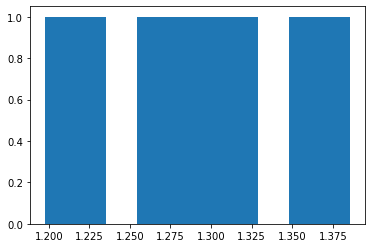

In [47]:
plt.hist(df["val_loss"])

## 3.3 Jednowymairowe zależności


### 3.3.1 Pierwsza warstwa neurony

Text(0.5, 1.0, 'Log-Loss  as function of first_neuron')

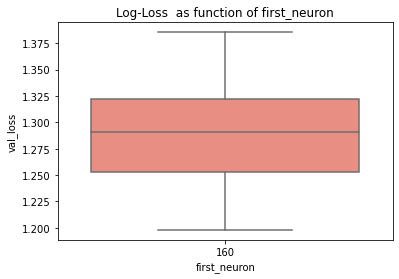

In [48]:
metric = 'first_neuron'
ax = sns.boxplot(x=metric, y="val_loss", data=df.reset_index(),color='salmon')
ax.set_title(f'Log-Loss  as function of {metric}')

### 3.3.2 Liczba ukrytych neuronów

Text(0.5, 1.0, 'Log-Loss as function of hidden_neuron')

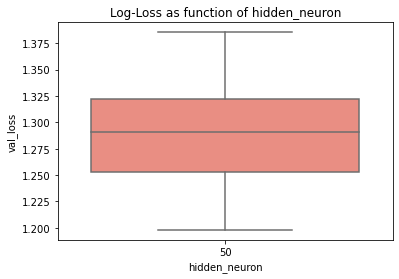

In [49]:
metric = 'hidden_neuron'
ax = sns.boxplot(x=metric, y="val_loss", data=df.reset_index(),color='salmon')
ax.set_title(f'Log-Loss as function of {metric}')

### 3.3.3 Liczba ukrytych warstw

Text(0.5, 1.0, 'Validation Loss as function of hidden_layers')

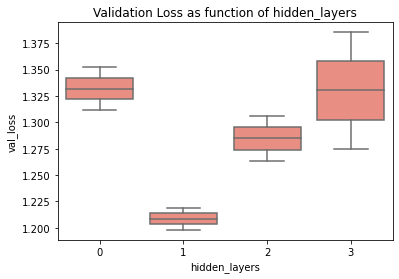

In [50]:
metric = 'hidden_layers'
ax = sns.boxplot(x=metric, y="val_loss", data=df.reset_index(),color='salmon')
ax.set_title(f'Validation Loss as function of {metric}')


Text(0.5, 1.0, 'CI Validation Loss as function of hidden layers')

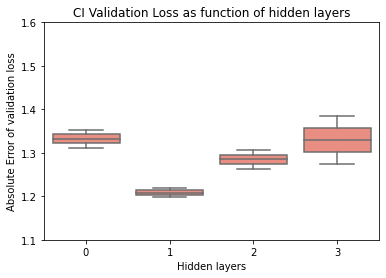

In [7]:
metric = 'hidden_layers'
ax = sns.boxplot(x=metric, y="val_loss", data=df.reset_index(),color='salmon')
ax.set_ylim([1.1, 1.6]) 
ax.set_ylabel('Absolute Error of validation loss')
ax.set_xlabel('Hidden layers')
ax.set_title('CI Validation Loss as function of hidden layers') #ta


### 3.3.4 Batch Size

Text(0.5, 1.0, 'Validation Loss as function of batch_size')

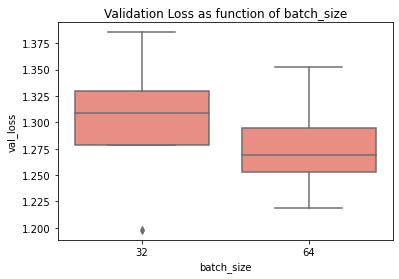

In [51]:
metric = 'batch_size'
ax = sns.boxplot(x=metric, y="val_loss", data=df.reset_index(),color='salmon')
ax.set_title(f'Validation Loss as function of {metric}')


Text(0.5, 1.0, 'CI Validation Loss as function of batch size')

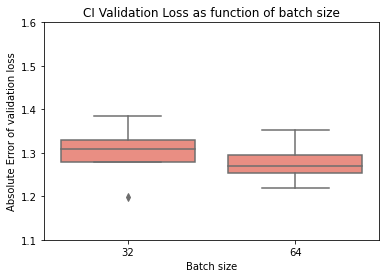

In [6]:
metric = 'batch_size'
ax = sns.boxplot(x=metric, y="val_loss", data=df.reset_index(),color='salmon')
ax.set_ylim([1.1, 1.6]) 
ax.set_ylabel('Absolute Error of validation loss')
ax.set_xlabel('Batch size')
ax.set_title('CI Validation Loss as function of batch size') #ta
